In [1]:
library('car')
library('stargazer')

Loading required package: carData

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [2]:
# Loads crime_v2.csv
crime <- read.csv("crime_v2.csv", header=TRUE)

In [3]:
# Lists basic data on number of variables and observations, data types, and provides samples
str(crime)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

This dataset consists of 97 rows (entries) described by 25 variables (columns)

'county' looks to be specified by odd numbers

'prbconv' looks like it's messed up (factor type, not number like 'prbarr' and 'prbpris')
    - These data are spread across 92 levels. 92-96 are "", while 97 is "`"`

'west' and 'central' look to be binary variables. Do 0s indicate 'east' and something else?

In [4]:
(crime$prbconv)

[1] 0.527595997 1.481480002 0.267856985 0.525424004 0.476563007 0.068376102
 [7] 0.520606995 0.769231021 0.436441004 1.225610018 0.334701002 0.403780013
[13] 0.406780005 0.352941006 0.515464008 0.325300992 0.385495991 0.972972989
[19] 0.452829987 0.450567007 0.763333023 0.371879011 0.259833008 0.140350997
[25] 0.207830995 0.736908972 0.62251699  0.493438005 0.459215999 0.154451996
[31] 0.248275995 0.739394009 0.229589999 0.528302014 0.308411002 0.203724995
[37] 0.457210004 0.549019992 0.548494995 0.386925995 0.589905024 0.573943973
[43] 0.595077991 1.234380007 0.571429014 0.384236008 0.364353001 0.781608999
[49] 0.522387981 0.220339    1.5         0.793232977 0.347799987 0.226361006
[55] 0.438960999 1.358139992 0.393413007 0.495575011 0.271946996 0.477732986
[61] 1.068969965 0.28947401  0.412698001 0.314606994 0.340490997 0.426777989
[67] 1.015380025 0.36015299  0.520709991 0.559822977 0.443681002 0.492940009
[73] 0.50819701  0.401198    0.468531013 0.322580993 0.722972989 0.909090996
[79] 0.327868998 0.410596013 0.328664005 0.343023002 0.381908    2.121210098
[85] 0.443114012 0.300577998 0.449999988 0.588859022 0.588859022 1.670519948
[91] 1.182929993                                                            
[97] `          
92 Levels:  ` 0.068376102 0.140350997 0.154451996 0.203724995 ... 2.121210098

In [5]:
# Loads summary of crime object
summary(crime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

There are 6 'NA' entries in all variables, except 'prbconv'; do these values all fall within the same rows? 

Yes, there are 6 rows (labelled 'NA' and 'NA.1'-'NA.5') with NA values across the board

In [6]:
crime[crime$year == "NA",]

county year crmrte prbarr prbconv prbpris avgsen polpc density taxpc ⋯
NA   NA     NA   NA     NA     NA      NA      NA     NA    NA      NA    ⋯
NA.1 NA     NA   NA     NA     NA      NA      NA     NA    NA      NA    ⋯
NA.2 NA     NA   NA     NA     NA      NA      NA     NA    NA      NA    ⋯
NA.3 NA     NA   NA     NA     NA      NA      NA     NA    NA      NA    ⋯
NA.4 NA     NA   NA     NA     NA      NA      NA     NA    NA      NA    ⋯
NA.5 NA     NA   NA     NA     NA      NA      NA     NA    NA      NA    ⋯
     wtuc wtrd wfir wser wmfg wfed wsta wloc mix pctymle
NA   NA   NA   NA   NA   NA   NA   NA   NA   NA  NA     
NA.1 NA   NA   NA   NA   NA   NA   NA   NA   NA  NA     
NA.2 NA   NA   NA   NA   NA   NA   NA   NA   NA  NA     
NA.3 NA   NA   NA   NA   NA   NA   NA   NA   NA  NA     
NA.4 NA   NA   NA   NA   NA   NA   NA   NA   NA  NA     
NA.5 NA   NA   NA   NA   NA   NA   NA   NA   NA  NA

This doesn't return anything; do I need to explicitly look for "" or "\`" 'prbconv' from above?

In [7]:
crime[crime$prvconv == "NA",]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county year crmrte prbarr prbconv prbpris avgsen polpc density taxpc ⋯
     wtuc wtrd wfir wser wmfg wfed wsta wloc mix pctymle

These appear to represent the same missing entries. However, the indicies are marked differently (92-97, instead of 'NA' and 'NA.1'-'NA.5' above).

In [8]:
crime[crime$prbconv == '' | crime$prbconv=='`',]

county year crmrte prbarr prbconv prbpris avgsen polpc density taxpc ⋯ wtuc
92 NA     NA   NA     NA             NA      NA     NA    NA      NA    ⋯ NA  
93 NA     NA   NA     NA             NA      NA     NA    NA      NA    ⋯ NA  
94 NA     NA   NA     NA             NA      NA     NA    NA      NA    ⋯ NA  
95 NA     NA   NA     NA             NA      NA     NA    NA      NA    ⋯ NA  
96 NA     NA   NA     NA             NA      NA     NA    NA      NA    ⋯ NA  
97 NA     NA   NA     NA     `       NA      NA     NA    NA      NA    ⋯ NA  
   wtrd wfir wser wmfg wfed wsta wloc mix pctymle
92 NA   NA   NA   NA   NA   NA   NA   NA  NA     
93 NA   NA   NA   NA   NA   NA   NA   NA  NA     
94 NA   NA   NA   NA   NA   NA   NA   NA  NA     
95 NA   NA   NA   NA   NA   NA   NA   NA  NA     
96 NA   NA   NA   NA   NA   NA   NA   NA  NA     
97 NA   NA   NA   NA   NA   NA   NA   NA  NA

- 'county' appears to be out of register somewhere, since the max = 197 and not 2(97) - 1 = 193, as I'd expect for 97 rows that are enumerated with odd numbers. [for n rows (1,2,...,k), county = 2n - 1] 

- Check on the number of counties in NC -> Katie says there are 100

- Only have a selection -> good that it doesn't exceed 100

- 'prbarr' is a probability and should not exceed 1, but the max is 1.09091

- Is this truly a probability? Could arrests exceed offenses?

- We need to convert 'prbconv' (after removing missing values) into numbers and not factors

- Ensure the range of probabilities make sense (see above)

- 'avgsen' seems really low, given that it's in days. Does this include people are are convicted, but don't receive a prison sentence (which would drive the average down). Is this effect enough to account for sentences imposed for severe crimes (e.g., murder, rape, assault, robbery)?

- Random thought: This dataset doesn't distinguish between severe crimes and comparatively minor ones
   - Does this represent an omitted variable?

- Is is realistic within a state the size of NC to have a county with a density of only
- 0.00002 (i.e., 1 person per 50,000 square miles)?
   - Does this represent wilderness area?
   - Are any other measures defined?

- Is it reasonable that the maximum density is only 8-9 people per square mile?
   - Average in all of NC is ~200 residents/square mile (208)

- As with other variables, unclear what the units of 'taxpc' are.
   - These values for 'taxpc' could be reasonable, but we don't know for certain

- How are 'west' and 'central' defined? In particular, should their be a 50:50 split for 'west'?

- 'urban' is heavily positively skewed, suggesting that most of NC is rural (unsurprising)

- 'pctmin80' looks reasonable

- Wage information looks to be within reasonable ranges

- What does 'mix' indicate? 

Next steps
- Eliminate "NA" values

- I still need to look at histograms of these variables to check the distributions

- Should also generate scatterplot matrix

- Consider models of 'crmrte' against following regressors:
   - prbarr, prbconv, prbpris, (avgsen?)
   - density, pctmin80, pctymle
   - density, polpc, taxpc

In [9]:
# Eliminates rows with missing values
clean <- crime[complete.cases(crime),]

In [10]:
# Checks that blank rows aren't present
clean[clean$prbconv == '' | clean$prbconv=='`',]
clean[clean$year == "NA",]
tail(clean)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county year crmrte prbarr prbconv prbpris avgsen polpc density taxpc ⋯
     wtuc wtrd wfir wser wmfg wfed wsta wloc mix pctymle

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county year crmrte prbarr prbconv prbpris avgsen polpc density taxpc ⋯
     wtuc wtrd wfir wser wmfg wfed wsta wloc mix pctymle

county year crmrte    prbarr   prbconv     prbpris  avgsen polpc     
86 189    87   0.0313130 0.161381 0.300577998 0.288462 12.27  0.00227837
87 191    87   0.0458895 0.172257 0.449999988 0.421053  9.59  0.00122733
88 193    87   0.0235277 0.266055 0.588859022 0.423423  5.86  0.00117887
89 193    87   0.0235277 0.266055 0.588859022 0.423423  5.86  0.00117887
90 195    87   0.0313973 0.201397 1.670519948 0.470588 13.02  0.00445923
91 197    87   0.0141928 0.207595 1.182929993 0.360825 12.23  0.00118573
   density   taxpc    ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed  
86 1.1019108 31.33022 ⋯ 354.2510 180.9359 369.4332 253.2281 304.72 427.84
87 1.7725632 32.74533 ⋯ 400.8570 230.9888 320.0345 238.4958 295.26 334.55
88 0.8138298 28.51783 ⋯ 480.1948 268.3836 365.0196 295.9352 295.63 468.26
89 0.8138298 28.51783 ⋯ 480.1948 268.3836 365.0196 295.9352 295.63 468.26
90 1.7459893 53.66693 ⋯ 377.9356 246.0614 411.4330 296.8684 392.27 480.79
91 0.8898810 25.95258 ⋯ 341.8803 182.8020 348.1432 212.8205 322.92 391.72
   wsta   wloc   mix        pctymle   
86 451.79 297.19 0.05719921 0.15092644
87 375.45 327.62 0.08616445 0.08828809
88 337.88 348.74 0.11050157 0.07819394
89 337.88 348.74 0.11050157 0.07819394
90 303.11 337.28 0.15612382 0.07945071
91 385.65 306.85 0.06756757 0.07419893

In [11]:
# Checks for duplicate rows
clean[duplicated(clean),]

county year crmrte    prbarr   prbconv     prbpris  avgsen polpc     
89 193    87   0.0235277 0.266055 0.588859022 0.423423 5.86   0.00117887
   density   taxpc    ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed  
89 0.8138298 28.51783 ⋯ 480.1948 268.3836 365.0196 295.9352 295.63 468.26
   wsta   wloc   mix       pctymle   
89 337.88 348.74 0.1105016 0.07819394

In [12]:
# Verifies which row is a duplicate
clean[clean$county == 193,]

county year crmrte    prbarr   prbconv     prbpris  avgsen polpc     
88 193    87   0.0235277 0.266055 0.588859022 0.423423 5.86   0.00117887
89 193    87   0.0235277 0.266055 0.588859022 0.423423 5.86   0.00117887
   density   taxpc    ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed  
88 0.8138298 28.51783 ⋯ 480.1948 268.3836 365.0196 295.9352 295.63 468.26
89 0.8138298 28.51783 ⋯ 480.1948 268.3836 365.0196 295.9352 295.63 468.26
   wsta   wloc   mix       pctymle   
88 337.88 348.74 0.1105016 0.07819394
89 337.88 348.74 0.1105016 0.07819394

In [13]:
# Eliminates duplicate rows
clean <- clean[!duplicated(clean),]

In [14]:
# Checks for duplicate rows
# clean[duplicated(clean),]
duplicated(clean)
length(duplicated(clean))
dim(clean)

clean[duplicated(clean),]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[85] FALSE FALSE FALSE FALSE FALSE FALSE

[1] 90

[1] 90 25

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county year crmrte prbarr prbconv prbpris avgsen polpc density taxpc ⋯
     wtuc wtrd wfir wser wmfg wfed wsta wloc mix pctymle

In [15]:
# Verifies which row is a duplicate
clean[clean$county == 193,]

county year crmrte    prbarr   prbconv     prbpris  avgsen polpc     
88 193    87   0.0235277 0.266055 0.588859022 0.423423 5.86   0.00117887
   density   taxpc    ⋯ wtuc     wtrd     wfir     wser     wmfg   wfed  
88 0.8138298 28.51783 ⋯ 480.1948 268.3836 365.0196 295.9352 295.63 468.26
   wsta   wloc   mix       pctymle   
88 337.88 348.74 0.1105016 0.07819394

In [16]:
# Re-cast 'prbconv' from factors into numbers
clean$prbconv <- as.numeric(as.character(clean$prbconv))

In [17]:
summary(clean)
str(clean)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 51.5   1st Qu.:87   1st Qu.:0.020604   1st Qu.:0.20495  
 Median :103.0   Median :87   Median :0.030002   Median :0.27146  
 Mean   :100.6   Mean   :87   Mean   :0.033510   Mean   :0.29524  
 3rd Qu.:150.5   3rd Qu.:87   3rd Qu.:0.040249   3rd Qu.:0.34487  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
    prbconv           prbpris           avgsen           polpc          
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.0007459  
 1st Qu.:0.34422   1st Qu.:0.3642   1st Qu.: 7.375   1st Qu.:0.0012378  
 Median :0.45170   Median :0.4222   Median : 9.110   Median :0.0014897  
 Mean   :0.55086   Mean   :0.4106   Mean   : 9.689   Mean   :0.0017080  
 3rd Qu.:0.58513   3rd Qu.:0.4576   3rd Qu.:11.465   3rd Qu.:0.0018856  
 Max.   :2.12121   Max.   :0.6000   Max.   :20.700   Max.   :0.0090543  
    density         

'data.frame':	90 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : num  0.528 1.481 0.268 0.525 0.477 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  335 300 238 282 291 ...
 $ wfed    : num 

In [18]:
# 'prbconv' seems high (2>1), but could represent a similar issue with 
# the time lag we see for 'prbarr'
clean$prbconv

[1] 0.5275960 1.4814800 0.2678570 0.5254240 0.4765630 0.0683761 0.5206070
 [8] 0.7692310 0.4364410 1.2256100 0.3347010 0.4037800 0.4067800 0.3529410
[15] 0.5154640 0.3253010 0.3854960 0.9729730 0.4528300 0.4505670 0.7633330
[22] 0.3718790 0.2598330 0.1403510 0.2078310 0.7369090 0.6225170 0.4934380
[29] 0.4592160 0.1544520 0.2482760 0.7393940 0.2295900 0.5283020 0.3084110
[36] 0.2037250 0.4572100 0.5490200 0.5484950 0.3869260 0.5899050 0.5739440
[43] 0.5950780 1.2343800 0.5714290 0.3842360 0.3643530 0.7816090 0.5223880
[50] 0.2203390 1.5000000 0.7932330 0.3478000 0.2263610 0.4389610 1.3581400
[57] 0.3934130 0.4955750 0.2719470 0.4777330 1.0689700 0.2894740 0.4126980
[64] 0.3146070 0.3404910 0.4267780 1.0153800 0.3601530 0.5207100 0.5598230
[71] 0.4436810 0.4929400 0.5081970 0.4011980 0.4685310 0.3225810 0.7229730
[78] 0.9090910 0.3278690 0.4105960 0.3286640 0.3430230 0.3819080 2.1212101
[85] 0.4431140 0.3005780 0.4500000 0.5888590 1.6705199 1.1829300

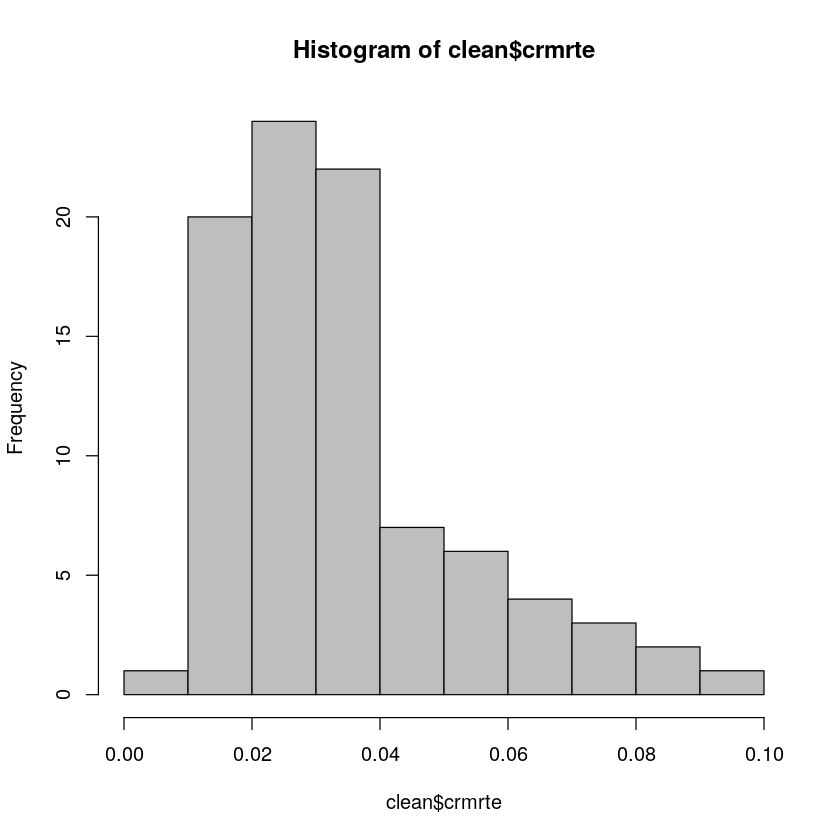

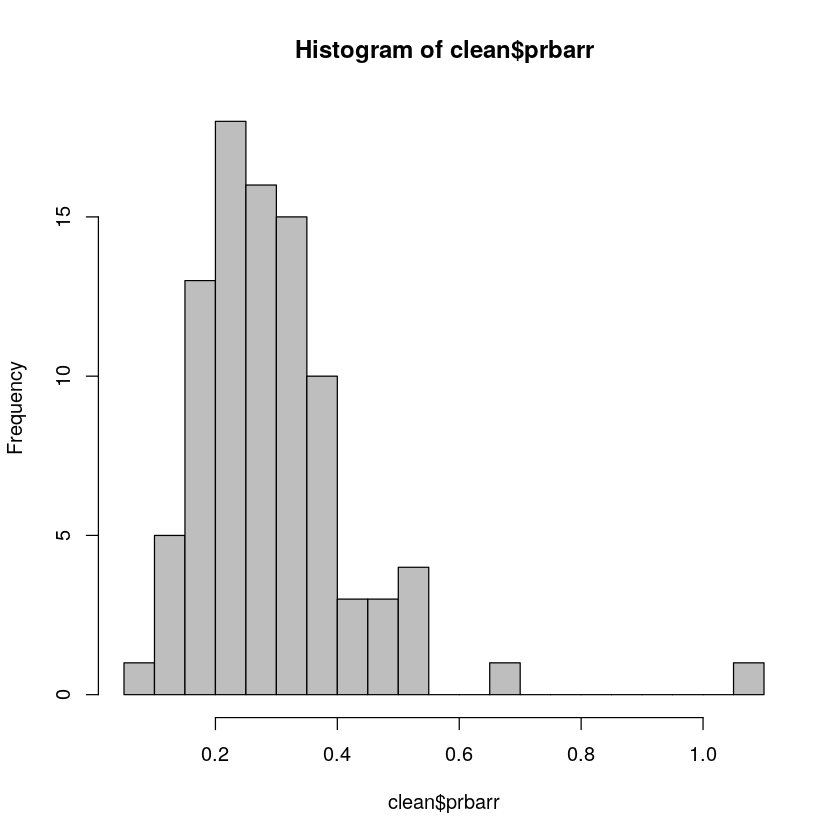

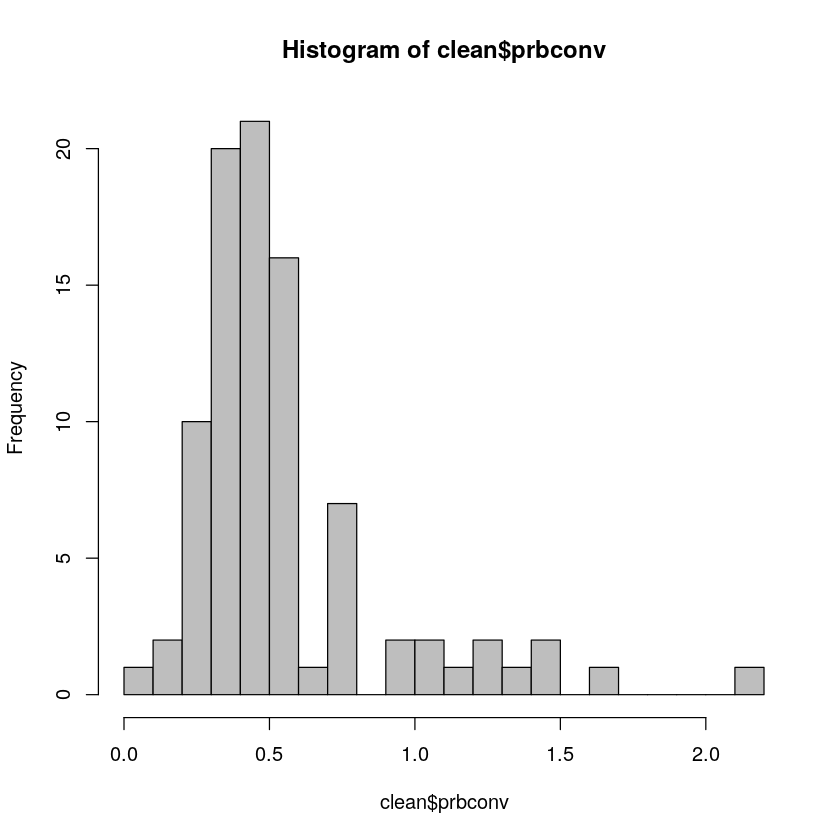

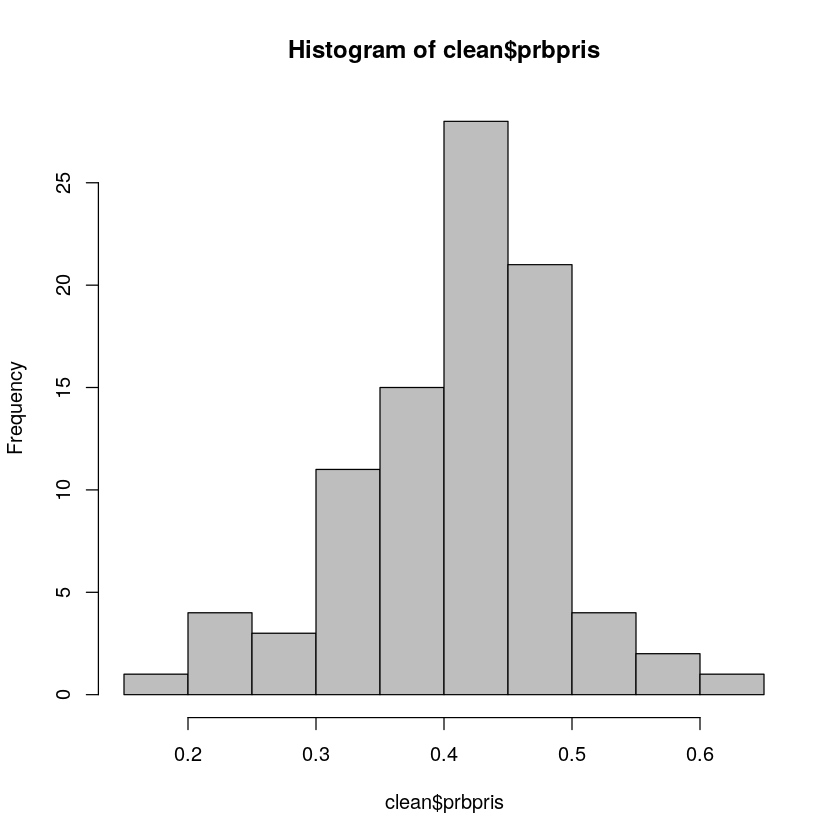

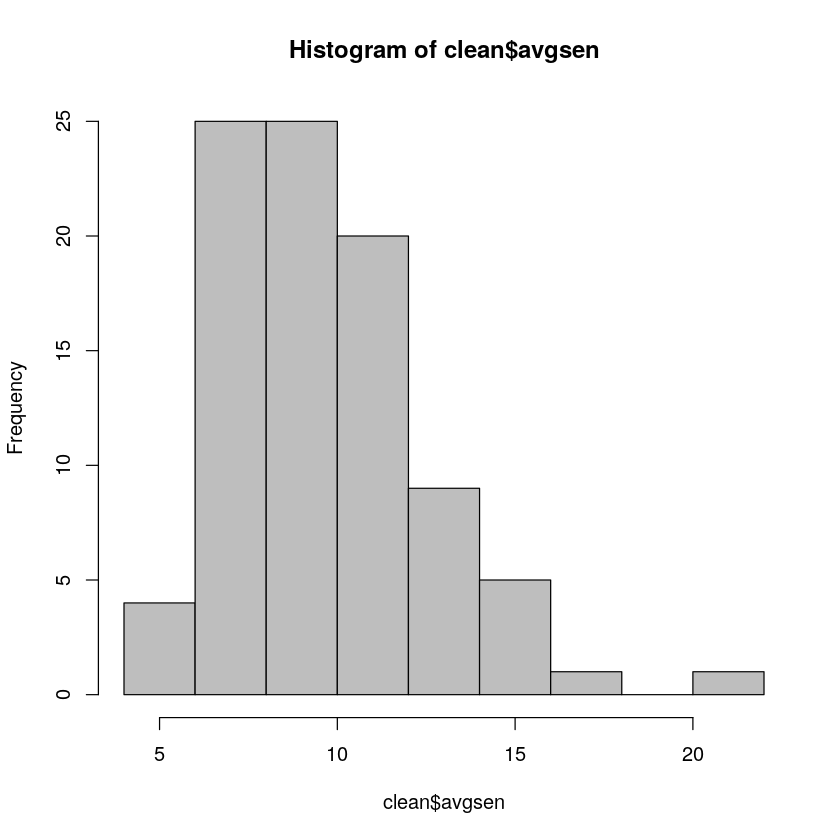

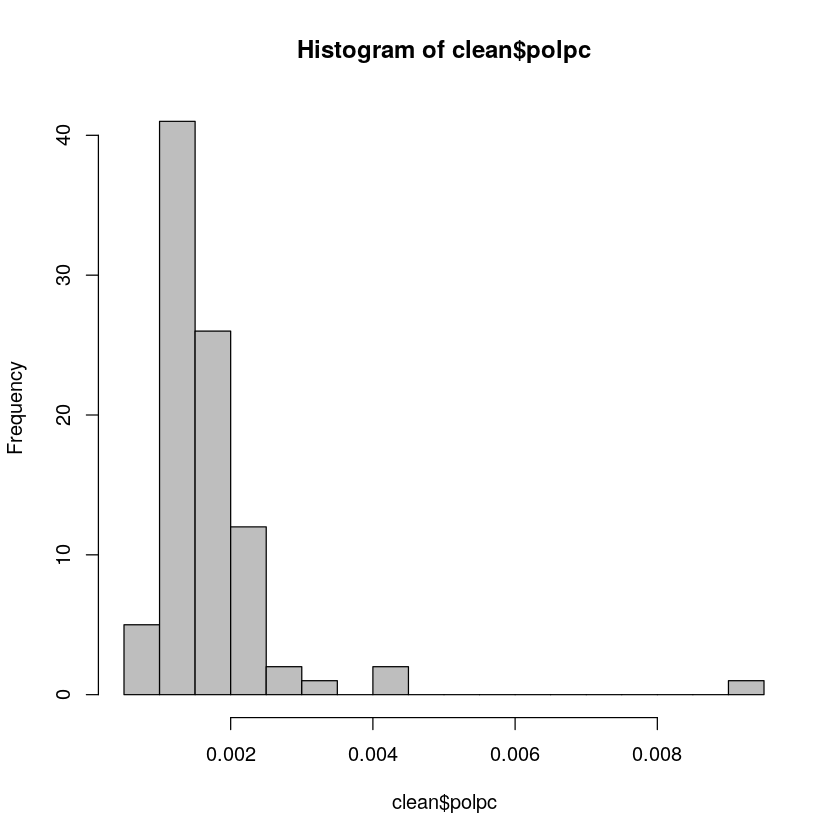

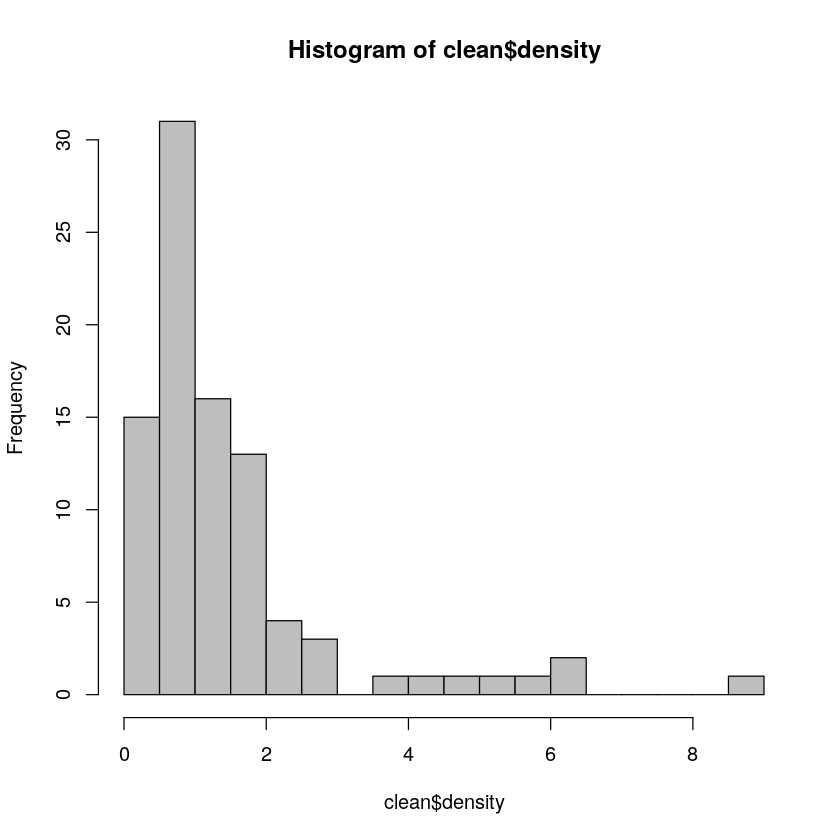

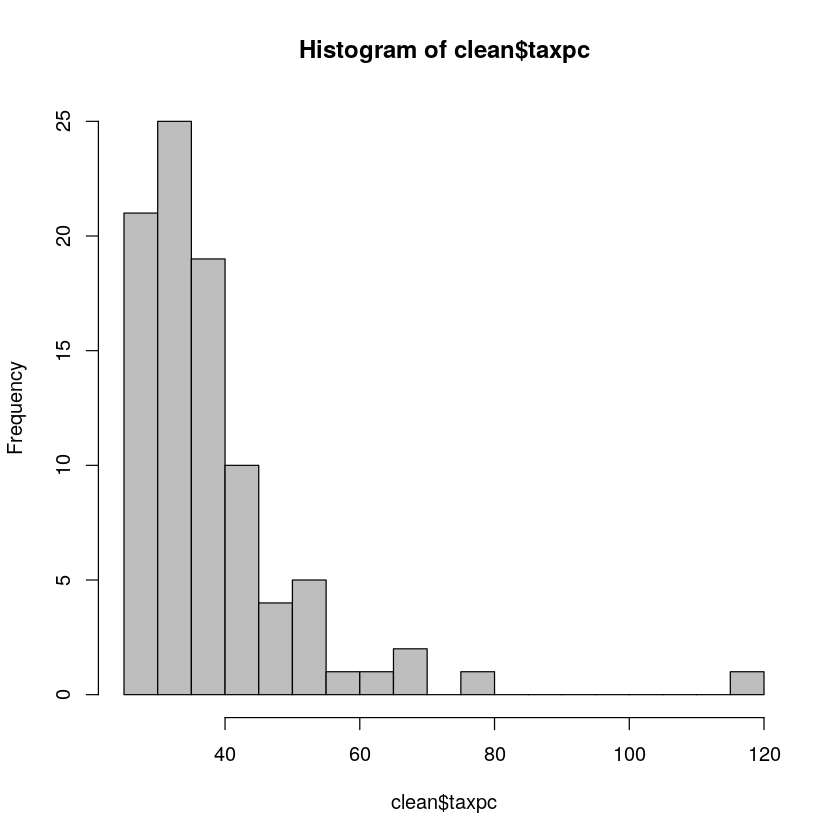

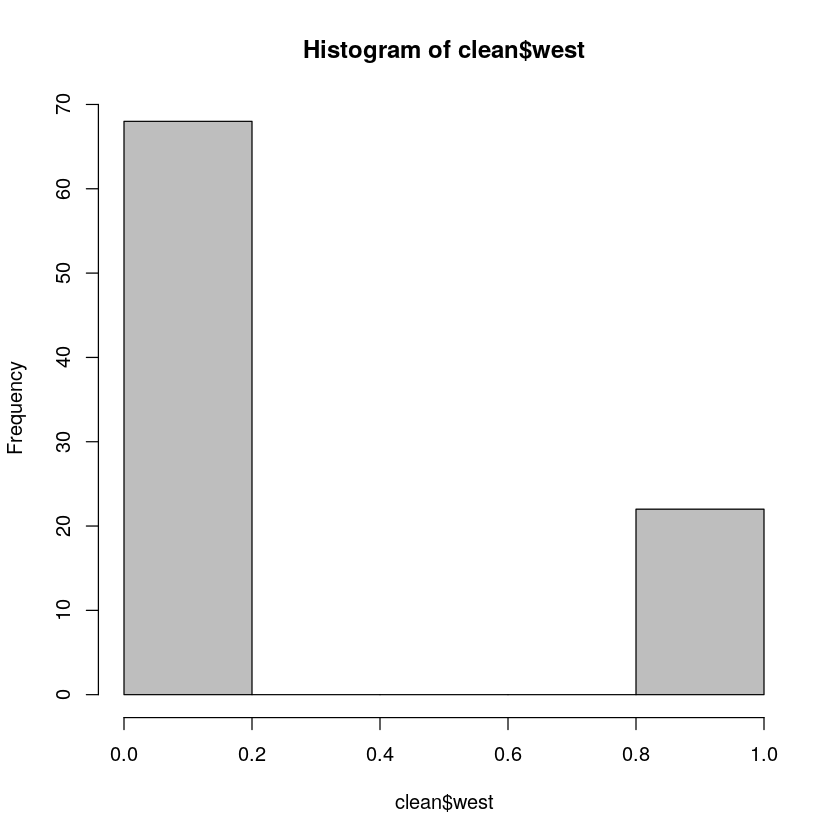

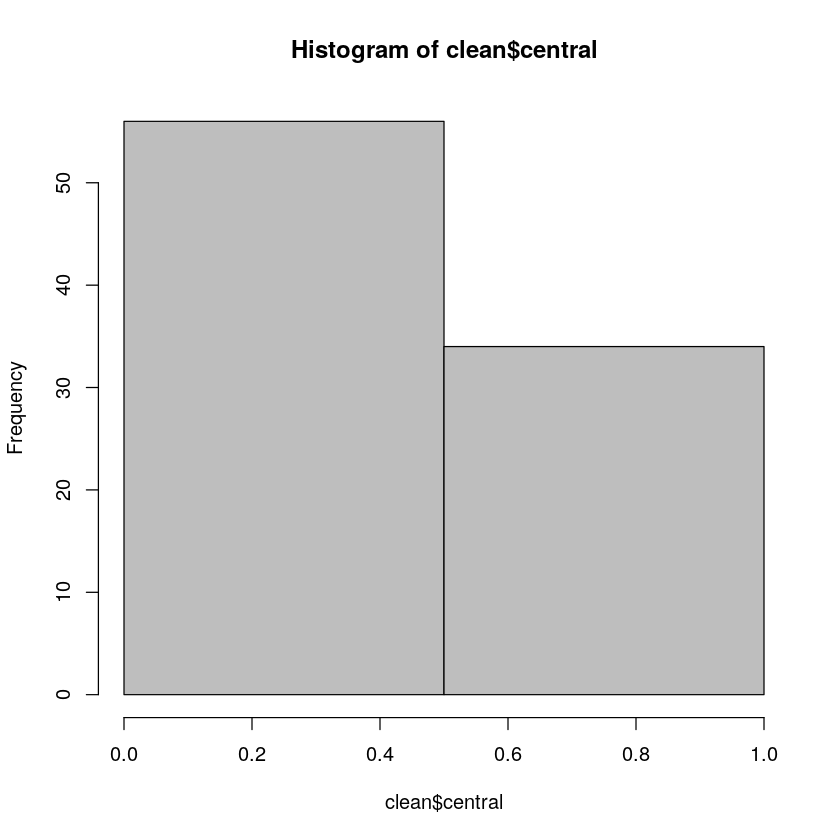

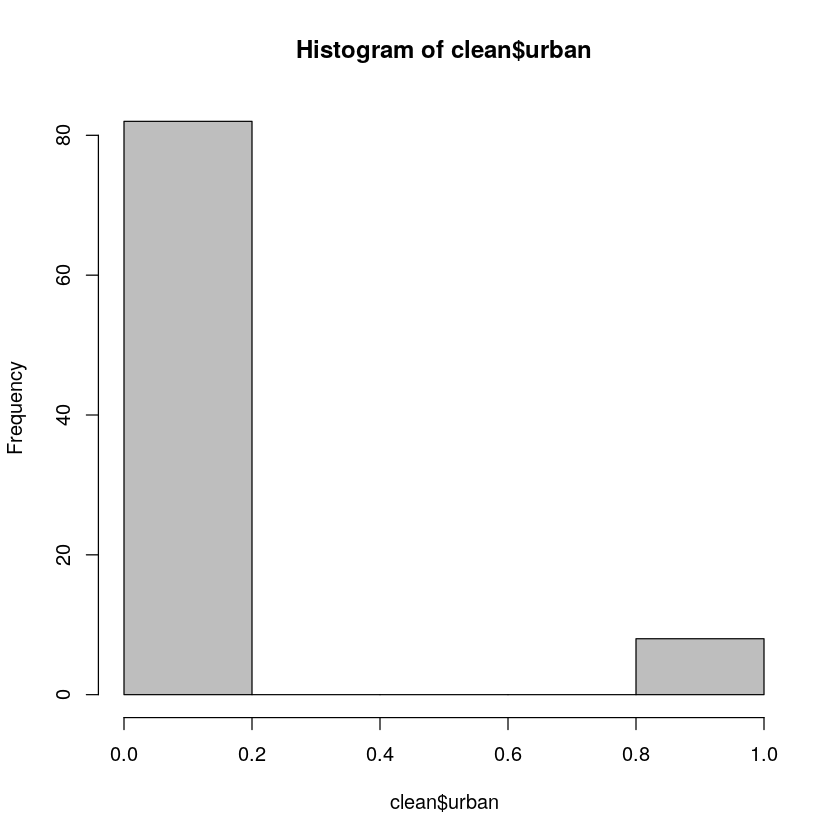

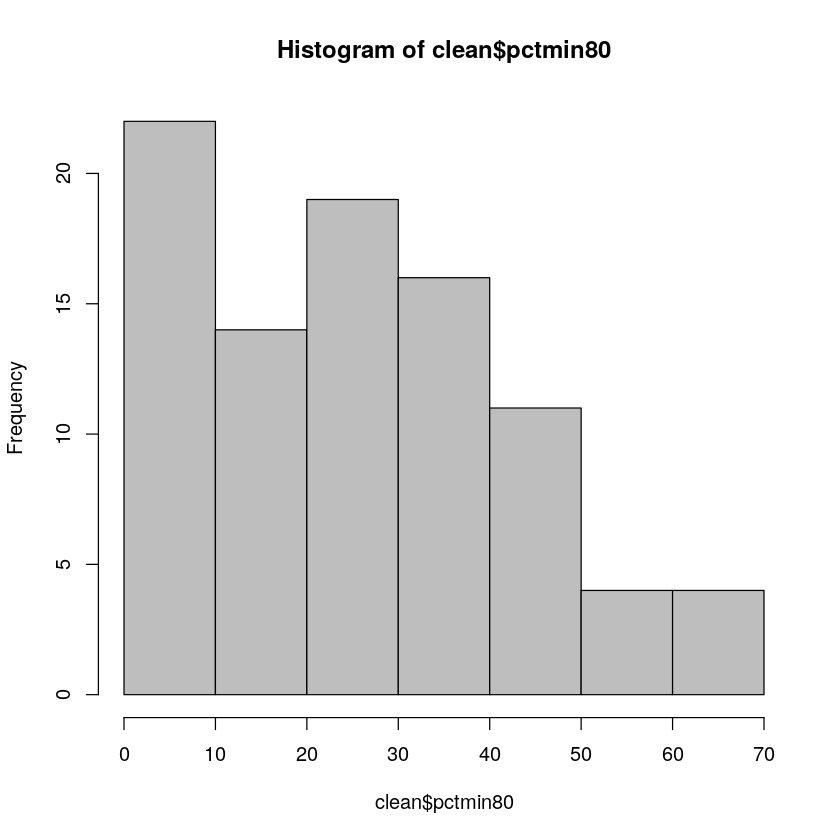

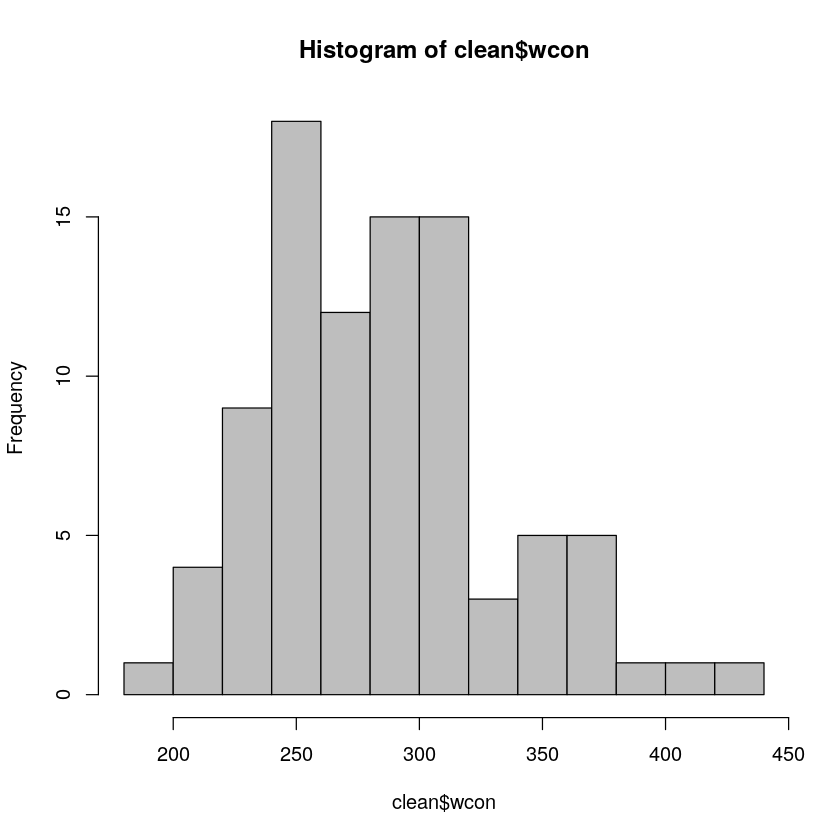

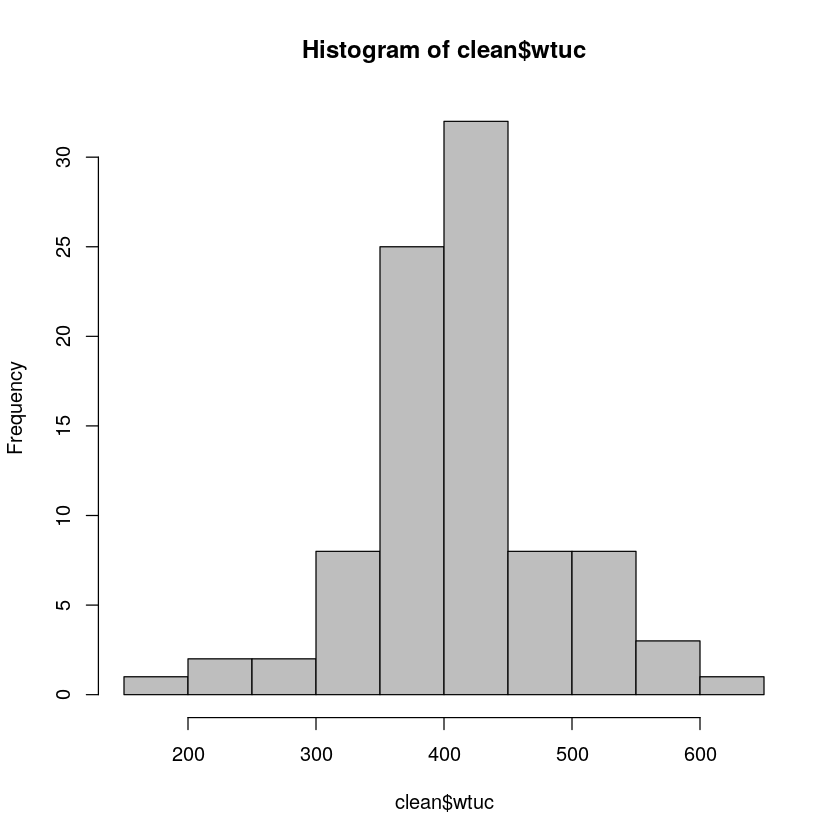

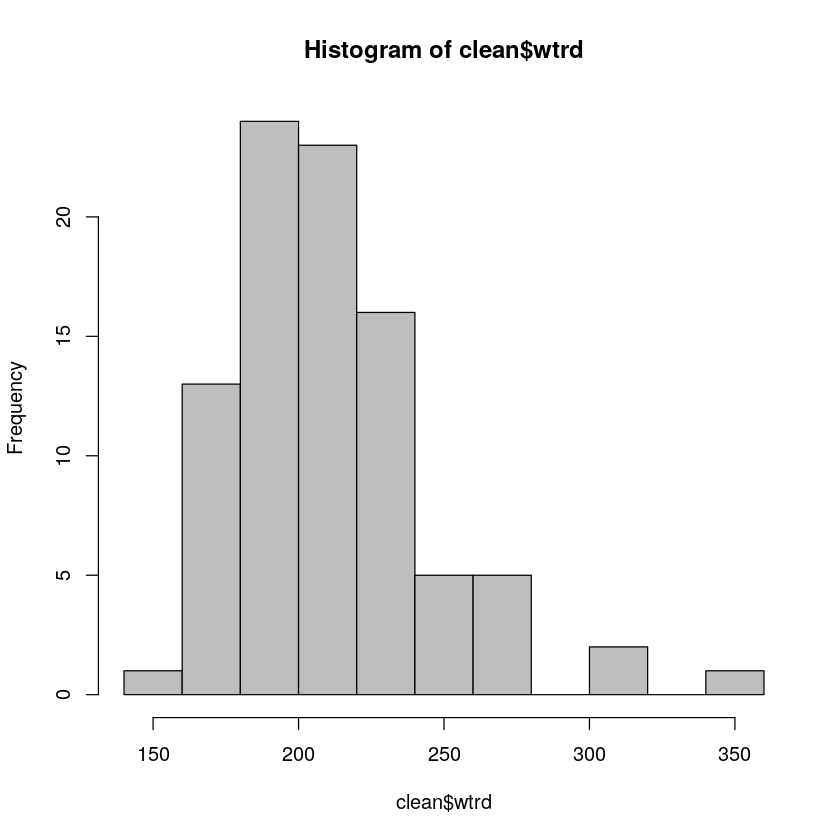

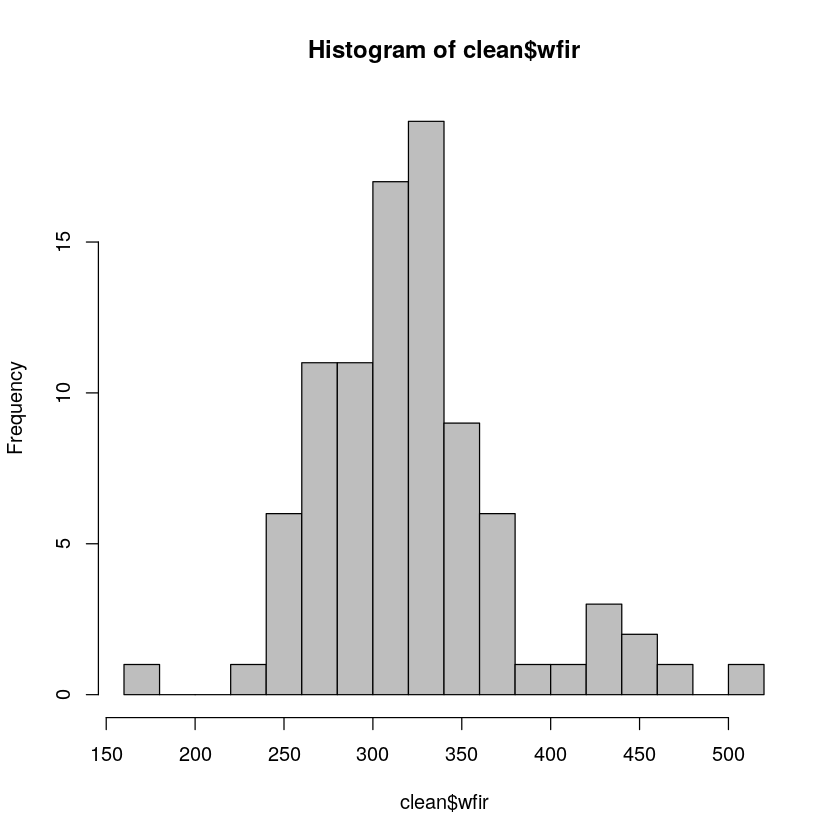

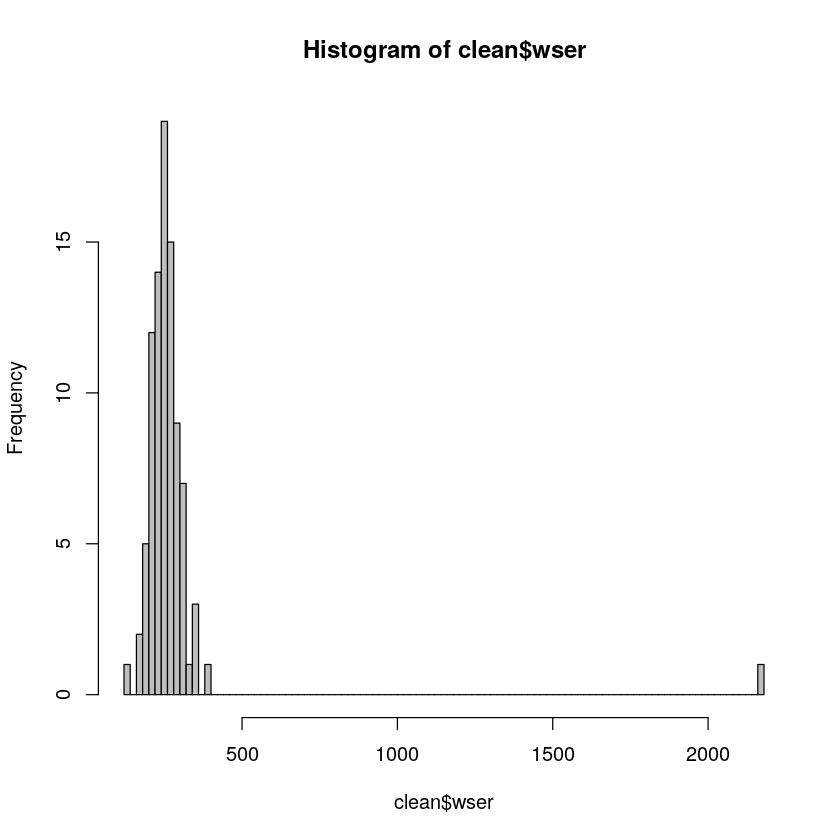

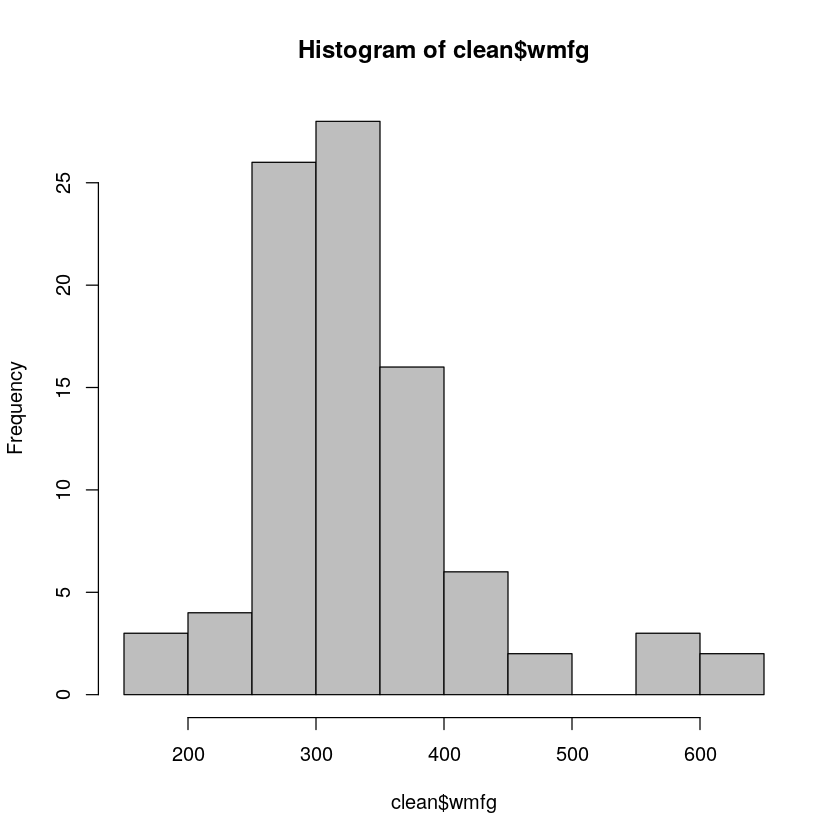

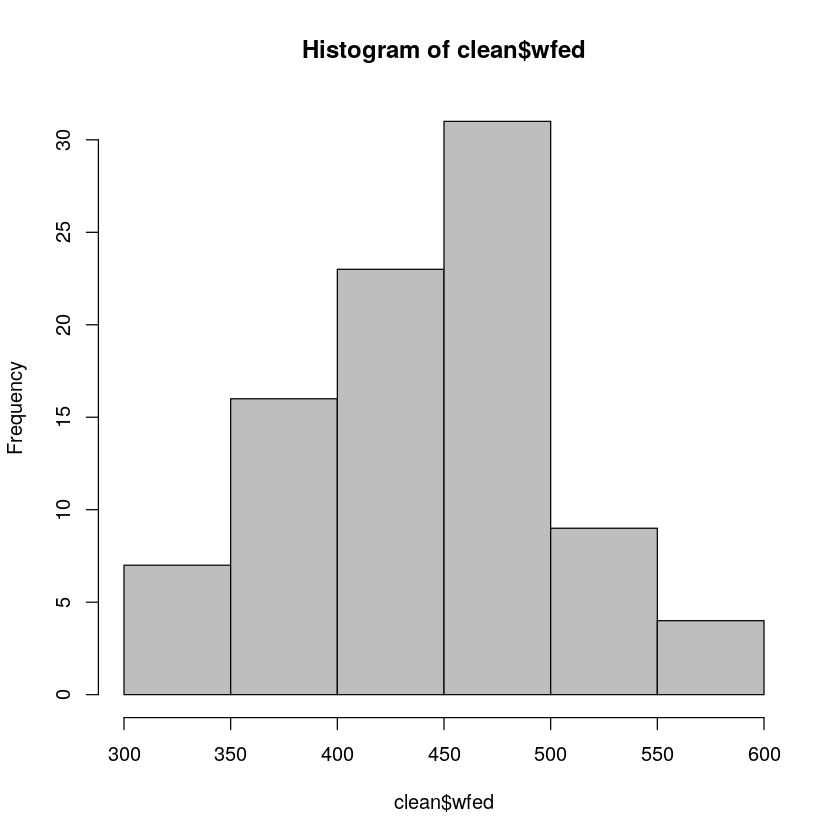

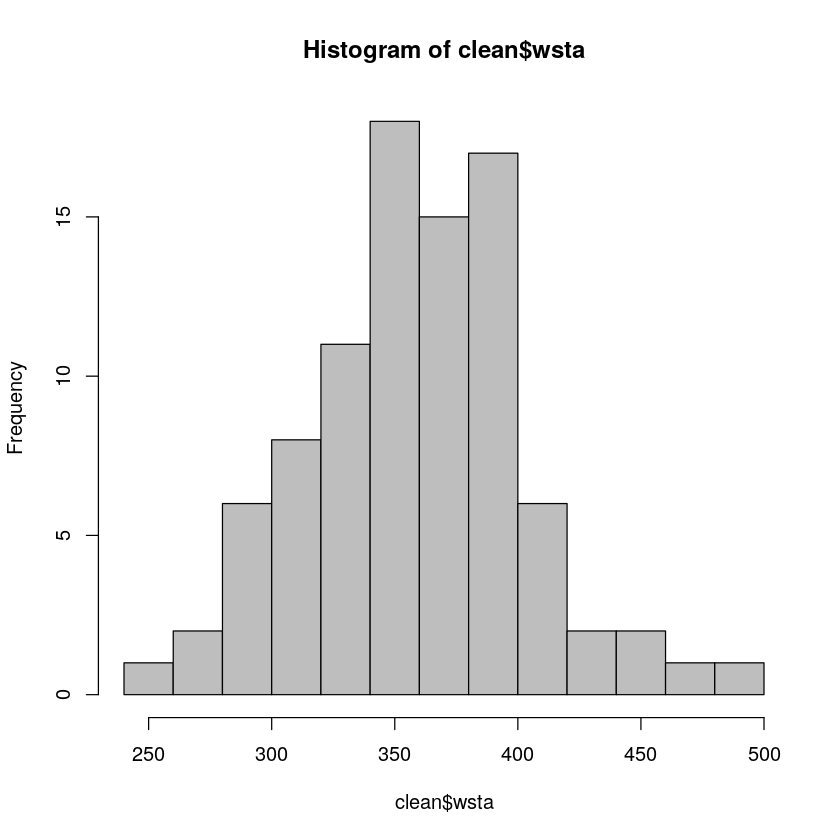

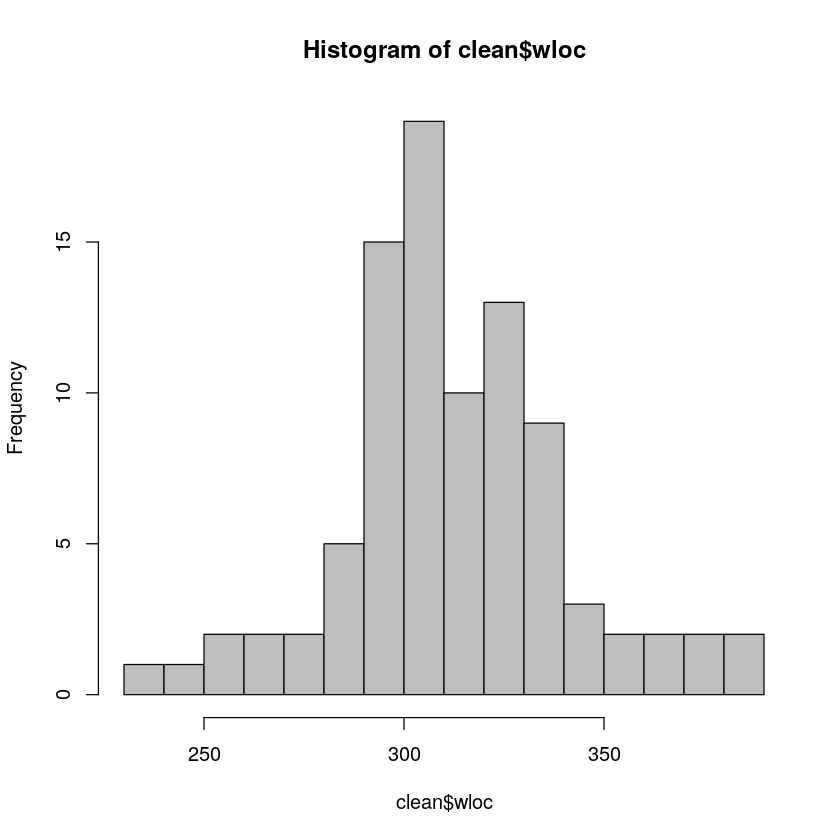

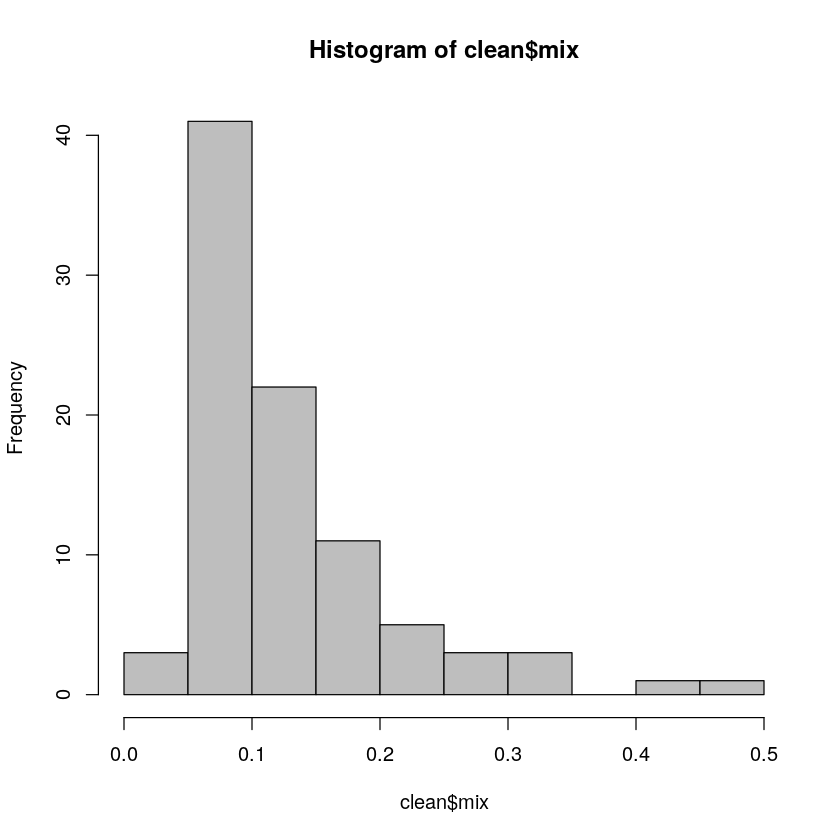

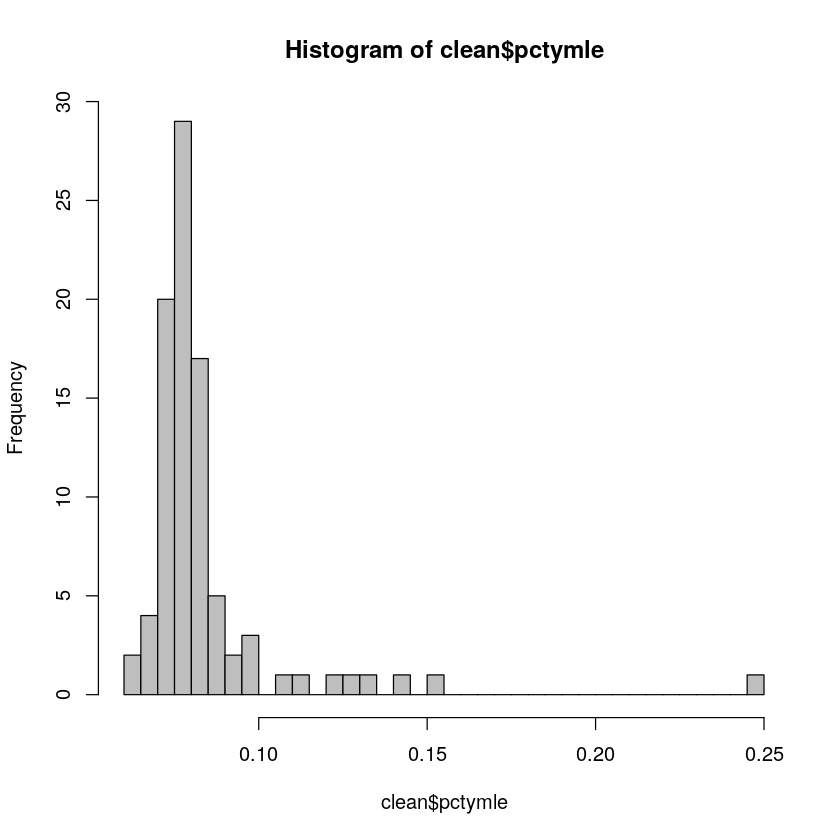

In [19]:
hist(clean$crmrte, breaks="FD", col="grey")
hist(clean$prbarr, breaks="FD", col="grey")
hist(clean$prbconv, breaks="FD", col="grey")
hist(clean$prbpris, breaks="FD", col="grey")
hist(clean$avgsen, breaks="FD", col="grey")
hist(clean$polpc, breaks="FD", col="grey")
hist(clean$density, breaks="FD", col="grey")
# The distribution is almost certainly too low by two orders of magnitude
hist(clean$taxpc, breaks="FD", col="grey")
hist(clean$west, breaks="FD", col="grey")
hist(clean$central, breaks="FD", col="grey")
hist(clean$urban, breaks="FD", col="grey")
hist(clean$pctmin80, breaks="FD", col="grey")
hist(clean$wcon, breaks="FD", col="grey")
hist(clean$wtuc, breaks="FD", col="grey")
hist(clean$wtrd, breaks="FD", col="grey")
hist(clean$wfir, breaks="FD", col="grey")
hist(clean$wser, breaks="FD", col="grey")
# Extreme outlier in service (>$2000/week)
hist(clean$wmfg, breaks="FD", col="grey")
hist(clean$wfed, breaks="FD", col="grey")
hist(clean$wsta, breaks="FD", col="grey")
hist(clean$wloc, breaks="FD", col="grey")
hist(clean$mix, breaks="FD", col="grey")
hist(clean$pctymle, breaks="FD", col="grey")

In [20]:
# There's only one value of wser that exceeds 1000. It's 10x the average.
clean[clean$wser > 1000,]

county year crmrte    prbarr   prbconv prbpris  avgsen polpc     density  
84 185    87   0.0108703 0.195266 2.12121 0.442857 5.38   0.0012221 0.3887588
   taxpc    ⋯ wtuc    wtrd     wfir     wser     wmfg   wfed   wsta   wloc  
84 40.82454 ⋯ 331.565 167.3726 264.4231 2177.068 247.72 381.33 367.25 300.13
   mix        pctymle   
84 0.04968944 0.07008217

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”

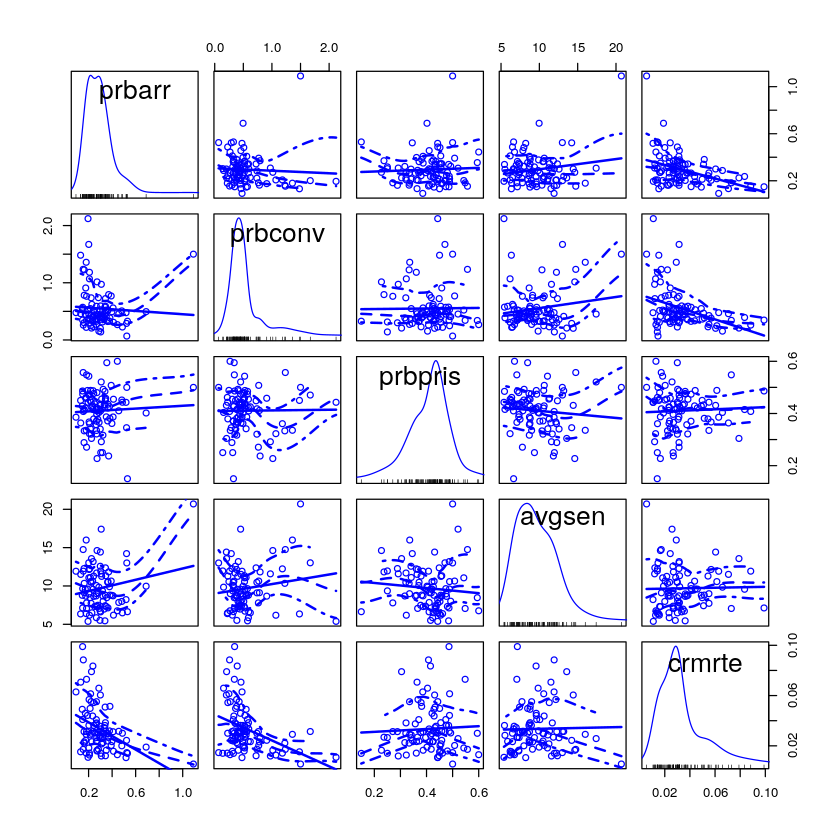

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”

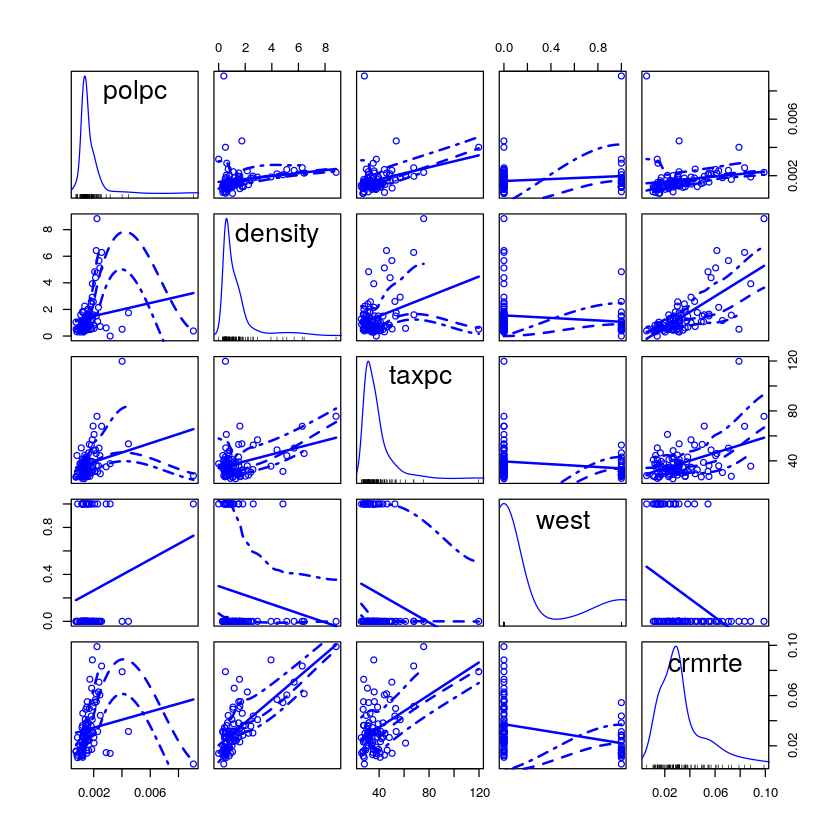

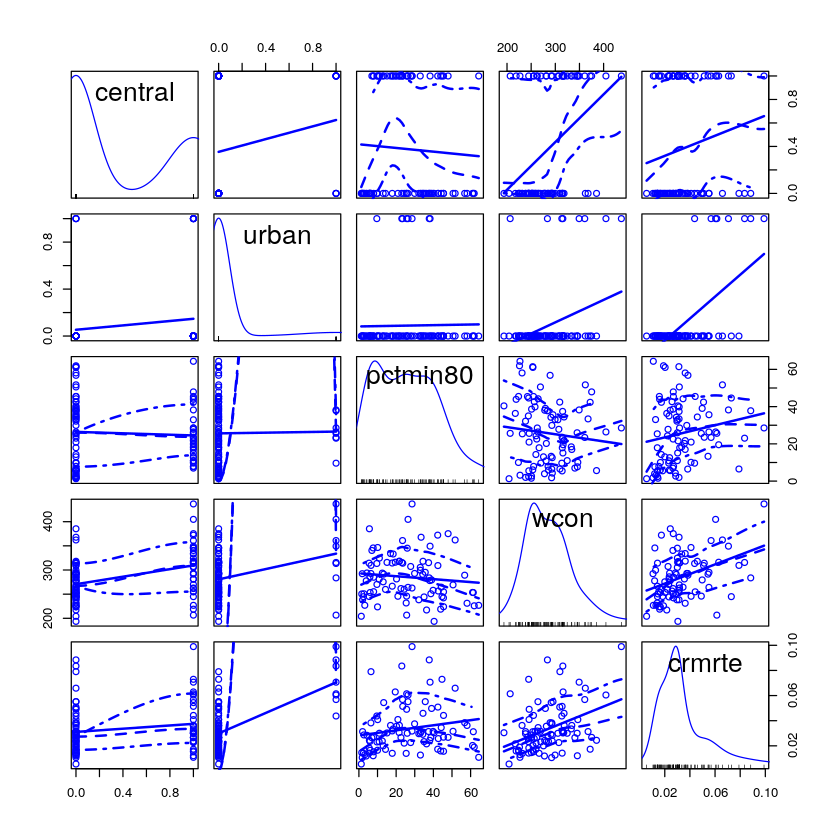

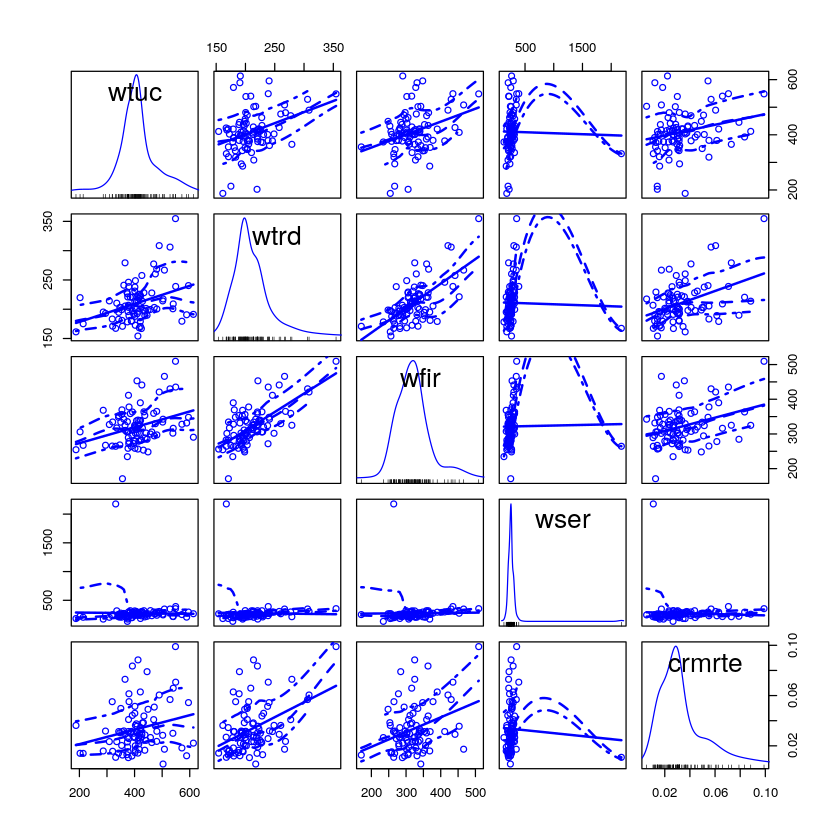

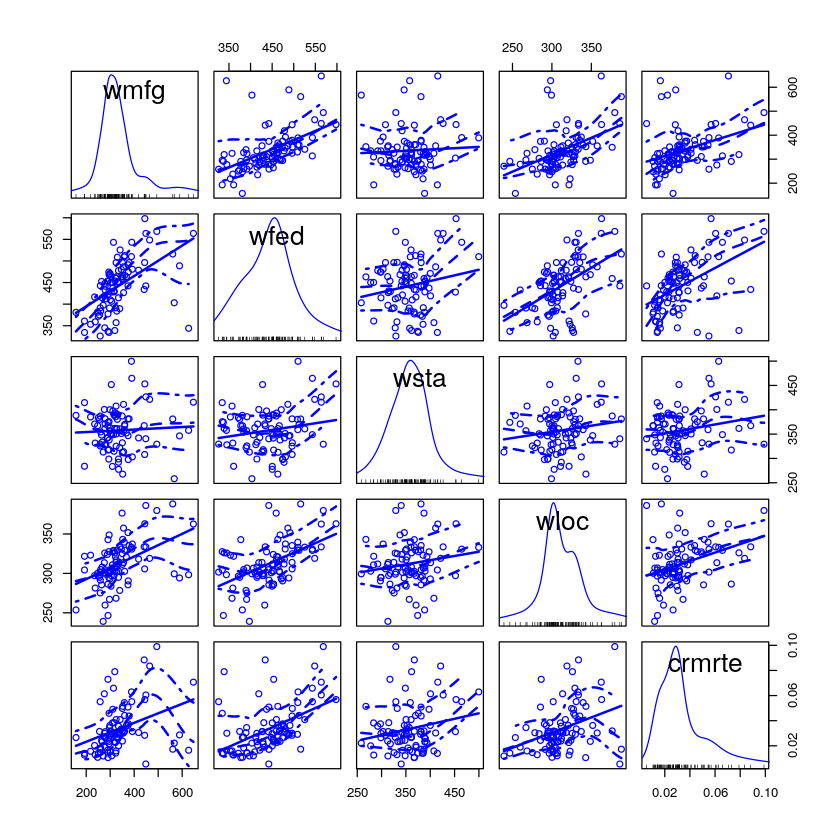

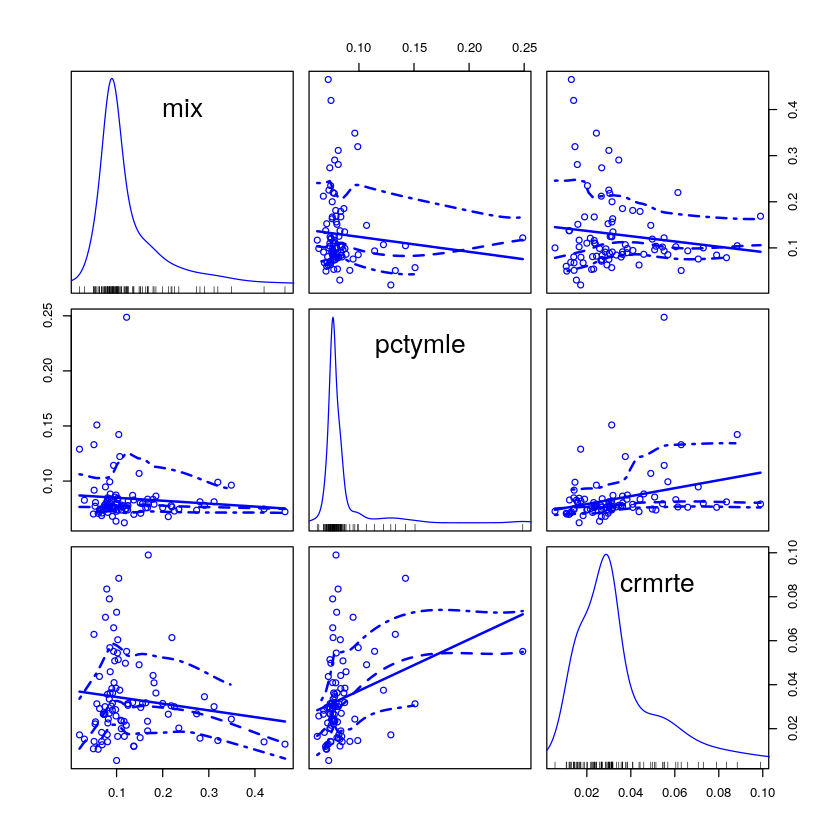

In [21]:
# Generate scatterplots against crime rate, our outcome variable of interest
scatterplotMatrix(clean[,c(4:7, 3)])
scatterplotMatrix(clean[,c(8:11, 3)])
scatterplotMatrix(clean[,c(12:15, 3)])
scatterplotMatrix(clean[,c(16:19, 3)])
scatterplotMatrix(clean[,c(20:23, 3)])
scatterplotMatrix(clean[,c(24:25, 3)])

- polpc is positively correlated (would be more so w/o one outlier)

- Hard to determine if polpc or crmrte is causal  ->

- if you have a lot of crime, you might hire a lot of police

- Density is positively correlated with crime rate 

- pctmin80 has a hump in the middle

- urban is positively correlated

- wcon is weakly positively correlated

- wtuc is weakly positively correlated

- wtrd and wfir show stronger positive correlations

- wser would be strongly positively correlated were it not for outlier

- wmfg, wfed, wsta, and wloc show positive correlations, but do they make sense?

- pctymle shows positive correlation

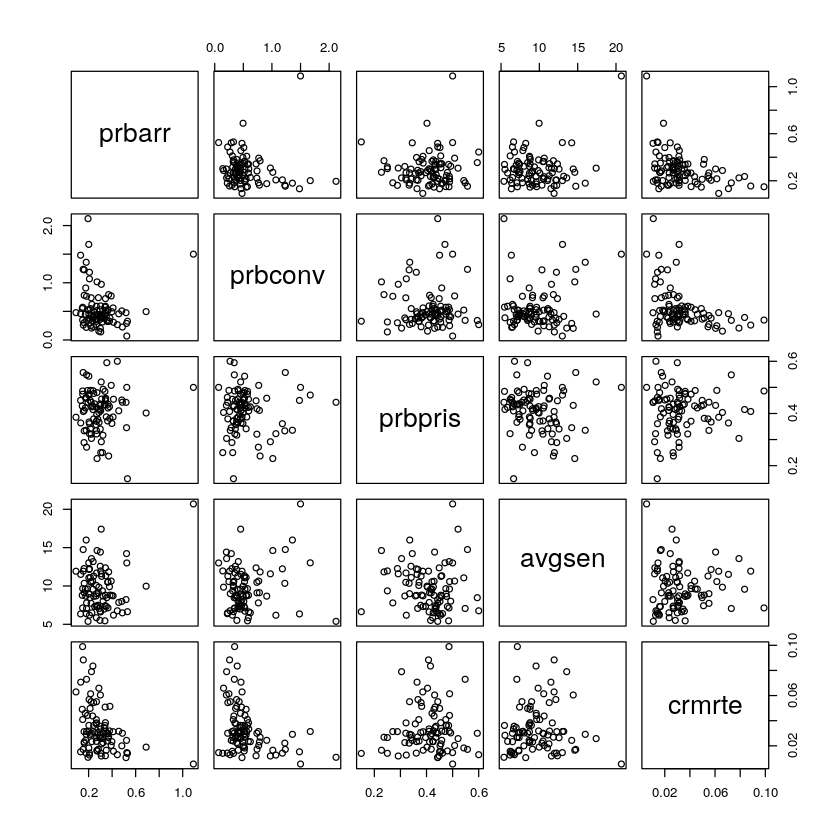

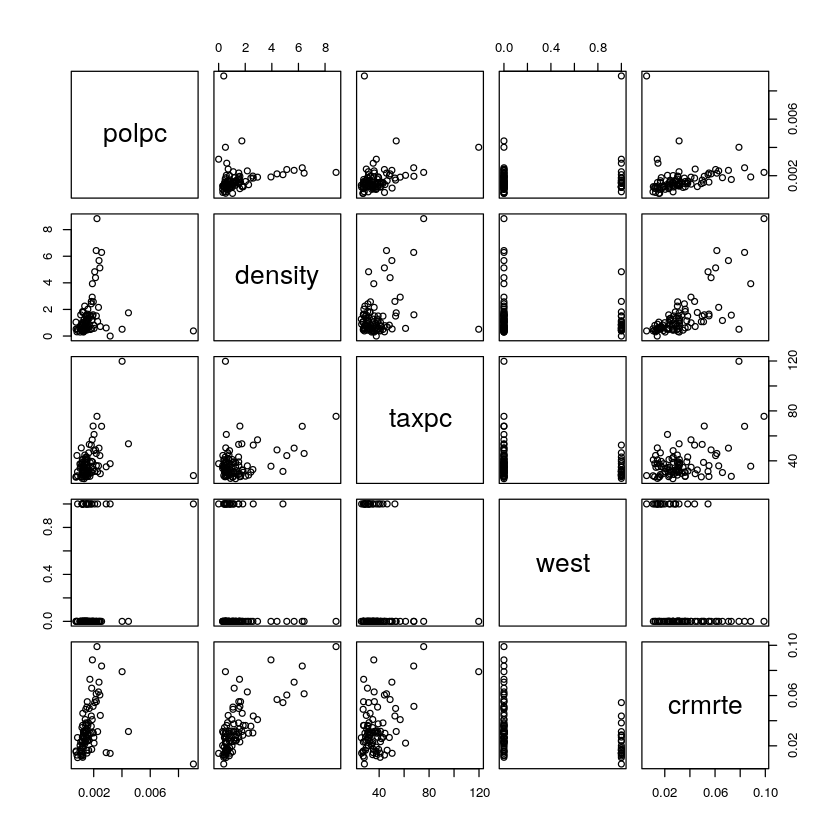

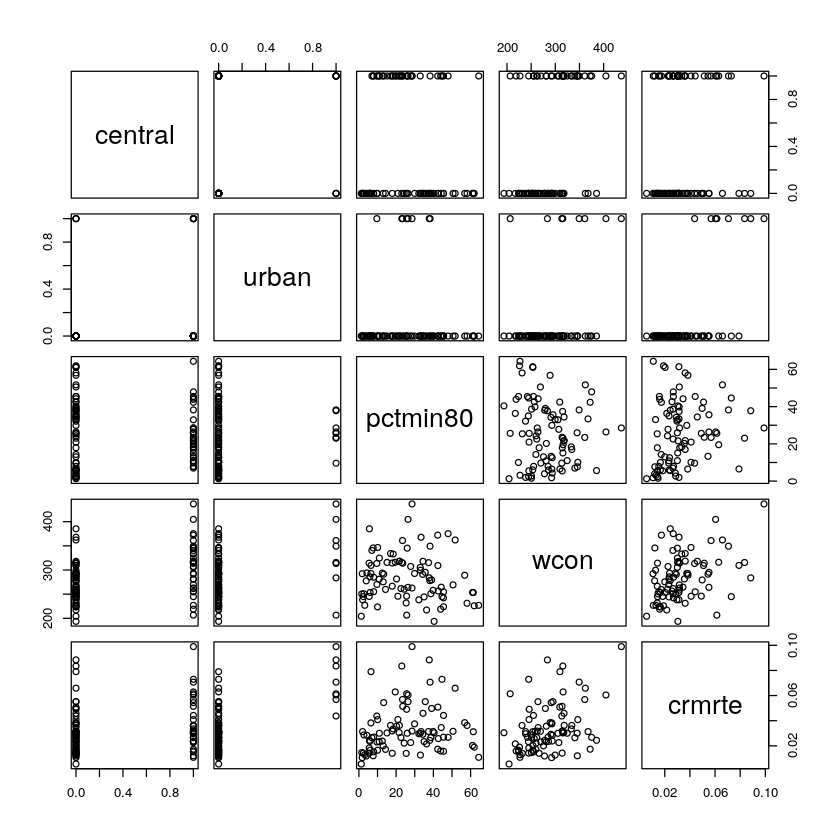

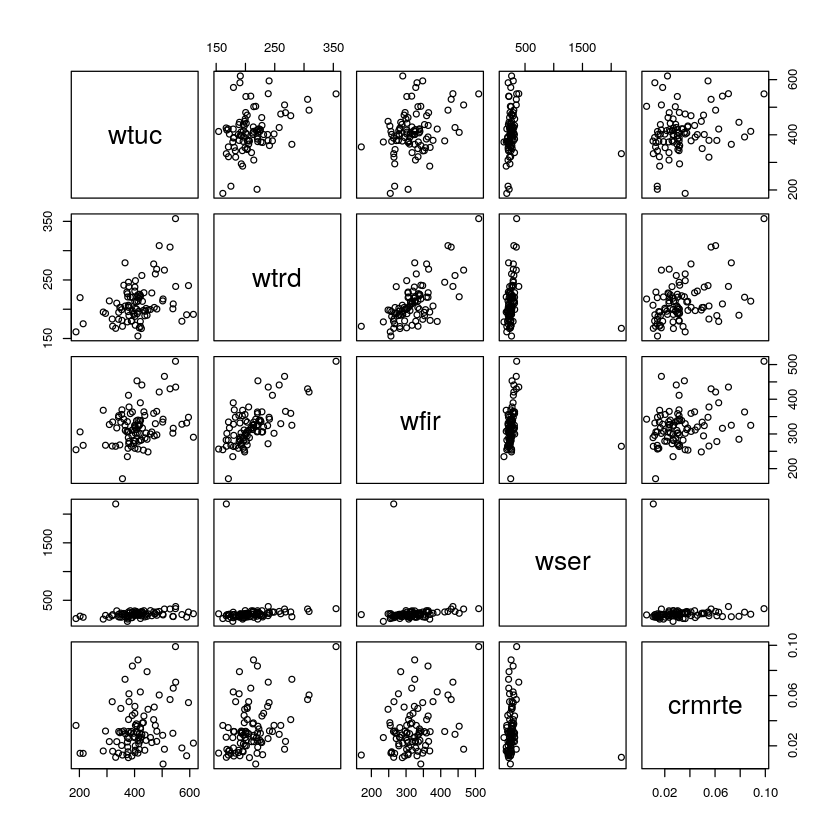

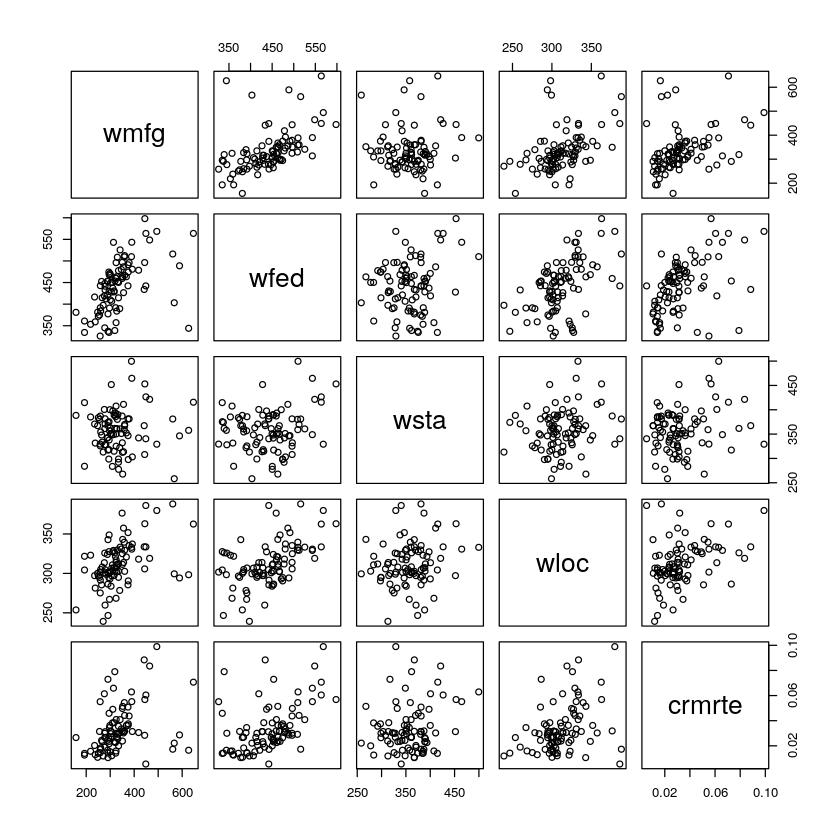

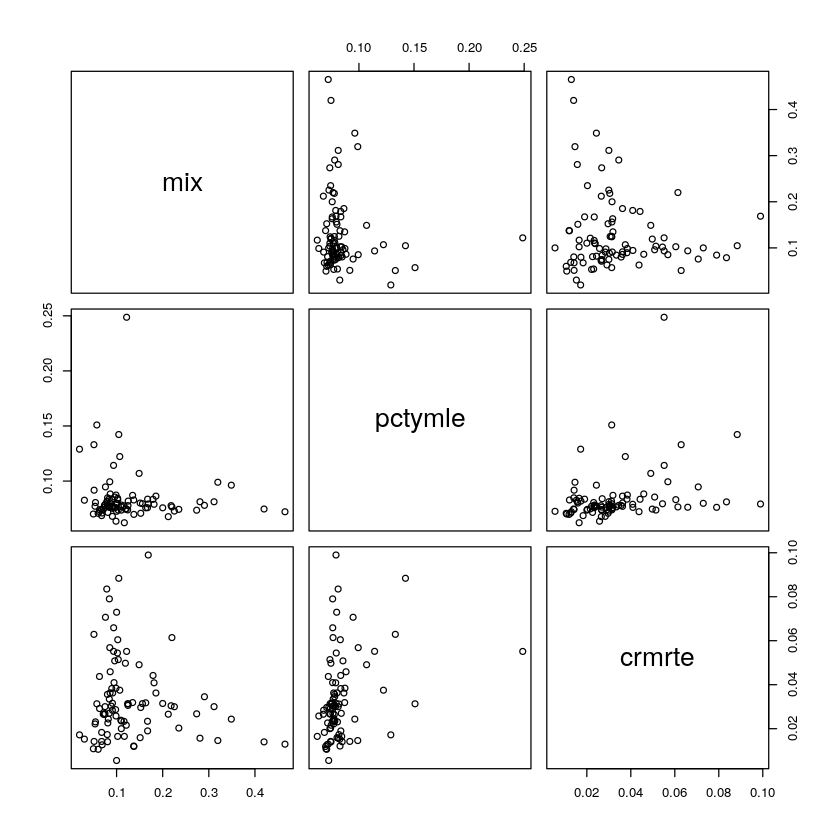

In [22]:
# Generate scatterplots against crime rate, our outcome variable of interest
plot(clean[,c(4:7, 3)])
plot(clean[,c(8:11, 3)])
plot(clean[,c(12:15, 3)])
plot(clean[,c(16:19, 3)])
plot(clean[,c(20:23, 3)])
plot(clean[,c(24:25, 3)])

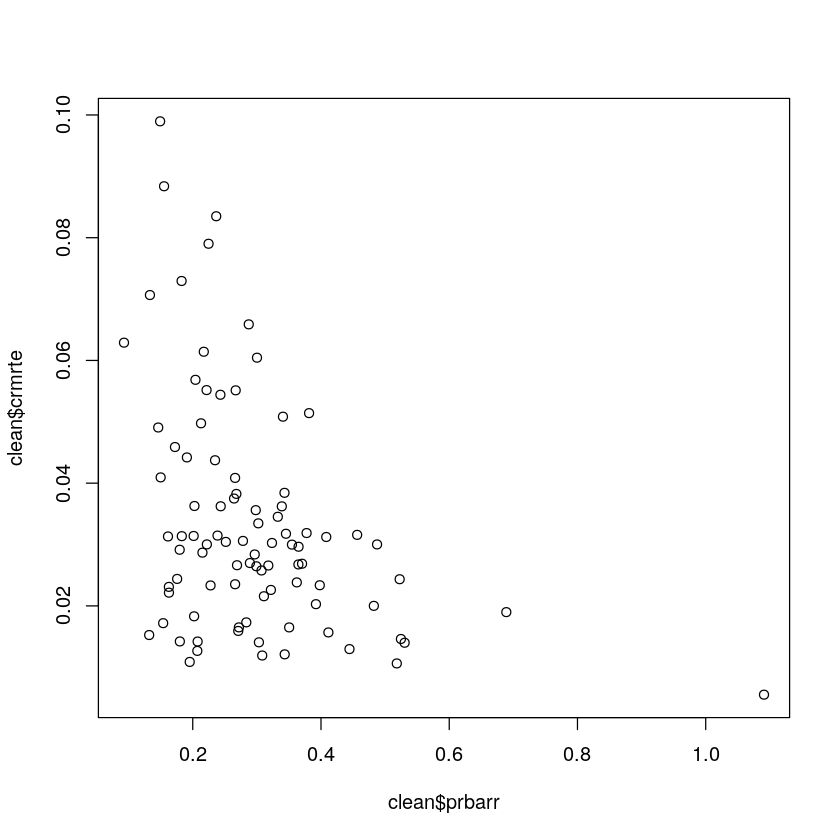

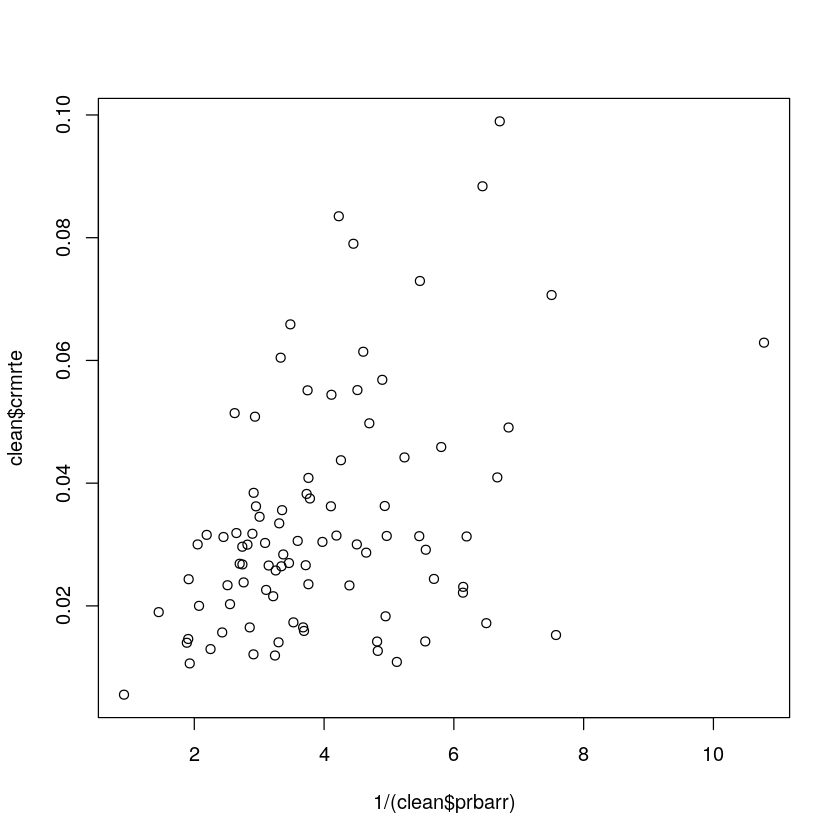

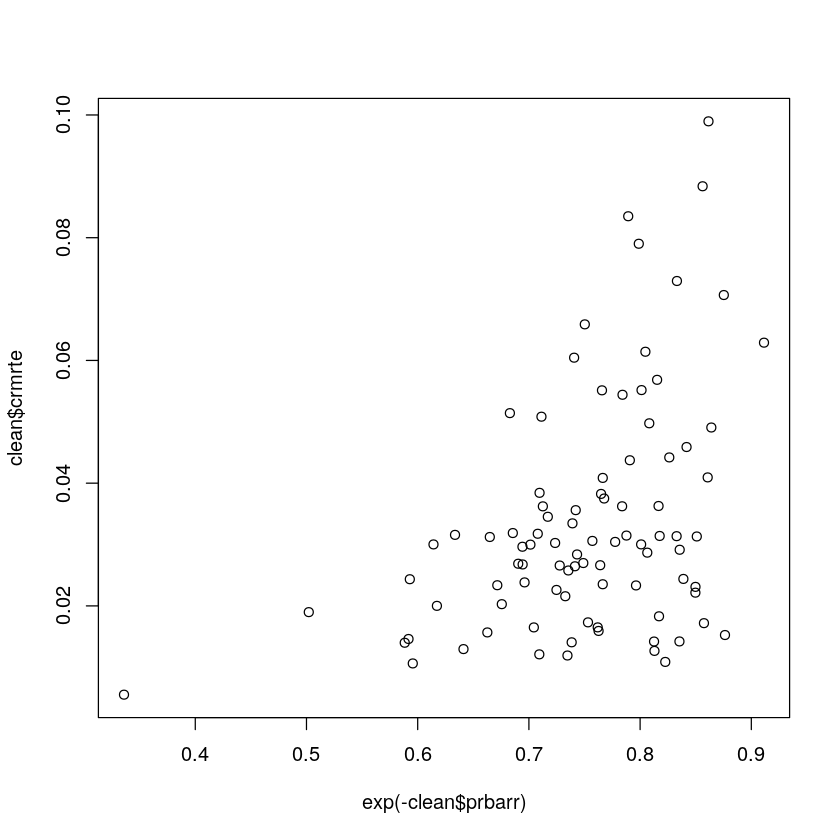

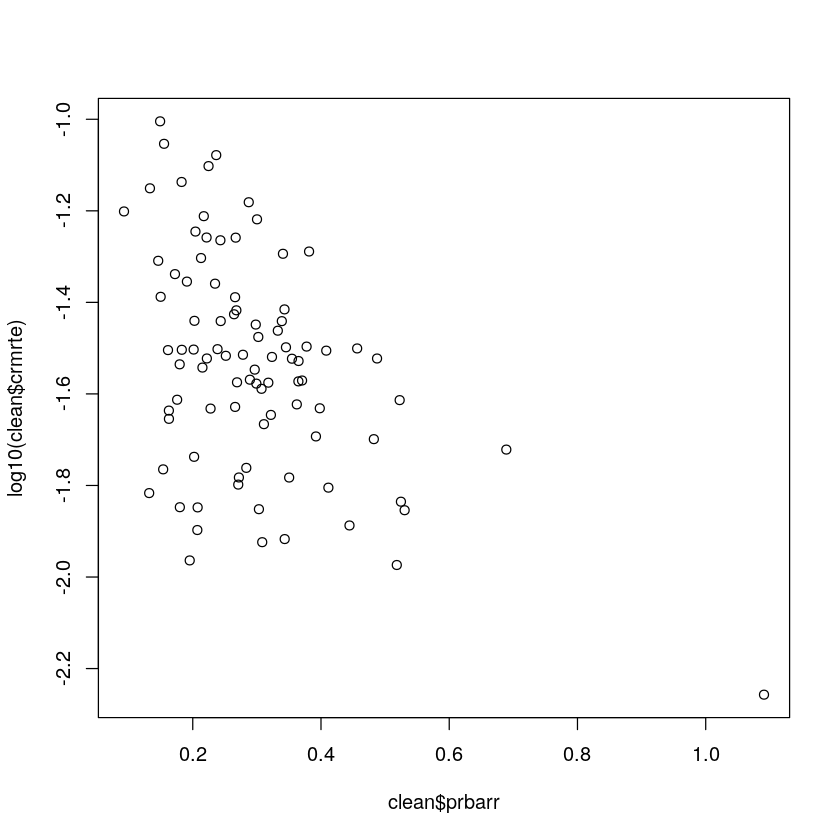

In [23]:
# Impose different transformations to visualize 'prbarr'
# Leave unaltered
plot(x=clean$prbarr, y=clean$crmrte)
plot(x=1/(clean$prbarr), y=clean$crmrte)
plot(x=exp(-clean$prbarr), y=clean$crmrte)
plot(x=clean$prbarr, y=log10(clean$crmrte))

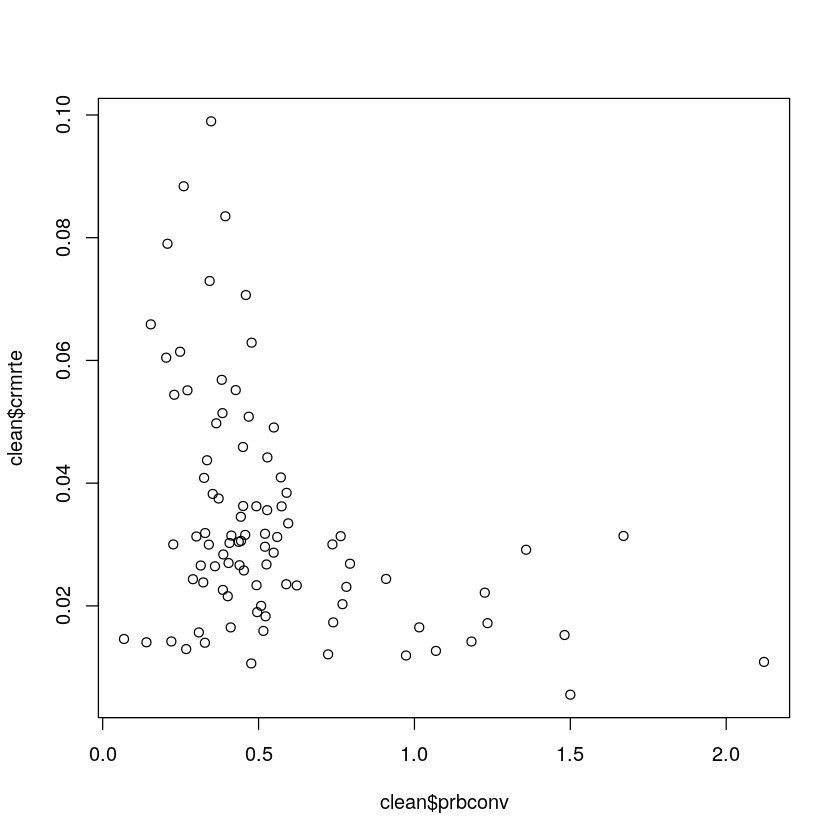

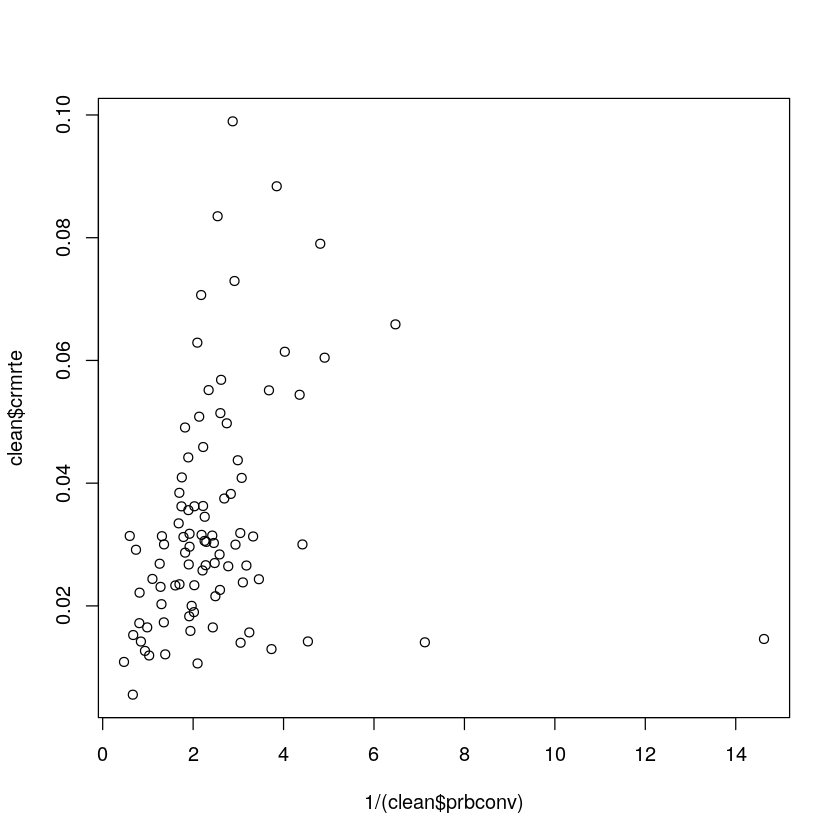

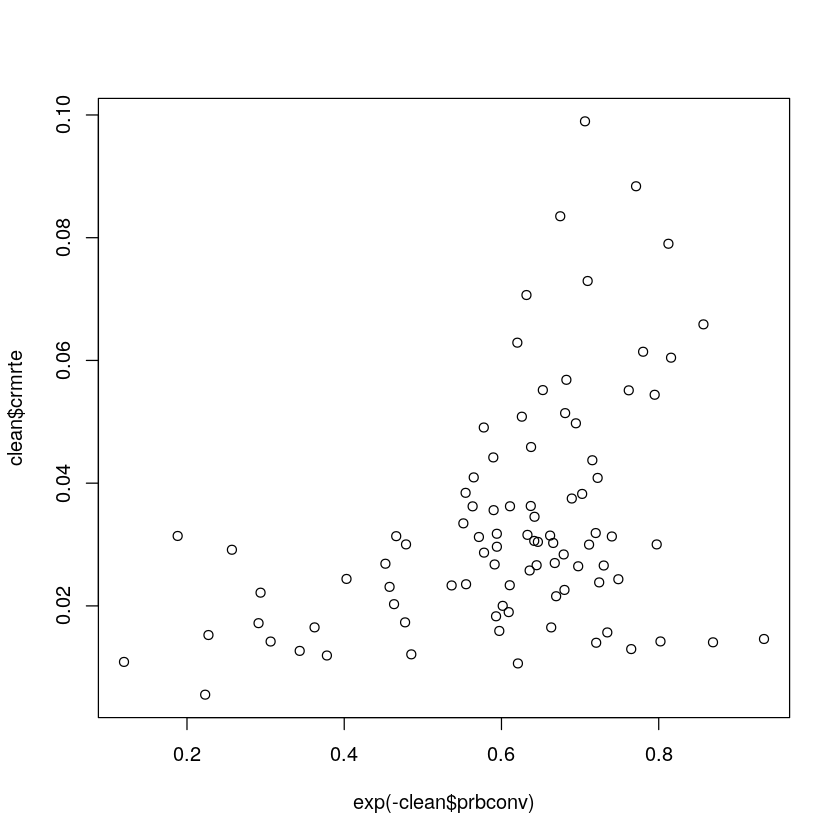

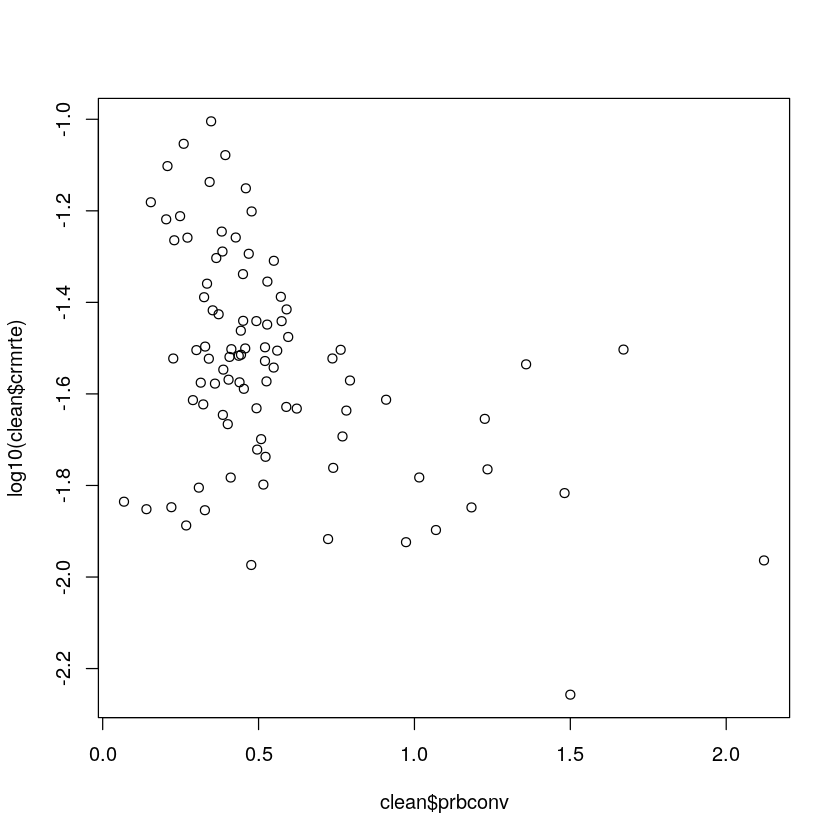

In [24]:
# Impose different transformations to visualize 'prbconv'
plot(x=clean$prbconv, y=clean$crmrte)
# One below is good
plot(x=1/(clean$prbconv), y=clean$crmrte)
plot(x=exp(-clean$prbconv), y=clean$crmrte)
plot(x=clean$prbconv, y=log10(clean$crmrte))

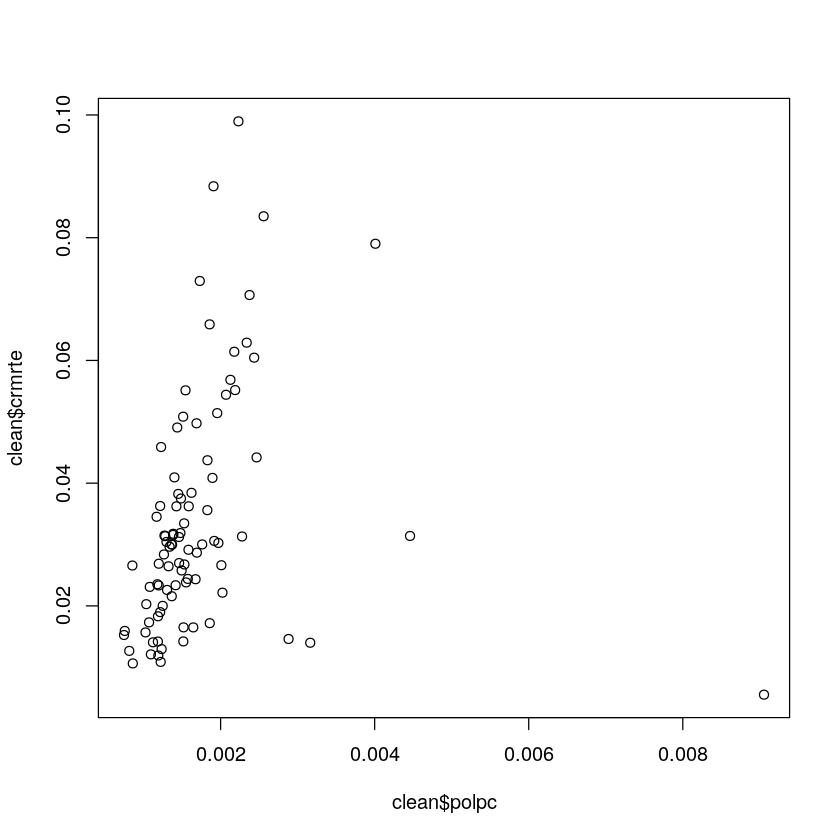

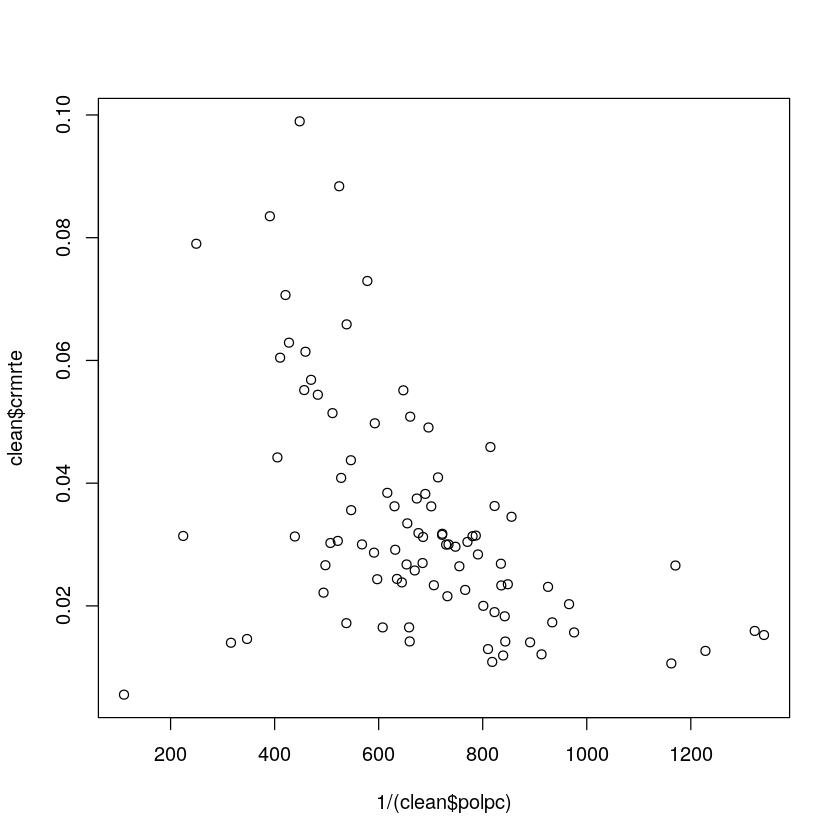

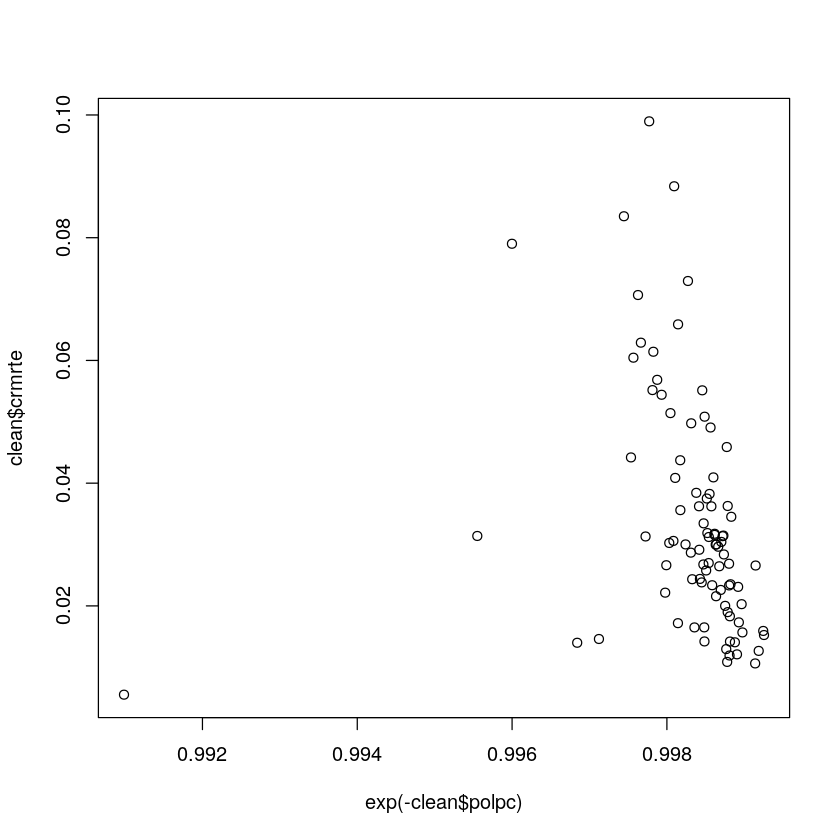

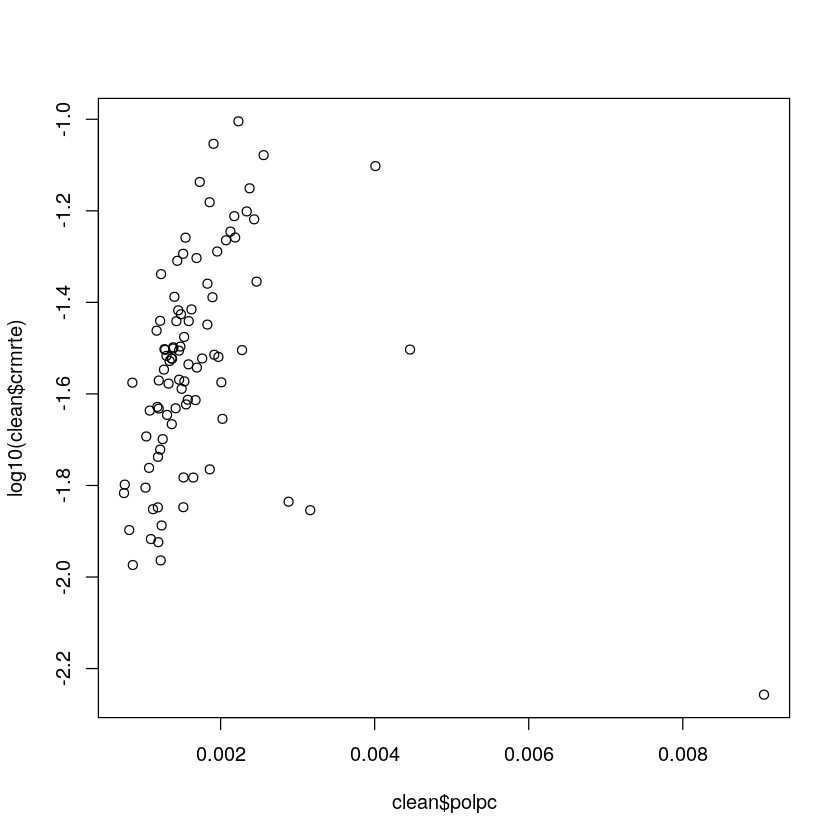

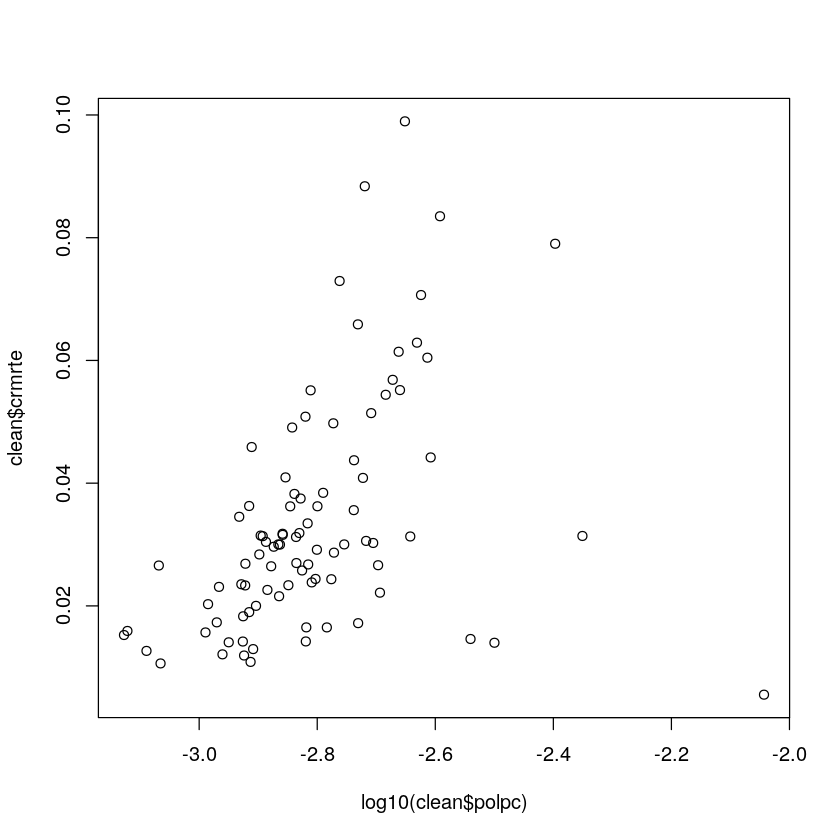

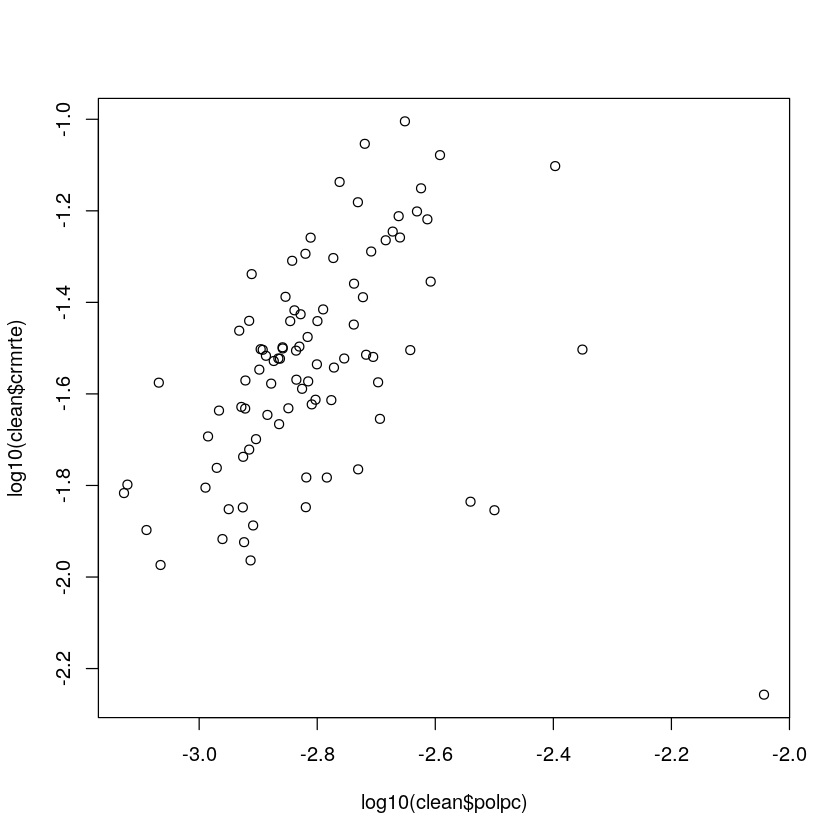

In [25]:
# Impose different transformations to visualize 'polpc'
plot(x=clean$polpc, y=clean$crmrte)
plot(x=1/(clean$polpc), y=clean$crmrte)
plot(x=exp(-clean$polpc), y=clean$crmrte)
# One below is good
plot(x=clean$polpc, y=log10(clean$crmrte))
plot(x=log10(clean$polpc), y=clean$crmrte)
plot(x=log10(clean$polpc), y=log10(clean$crmrte))

# Regressions of Crime Rate on Each Variable Individually

In [26]:
# Regression of 'crmrte' on 'county'
probs <- lm(clean$crmrte ~ clean$county)
probs$coefficients
summary(probs)

(Intercept) clean$county 
3.283252e-02 6.733653e-06


Call:
lm(formula = clean$crmrte ~ clean$county)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028074 -0.012578 -0.003471  0.006879  0.065332 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.283e-02  4.008e-03   8.191 1.88e-12 ***
clean$county 6.734e-06  3.452e-05   0.195    0.846    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01899 on 88 degrees of freedom
Multiple R-squared:  0.0004323,	Adjusted R-squared:  -0.01093 
F-statistic: 0.03805 on 1 and 88 DF,  p-value: 0.8458


In [27]:
# Regression of 'crmrte' on 'prbarr'
probs <- lm(clean$crmrte ~ clean$prbarr)
probs$coefficients
summary(probs)

(Intercept) clean$prbarr 
  0.04952001  -0.05422781


Call:
lm(formula = clean$crmrte ~ clean$prbarr)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028061 -0.010754 -0.003169  0.006823  0.057531 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.049520   0.004372  11.328  < 2e-16 ***
clean$prbarr -0.054228   0.013433  -4.037 0.000115 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01745 on 88 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1467 
F-statistic:  16.3 on 1 and 88 DF,  p-value: 0.0001153


In [28]:
# Regression of 'crmrte' on 'prbconv'
probs <- lm(clean$crmrte ~ clean$prbconv)
probs$coefficients
summary(probs)

(Intercept) clean$prbconv 
   0.04484728   -0.02058116


Call:
lm(formula = clean$crmrte ~ clean$prbconv)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028833 -0.010178 -0.004177  0.009223  0.061277 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.044847   0.003429  13.080  < 2e-16 ***
clean$prbconv -0.020581   0.005244  -3.925 0.000172 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01752 on 88 degrees of freedom
Multiple R-squared:  0.149,	Adjusted R-squared:  0.1393 
F-statistic:  15.4 on 1 and 88 DF,  p-value: 0.0001719


In [29]:
# Regression of 'crmrte' on 'prbpris'
probs <- lm(clean$crmrte ~ clean$prbpris)
probs$coefficients
summary(probs)

(Intercept) clean$prbpris 
   0.02889595    0.01123646


Call:
lm(formula = clean$crmrte ~ clean$prbpris)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028981 -0.013582 -0.003920  0.006475  0.064607 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.02890    0.01043   2.771  0.00683 **
clean$prbpris  0.01124    0.02493   0.451  0.65327   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01897 on 88 degrees of freedom
Multiple R-squared:  0.002304,	Adjusted R-squared:  -0.009034 
F-statistic: 0.2032 on 1 and 88 DF,  p-value: 0.6533


In [30]:
# Regression of 'crmrte' on 'avgsen'
probs <- lm(clean$crmrte ~ clean$avgsen)
probs$coefficients
summary(probs)

(Intercept) clean$avgsen 
0.0322317650 0.0001319201


Call:
lm(formula = clean$crmrte ~ clean$avgsen)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.029429 -0.012994 -0.003477  0.006732  0.065794 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0322318  0.0071665   4.498 2.09e-05 ***
clean$avgsen 0.0001319  0.0007102   0.186    0.853    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01899 on 88 degrees of freedom
Multiple R-squared:  0.0003919,	Adjusted R-squared:  -0.01097 
F-statistic: 0.0345 on 1 and 88 DF,  p-value: 0.8531


In [31]:
# Regression of 'crmrte' on 'polpc'
probs <- lm(clean$crmrte ~ clean$polpc)
probs$coefficients
summary(probs)

(Intercept) clean$polpc 
 0.02806423  3.18839274


Call:
lm(formula = clean$crmrte ~ clean$polpc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.051400 -0.011799 -0.003837  0.006455  0.063787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02806    0.00395   7.105 2.99e-10 ***
clean$polpc  3.18839    2.00318   1.592    0.115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01873 on 88 degrees of freedom
Multiple R-squared:  0.02798,	Adjusted R-squared:  0.01694 
F-statistic: 2.533 on 1 and 88 DF,  p-value: 0.115


## Density accounts for a ton (53% of variation) of crime rate

In [32]:
# Regression of 'crmrte' on 'density'
probs <- lm(clean$crmrte ~ clean$density)
probs$coefficients
summary(probs)

(Intercept) clean$density 
  0.020529697   0.009041231


Call:
lm(formula = clean$crmrte ~ clean$density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.018485 -0.009495 -0.002767  0.004877  0.053862 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0205297  0.0018911  10.856  < 2e-16 ***
clean$density 0.0090412  0.0009067   9.972  4.1e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01301 on 88 degrees of freedom
Multiple R-squared:  0.5305,	Adjusted R-squared:  0.5252 
F-statistic: 99.44 on 1 and 88 DF,  p-value: 4.101e-16


In [33]:
# Regression of 'crmrte' on log10('density')
probs <- lm(clean$crmrte ~ log10(clean$density))
probs$coefficients
summary(probs)

(Intercept) log10(clean$density) 
          0.03407376           0.01513035


Call:
lm(formula = clean$crmrte ~ log10(clean$density))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.022282 -0.011441 -0.003740  0.006619  0.050906 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.034074   0.001762  19.336  < 2e-16 ***
log10(clean$density) 0.015130   0.002965   5.103 1.91e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01669 on 88 degrees of freedom
Multiple R-squared:  0.2283,	Adjusted R-squared:  0.2196 
F-statistic: 26.04 on 1 and 88 DF,  p-value: 1.909e-06


## taxpc also accounts for a lot (20% of variation)

In [34]:
# Regression of 'crmrte' on 'taxpc'
probs <- lm(clean$crmrte ~ clean$taxpc)
probs$coefficients
summary(probs)

(Intercept) clean$taxpc 
0.008844424 0.000646353


Call:
lm(formula = clean$crmrte ~ clean$taxpc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027343 -0.010886 -0.002133  0.006679  0.056466 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0088444  0.0055339   1.598    0.114    
clean$taxpc 0.0006464  0.0001372   4.710 9.18e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01697 on 88 degrees of freedom
Multiple R-squared:  0.2013,	Adjusted R-squared:  0.1923 
F-statistic: 22.19 on 1 and 88 DF,  p-value: 9.181e-06


In [35]:
# Regression of 'crmrte' on log10('taxpc')
probs <- lm(clean$crmrte ~ log10(clean$taxpc))
probs$coefficients
summary(probs)

(Intercept) log10(clean$taxpc) 
       -0.07242264         0.06772591


Call:
lm(formula = clean$crmrte ~ log10(clean$taxpc))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028800 -0.010803 -0.001988  0.007639  0.055652 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -0.07242    0.02499  -2.898  0.00474 ** 
log10(clean$taxpc)  0.06773    0.01593   4.251 5.29e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0173 on 88 degrees of freedom
Multiple R-squared:  0.1703,	Adjusted R-squared:  0.1609 
F-statistic: 18.07 on 1 and 88 DF,  p-value: 5.291e-05


In [36]:
# Regression of log10('crmrte') on 'taxpc'
probs <- lm(log10(clean$crmrte) ~ clean$taxpc)
probs$coefficients
summary(probs)

(Intercept)  clean$taxpc 
-1.786686750  0.006512772


Call:
lm(formula = log10(clean$crmrte) ~ clean$taxpc)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65395 -0.12482  0.02792  0.13697  0.50056 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.786687   0.072947  -24.49  < 2e-16 ***
clean$taxpc  0.006513   0.001809    3.60 0.000525 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2238 on 88 degrees of freedom
Multiple R-squared:  0.1284,	Adjusted R-squared:  0.1185 
F-statistic: 12.96 on 1 and 88 DF,  p-value: 0.0005249


In [37]:
# Regression of log10('crmrte') on log10('taxpc')
probs <- lm(log10(clean$crmrte) ~ log10(clean$taxpc))
probs$coefficients
summary(probs)

(Intercept) log10(clean$taxpc) 
        -2.6388018          0.7036785


Call:
lm(formula = log10(clean$crmrte) ~ log10(clean$taxpc))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6387 -0.1310  0.0276  0.1367  0.4926 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -2.6388     0.3256  -8.105 2.82e-12 ***
log10(clean$taxpc)   0.7037     0.2076   3.390  0.00105 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2254 on 88 degrees of freedom
Multiple R-squared:  0.1155,	Adjusted R-squared:  0.1054 
F-statistic: 11.49 on 1 and 88 DF,  p-value: 0.001049


## west Explains 11% of Variation

In [38]:
# Regression of 'crmrte' on 'west'
probs <- lm(clean$crmrte ~ clean$west)
probs$coefficients
summary(probs)

(Intercept)  clean$west 
 0.03720145 -0.01510170


Call:
lm(formula = clean$crmrte ~ clean$west)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026331 -0.010609 -0.005616  0.006890  0.061764 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.037201   0.002161  17.211  < 2e-16 ***
clean$west  -0.015102   0.004372  -3.454 0.000851 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01782 on 88 degrees of freedom
Multiple R-squared:  0.1194,	Adjusted R-squared:  0.1094 
F-statistic: 11.93 on 1 and 88 DF,  p-value: 0.0008507


In [39]:
# Regression of 'crmrte' on 'central'
probs <- lm(clean$crmrte ~ clean$central)
probs$coefficients
summary(probs)

(Intercept) clean$central 
  0.031082327   0.006425994


Call:
lm(formula = clean$crmrte ~ clean$central)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026638 -0.013454 -0.004356  0.007047  0.061458 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.031082   0.002503  12.418   <2e-16 ***
clean$central 0.006426   0.004072   1.578    0.118    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01873 on 88 degrees of freedom
Multiple R-squared:  0.02752,	Adjusted R-squared:  0.01647 
F-statistic:  2.49 on 1 and 88 DF,  p-value: 0.1182


## urban Explains 38% of Variation

In [40]:
# Regression of 'crmrte' on 'urban'
probs <- lm(clean$crmrte ~ clean$urban)
probs$coefficients
summary(probs)

(Intercept) clean$urban 
 0.02990170  0.04059258


Call:
lm(formula = clean$crmrte ~ clean$urban)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026759 -0.010699 -0.001371  0.006329  0.049115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.029902   0.001654  18.080  < 2e-16 ***
clean$urban 0.040593   0.005547   7.318 1.12e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01498 on 88 degrees of freedom
Multiple R-squared:  0.3783,	Adjusted R-squared:  0.3712 
F-statistic: 53.55 on 1 and 88 DF,  p-value: 1.121e-10


In [41]:
# Regression of 'crmrte' on 'pctmin80'
probs <- lm(clean$crmrte ~ clean$pctmin80)
probs$coefficients
summary(probs)

(Intercept) clean$pctmin80 
   0.028316057    0.000201995


Call:
lm(formula = clean$crmrte ~ clean$pctmin80)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030444 -0.011928 -0.004692  0.007969  0.064884 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0283161  0.0035861   7.896 7.55e-12 ***
clean$pctmin80 0.0002020  0.0001166   1.733   0.0866 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01868 on 88 degrees of freedom
Multiple R-squared:  0.033,	Adjusted R-squared:  0.02201 
F-statistic: 3.003 on 1 and 88 DF,  p-value: 0.08662


## wcon Explains 15% of Variation

In [42]:
# Regression of 'crmrte' on 'wcon'
probs <- lm(clean$crmrte ~ clean$wcon)
probs$coefficients
summary(probs)

(Intercept)    clean$wcon 
-0.0108404608  0.0001554228


Call:
lm(formula = clean$crmrte ~ clean$wcon)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030776 -0.011121 -0.005039  0.006936  0.055137 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.084e-02  1.122e-02  -0.967 0.336409    
clean$wcon   1.554e-04  3.877e-05   4.009 0.000128 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01747 on 88 degrees of freedom
Multiple R-squared:  0.1544,	Adjusted R-squared:  0.1448 
F-statistic: 16.07 on 1 and 88 DF,  p-value: 0.0001275


## wtuc Explains 5.6% of Variation

In [43]:
# Regression of 'crmrte' on 'wtuc'
probs <- lm(clean$crmrte ~ clean$wtuc)
probs$coefficients
summary(probs)

(Intercept)   clean$wtuc 
9.833279e-03 5.762051e-05


Call:
lm(formula = clean$crmrte ~ clean$wtuc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033297 -0.011875 -0.004088  0.007913  0.057538 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 9.833e-03  1.057e-02   0.930   0.3549  
clean$wtuc  5.762e-05  2.529e-05   2.278   0.0251 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01846 on 88 degrees of freedom
Multiple R-squared:  0.05569,	Adjusted R-squared:  0.04496 
F-statistic:  5.19 on 1 and 88 DF,  p-value: 0.02514


## wtrd Explains 18% of Variation

In [44]:
# Regression of 'crmrte' on 'wtrd'
probs <- lm(clean$crmrte ~ clean$wtrd)
probs$coefficients
summary(probs)

(Intercept)    clean$wtrd 
-0.0167379686  0.0002382304


Call:
lm(formula = clean$crmrte ~ clean$wtrd)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.029542 -0.011205 -0.004870  0.005934  0.054201 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.674e-02  1.148e-02  -1.458    0.148    
clean$wtrd   2.382e-04  5.375e-05   4.433 2.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01717 on 88 degrees of freedom
Multiple R-squared:  0.1825,	Adjusted R-squared:  0.1732 
F-statistic: 19.65 on 1 and 88 DF,  p-value: 2.675e-05


## wfir Explains 11% of Variation

In [45]:
# Regression of 'crmrte' on 'wfir'
probs <- lm(clean$crmrte ~ clean$wfir)
probs$coefficients
summary(probs)

(Intercept)    clean$wfir 
-0.0042905972  0.0001175311


Call:
lm(formula = clean$crmrte ~ clean$wfir)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033163 -0.011934 -0.003624  0.008255  0.054497 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -4.291e-03  1.145e-02  -0.375   0.7088   
clean$wfir   1.175e-04  3.512e-05   3.347   0.0012 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01789 on 88 degrees of freedom
Multiple R-squared:  0.1129,	Adjusted R-squared:  0.1028 
F-statistic:  11.2 on 1 and 88 DF,  p-value: 0.001204


In [46]:
# Regression of 'crmrte' on 'wser'
probs <- lm(clean$crmrte ~ clean$wser)
probs$coefficients
summary(probs)

(Intercept)    clean$wser 
 3.481554e-02 -4.741879e-06


Call:
lm(formula = clean$crmrte ~ clean$wser)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028120 -0.013195 -0.003718  0.006638  0.065830 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.482e-02  3.335e-03  10.439   <2e-16 ***
clean$wser  -4.742e-06  9.695e-06  -0.489    0.626    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01897 on 88 degrees of freedom
Multiple R-squared:  0.002711,	Adjusted R-squared:  -0.008622 
F-statistic: 0.2392 on 1 and 88 DF,  p-value: 0.626


## wmfg Explains 11% of the Variation

In [47]:
# Regression of 'crmrte' on 'wmfg'
probs <- lm(clean$crmrte ~ clean$wmfg)
probs$coefficients
summary(probs)

(Intercept)   clean$wmfg 
8.149342e-03 7.547059e-05


Call:
lm(formula = clean$crmrte ~ clean$wmfg)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.038978 -0.009995 -0.003531  0.006901  0.053511 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.149e-03  7.416e-03   1.099 0.274829    
clean$wmfg  7.547e-05  2.135e-05   3.534 0.000654 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01777 on 88 degrees of freedom
Multiple R-squared:  0.1243,	Adjusted R-squared:  0.1143 
F-statistic: 12.49 on 1 and 88 DF,  p-value: 0.0006543


## wfed Explains 24% of Variation [also an Urban Correlate? (Locality Pay)]

In [48]:
# Regression of 'crmrte' on 'wfed'
probs <- lm(clean$crmrte ~ clean$wfed)
probs$coefficients
summary(probs)

(Intercept)    clean$wfed 
-0.0348051141  0.0001543428


Call:
lm(formula = clean$crmrte ~ clean$wfed)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027912 -0.010687 -0.004585  0.005028  0.061513 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.481e-02  1.308e-02  -2.662  0.00924 ** 
clean$wfed   1.543e-04  2.928e-05   5.272 9.54e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01656 on 88 degrees of freedom
Multiple R-squared:   0.24,	Adjusted R-squared:  0.2314 
F-statistic: 27.79 on 1 and 88 DF,  p-value: 9.54e-07


## wsta Explains 4% of Variation

In [49]:
# Regression of 'crmrte' on 'wsta'
probs <- lm(clean$crmrte ~ clean$wsta)
probs$coefficients
summary(probs)

(Intercept)   clean$wsta 
2.321186e-03 8.718264e-05


Call:
lm(formula = clean$crmrte ~ clean$wsta)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026464 -0.013797 -0.003547  0.008541  0.067942 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 2.321e-03  1.642e-02   0.141    0.888  
clean$wsta  8.718e-05  4.557e-05   1.913    0.059 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01861 on 88 degrees of freedom
Multiple R-squared:  0.03994,	Adjusted R-squared:  0.02903 
F-statistic: 3.661 on 1 and 88 DF,  p-value: 0.05896


## wloc Explains 13% of Variation

In [50]:
# Regression of 'crmrte' on 'wloc'
probs <- lm(clean$crmrte ~ clean$wloc)
probs$coefficients
summary(probs)

(Intercept)    clean$wloc 
-0.0419299554  0.0002415776


Call:
lm(formula = clean$crmrte ~ clean$wloc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.045815 -0.009855 -0.003494  0.007339  0.049698 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.193e-02  2.094e-02  -2.003 0.048278 *  
clean$wloc   2.416e-04  6.677e-05   3.618 0.000495 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01772 on 88 degrees of freedom
Multiple R-squared:  0.1295,	Adjusted R-squared:  0.1196 
F-statistic: 13.09 on 1 and 88 DF,  p-value: 0.0004951


In [51]:
# Regression of 'crmrte' on 'mix'
probs <- lm(clean$crmrte ~ clean$mix)
probs$coefficients
summary(probs)

(Intercept)   clean$mix 
 0.03744470 -0.03049137


Call:
lm(formula = clean$crmrte ~ clean$mix)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028862 -0.012325 -0.003125  0.006266  0.066665 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.037445   0.003723  10.058 2.73e-16 ***
clean$mix   -0.030491   0.024409  -1.249    0.215    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01883 on 88 degrees of freedom
Multiple R-squared:  0.01742,	Adjusted R-squared:  0.006258 
F-statistic: 1.561 on 1 and 88 DF,  p-value: 0.2149


## mix Explains 8.4% of Variation

In [52]:
# Regression of 'pctymle' on 'mix'
probs <- lm(clean$crmrte ~ clean$pctymle)
probs$coefficients
summary(probs)

(Intercept) clean$pctymle 
   0.01386032    0.23385103


Call:
lm(formula = clean$crmrte ~ clean$pctymle)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026828 -0.011823 -0.002585  0.004728  0.066593 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.013860   0.007165   1.935   0.0563 . 
clean$pctymle 0.233851   0.082162   2.846   0.0055 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01818 on 88 degrees of freedom
Multiple R-squared:  0.0843,	Adjusted R-squared:  0.07389 
F-statistic: 8.101 on 1 and 88 DF,  p-value: 0.005504


# Building Multiple Regressions

## _prbarr_ and _prbconv_

In [53]:
# Regression of 'crmrte' on 'prbarr'
probs <- lm(clean$crmrte ~ clean$prbarr)
probs$coefficients
summary(probs)

(Intercept) clean$prbarr 
  0.04952001  -0.05422781


Call:
lm(formula = clean$crmrte ~ clean$prbarr)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028061 -0.010754 -0.003169  0.006823  0.057531 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.049520   0.004372  11.328  < 2e-16 ***
clean$prbarr -0.054228   0.013433  -4.037 0.000115 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01745 on 88 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1467 
F-statistic:  16.3 on 1 and 88 DF,  p-value: 0.0001153


In [54]:
# Regression of 'crmrte' on 'prbconv'
probs <- lm(clean$crmrte ~ clean$prbconv)
probs$coefficients
summary(probs)

(Intercept) clean$prbconv 
   0.04484728   -0.02058116


Call:
lm(formula = clean$crmrte ~ clean$prbconv)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028833 -0.010178 -0.004177  0.009223  0.061277 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.044847   0.003429  13.080  < 2e-16 ***
clean$prbconv -0.020581   0.005244  -3.925 0.000172 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01752 on 88 degrees of freedom
Multiple R-squared:  0.149,	Adjusted R-squared:  0.1393 
F-statistic:  15.4 on 1 and 88 DF,  p-value: 0.0001719


(Intercept)  clean$prbarr clean$prbconv 
   0.06246762   -0.05736077   -0.02182518


Call:
lm(formula = clean$crmrte ~ clean$prbarr + clean$prbconv)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033134 -0.010811 -0.003115  0.006445  0.052641 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.062468   0.004828  12.938  < 2e-16 ***
clean$prbarr  -0.057361   0.012118  -4.733 8.49e-06 ***
clean$prbconv -0.021825   0.004710  -4.633 1.25e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01571 on 87 degrees of freedom
Multiple R-squared:  0.3232,	Adjusted R-squared:  0.3077 
F-statistic: 20.78 on 2 and 87 DF,  p-value: 4.204e-08


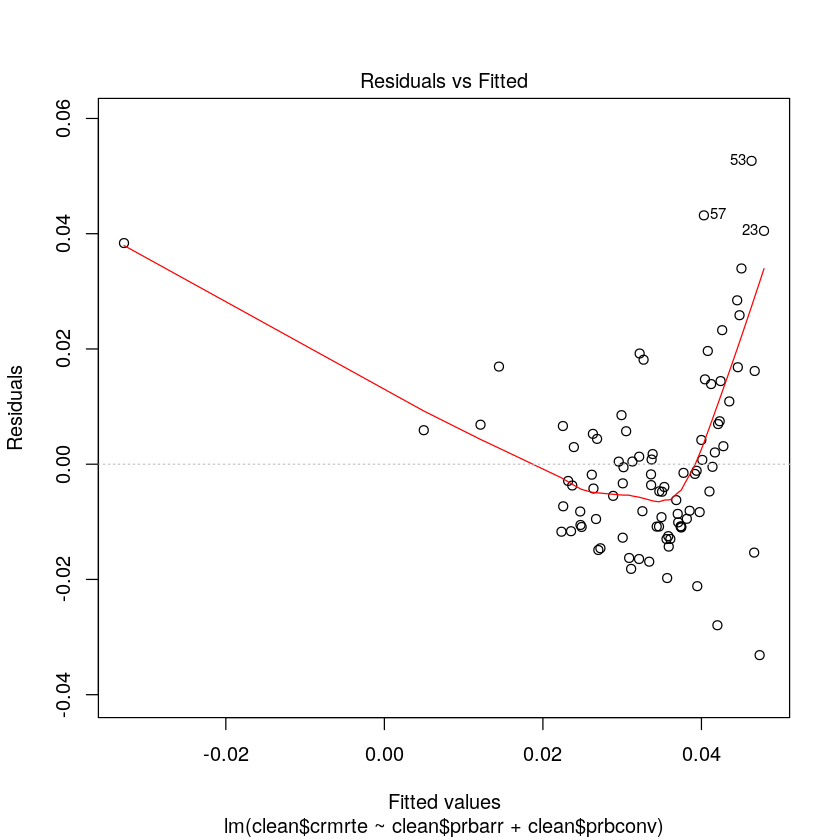

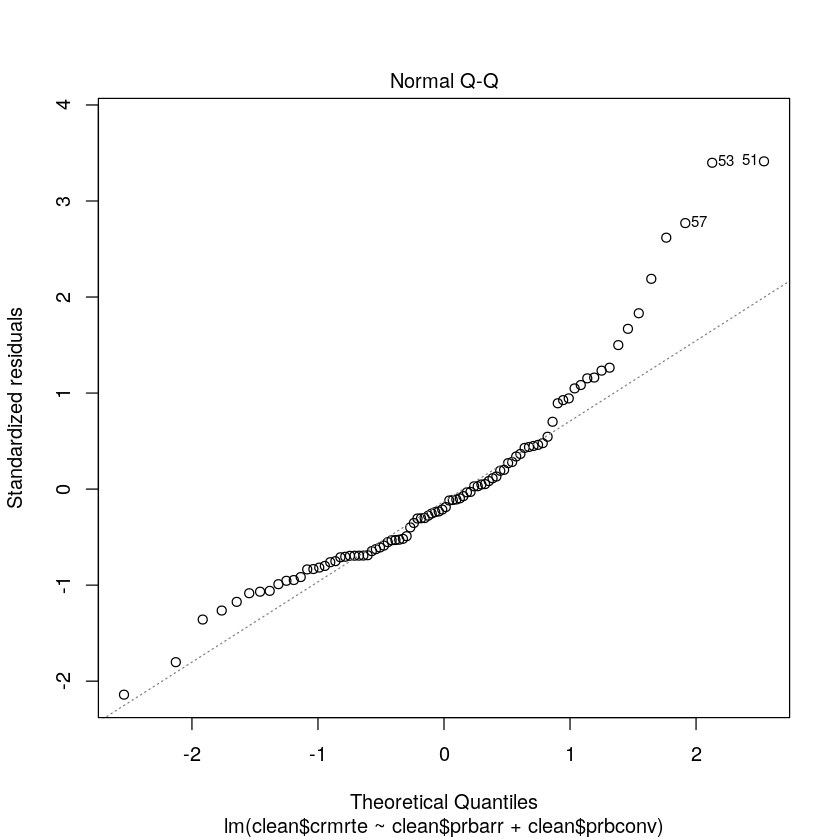

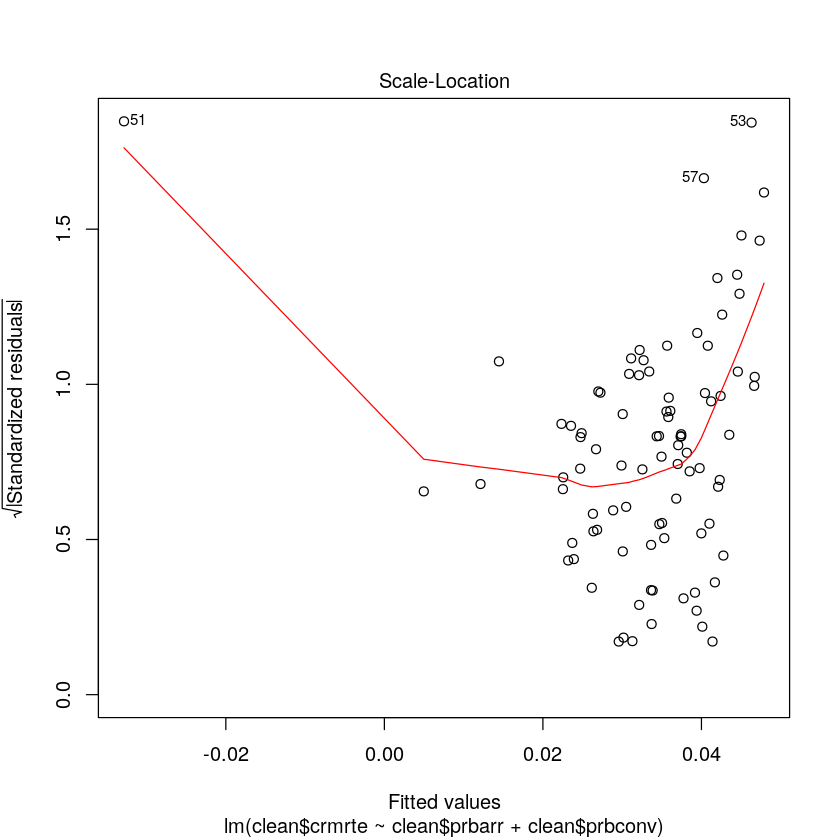

[1] "Covariance of prbarr with residuals: -7.63418185038333e-20"

[1] "Covariance of prbconv with residuals: 4.43231403405097e-19"

 lag Autocorrelation D-W Statistic p-value
   1    -0.008443554      2.011563   0.976
 Alternative hypothesis: rho != 0

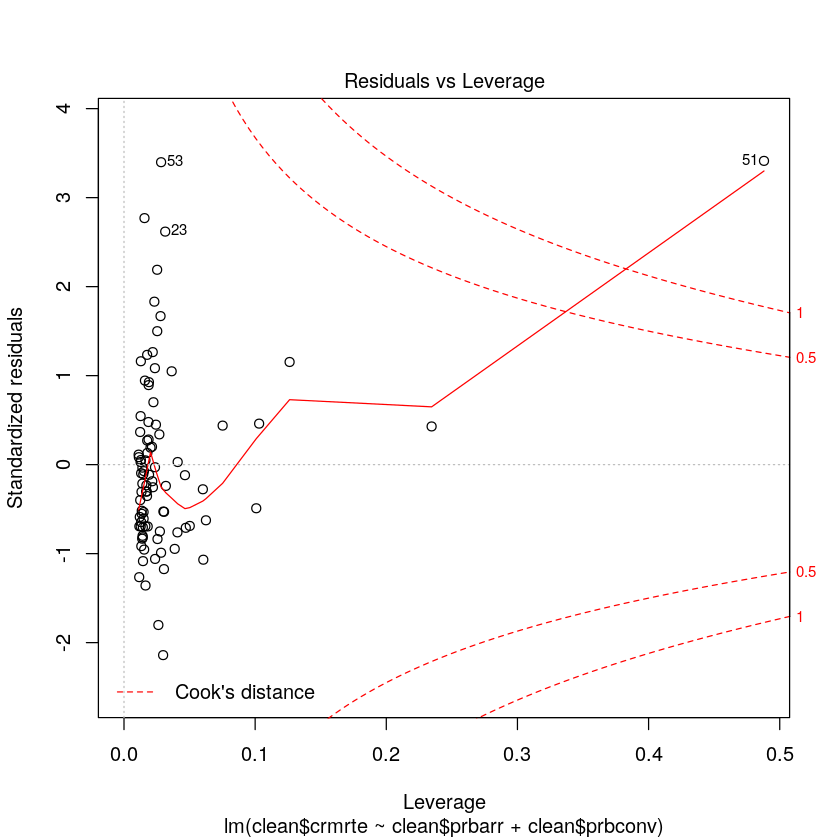

In [55]:
# Regression of 'crmrte' on 'prbarr' and 'prbconv'
# This model doesn't hold for zero-conditional mean; however, prbarr and prbconv are exogenous, so it's consistent
# The DWT ~ 2, so no autocorrelation is present in this model
probs <- lm(clean$crmrte ~ clean$prbarr + clean$prbconv)
probs$coefficients
summary(probs)

plot(probs)

paste("Covariance of prbarr with residuals:", (cov(clean$prbarr, resid(probs))))
paste("Covariance of prbconv with residuals:", (cov(clean$prbconv, resid(probs))))

dwt(probs)


(Intercept)      prbarr     prbconv        west 
 0.06295039 -0.05099432 -0.02102593 -0.01146544


Call:
lm(formula = crmrte ~ prbarr + prbconv + west, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030473 -0.008801 -0.002248  0.004816  0.050931 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.062950   0.004614  13.643  < 2e-16 ***
prbarr      -0.050994   0.011759  -4.336 3.92e-05 ***
prbconv     -0.021026   0.004506  -4.666 1.12e-05 ***
west        -0.011465   0.003744  -3.062  0.00293 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01501 on 86 degrees of freedom
Multiple R-squared:  0.3898,	Adjusted R-squared:  0.3685 
F-statistic: 18.31 on 3 and 86 DF,  p-value: 2.831e-09


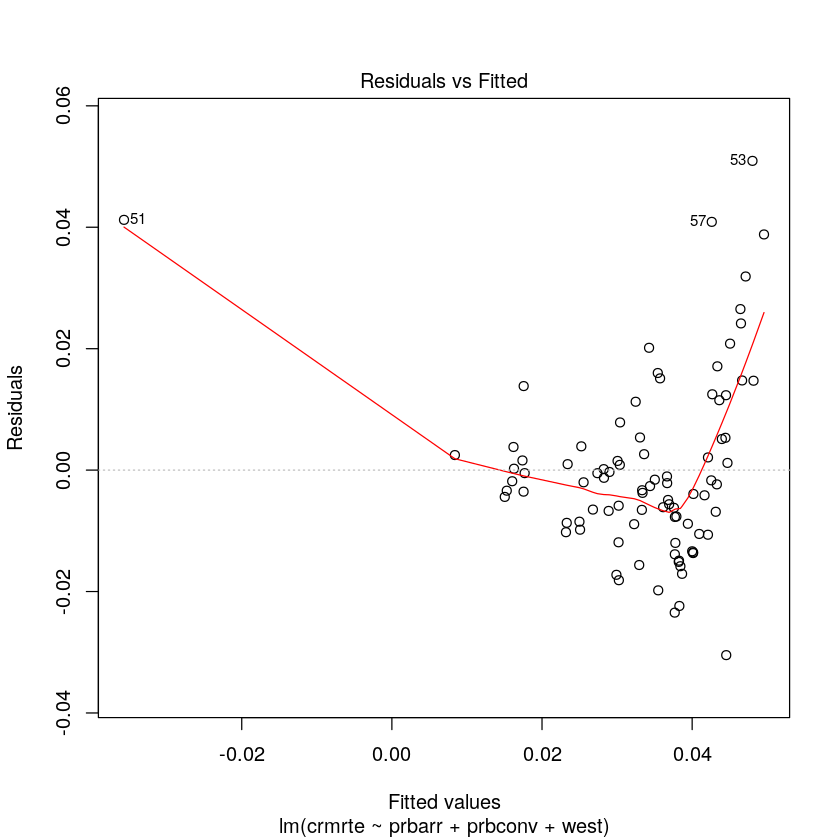

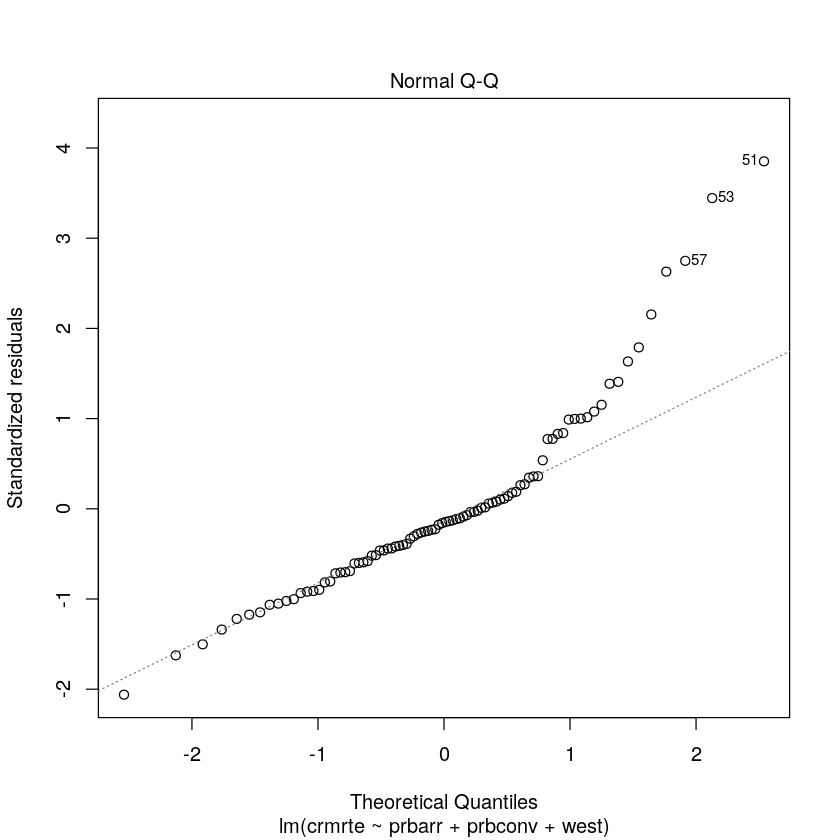

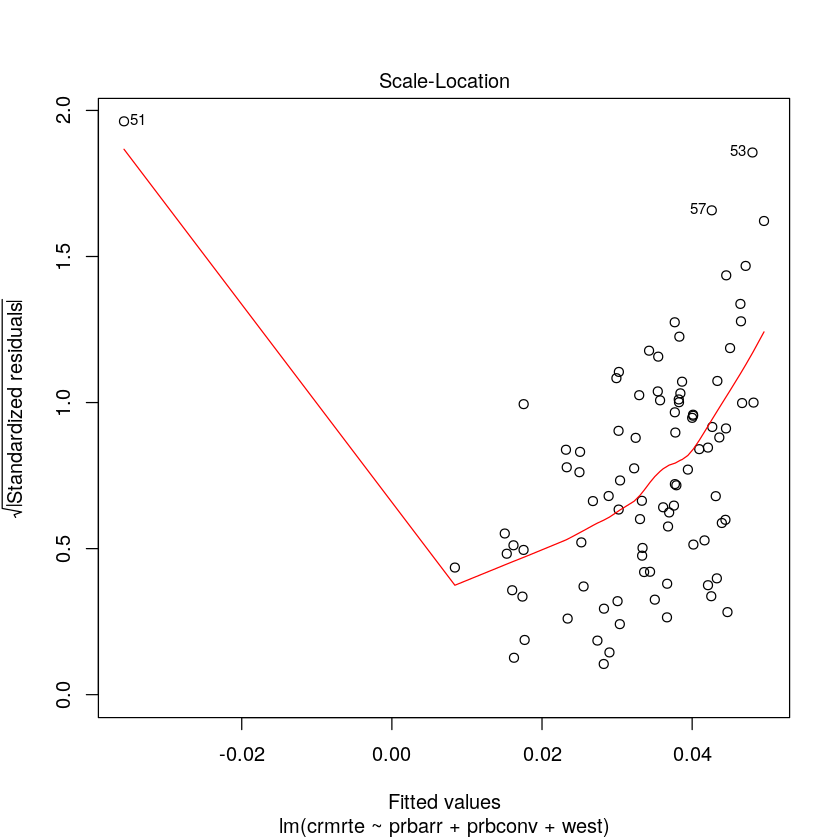

[1] "Covariance of prbarr with residuals: -3.48397321010312e-20"

[1] "Covariance of prbconv with residuals: 7.97103210180897e-20"

[1] "Covariance of west with residuals: 1.67174800393207e-19"

 lag Autocorrelation D-W Statistic p-value
   1      -0.1238302      2.247431   0.222
 Alternative hypothesis: rho != 0

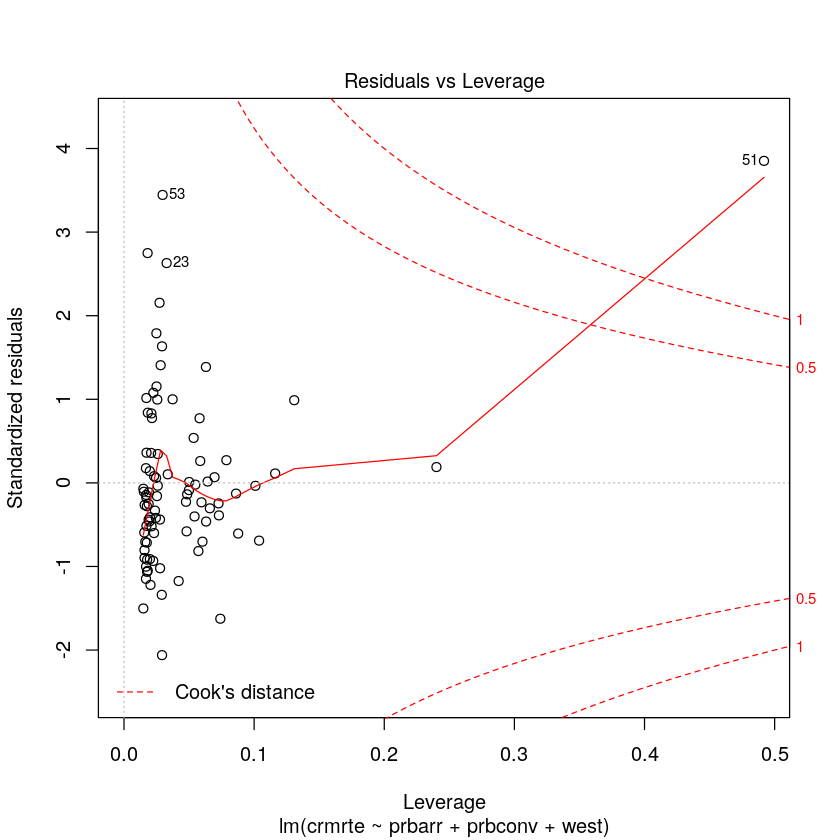

In [56]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', and 'west'
# This model doesn't hold for zero-conditional mean; however, prbarr, prbconv, and west are exogenous, so it's consistent
# The DWT ~ 2, so no autocorrelation is present in this model
probs <- lm(crmrte ~ prbarr + prbconv + west, data=clean)
probs$coefficients
summary(probs)

plot(probs)

paste("Covariance of prbarr with residuals:", (cov(clean$prbarr, resid(probs))))
paste("Covariance of prbconv with residuals:", (cov(clean$prbconv, resid(probs))))
paste("Covariance of west with residuals:", (cov(clean$west, resid(probs))))


dwt(probs)


(Intercept)       prbarr      prbconv      density 
 0.039794527 -0.031337262 -0.014012886  0.007443552


Call:
lm(formula = crmrte ~ prbarr + prbconv + density, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020203 -0.008022 -0.003255  0.004713  0.045366 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0397945  0.0044969   8.849 9.97e-14 ***
prbarr      -0.0313373  0.0095466  -3.283 0.001488 ** 
prbconv     -0.0140129  0.0036311  -3.859 0.000219 ***
density      0.0074436  0.0008855   8.406 7.95e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01171 on 86 degrees of freedom
Multiple R-squared:  0.6285,	Adjusted R-squared:  0.6155 
F-statistic:  48.5 on 3 and 86 DF,  p-value: < 2.2e-16


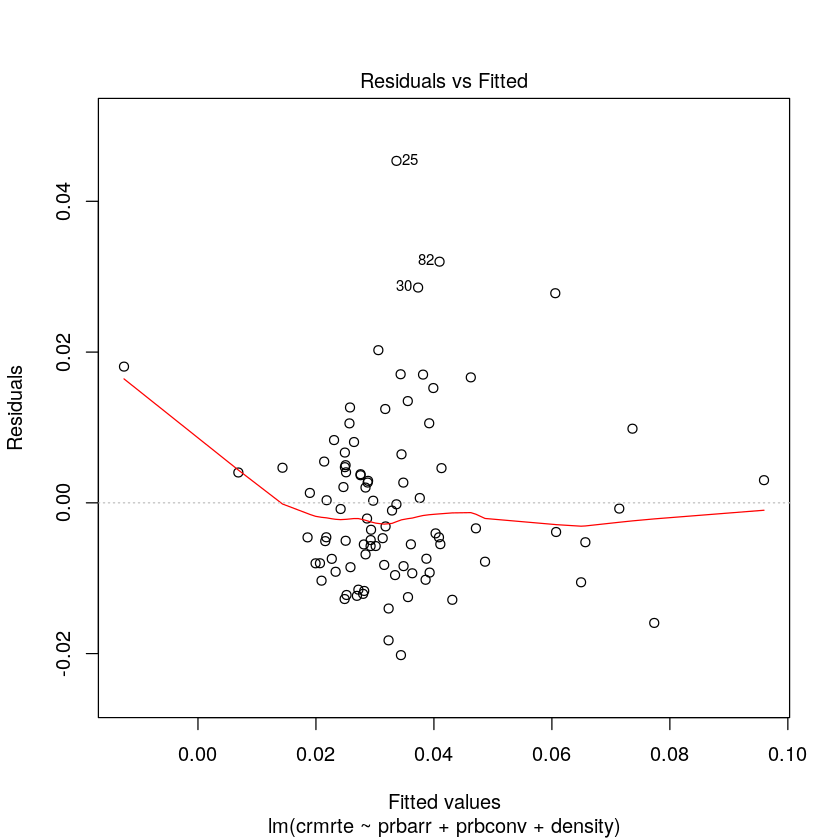

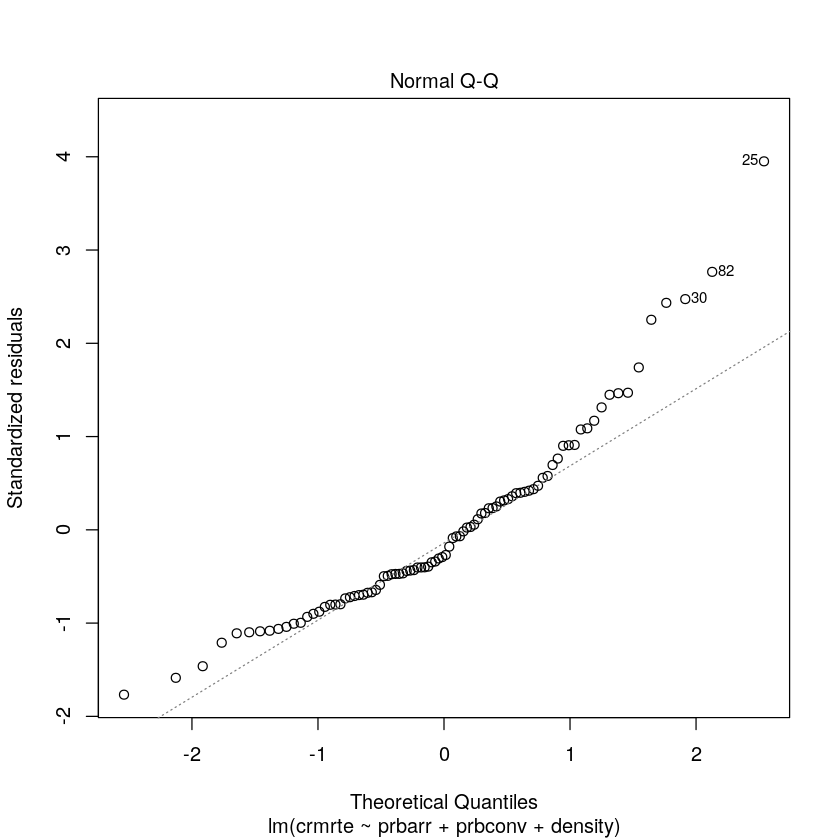

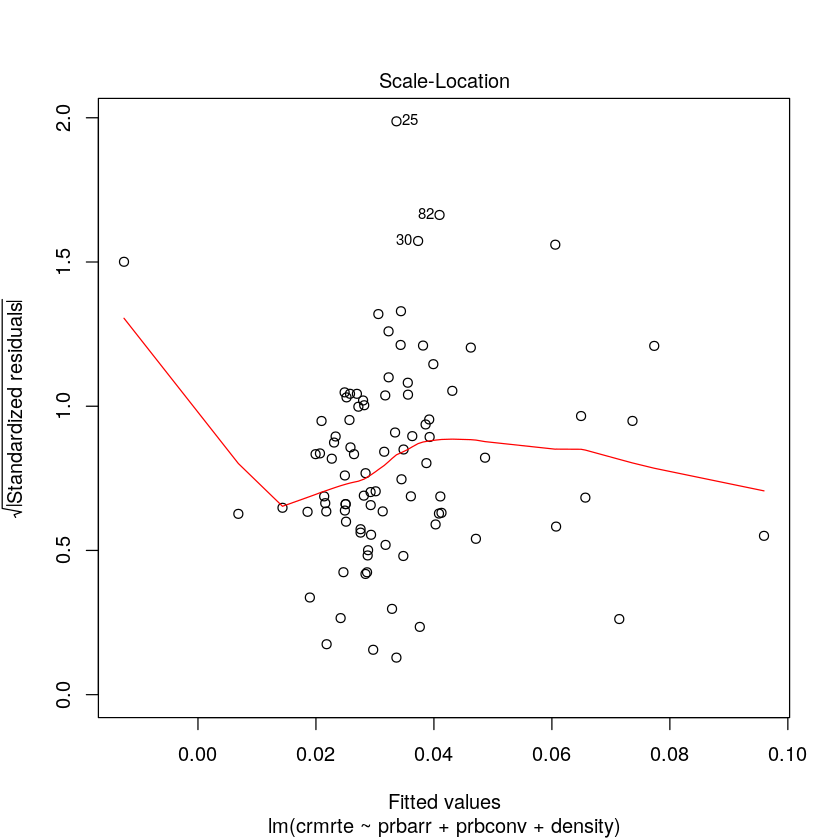

[1] "Covariance of prbarr with residuals: -1.48159386588554e-20"

[1] "Covariance of prbconv with residuals: 3.25646099322773e-19"

[1] "Covariance of density with residuals: 8.84625982553789e-20"

 lag Autocorrelation D-W Statistic p-value
   1      -0.1115011      2.213364     0.3
 Alternative hypothesis: rho != 0

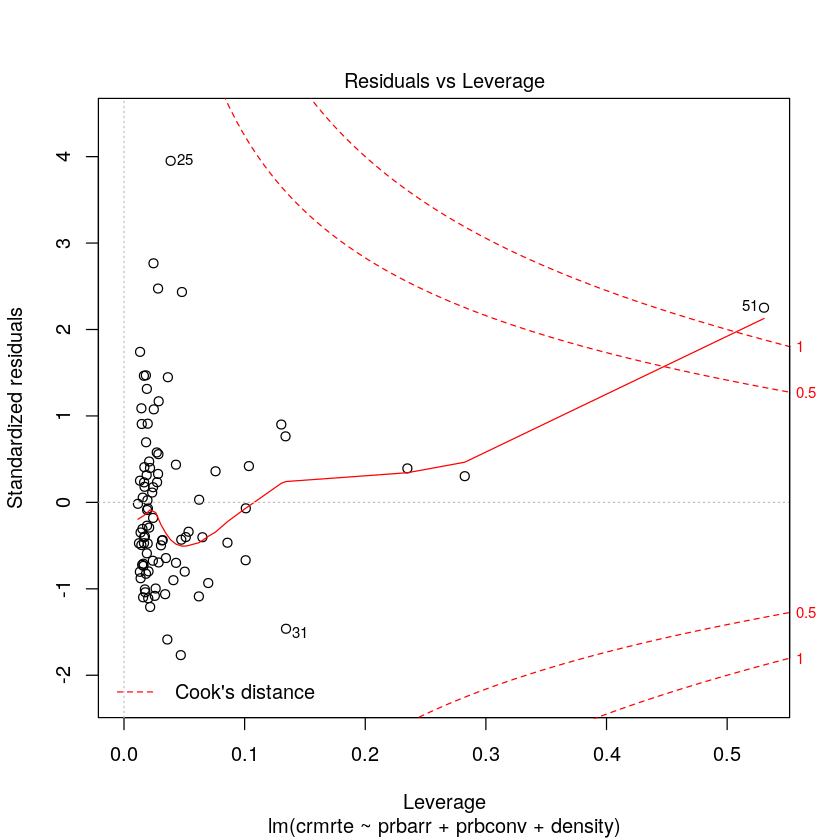

In [57]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', and 'density'
# This model doesn't hold for zero-conditional mean; however, prbarr, prbconv, west, and density are exogenous, so it's consistent
# The DWT
probs <- lm(crmrte ~ prbarr + prbconv + density, data=clean)
probs$coefficients
summary(probs)

plot(probs)

paste("Covariance of prbarr with residuals:", (cov(clean$prbarr, resid(probs))))
paste("Covariance of prbconv with residuals:", (cov(clean$prbconv, resid(probs))))
paste("Covariance of density with residuals:", (cov(clean$density, resid(probs))))


dwt(probs)


(Intercept)       prbarr      prbconv         west      density 
 0.040881939 -0.026765543 -0.013575560 -0.009641801  0.007219841


Call:
lm(formula = crmrte ~ prbarr + prbconv + west + density, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020660 -0.006579 -0.000992  0.003369  0.043275 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0408819  0.0042404   9.641 2.72e-15 ***
prbarr      -0.0267655  0.0090724  -2.950 0.004102 ** 
prbconv     -0.0135756  0.0034171  -3.973 0.000148 ***
west        -0.0096418  0.0027557  -3.499 0.000746 ***
density      0.0072198  0.0008352   8.645 2.83e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01101 on 85 degrees of freedom
Multiple R-squared:  0.6753,	Adjusted R-squared:   0.66 
F-statistic: 44.19 on 4 and 85 DF,  p-value: < 2.2e-16


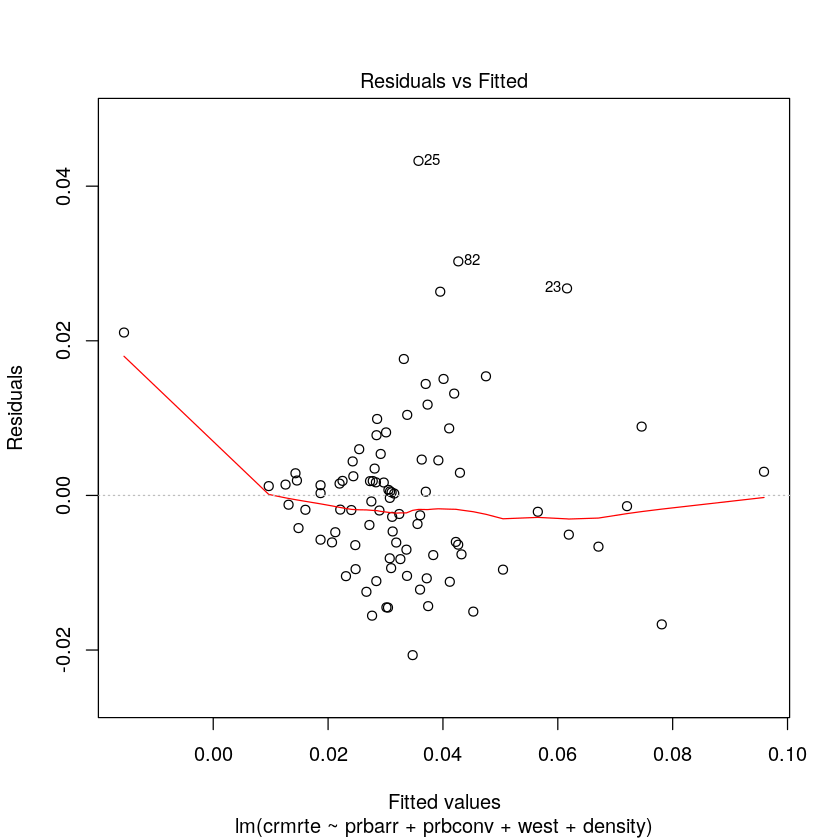

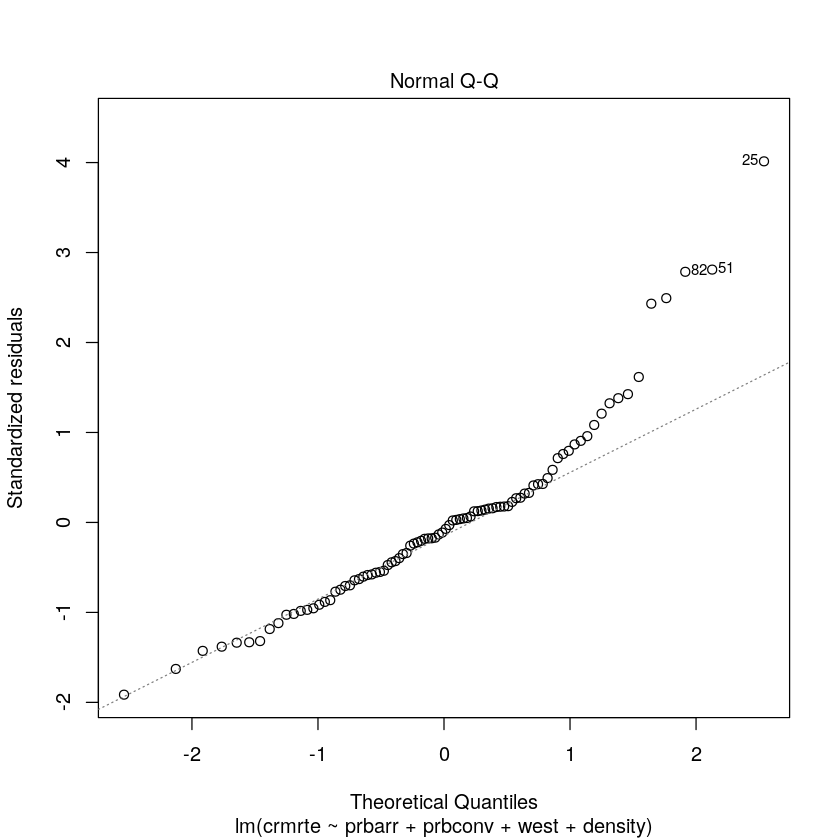

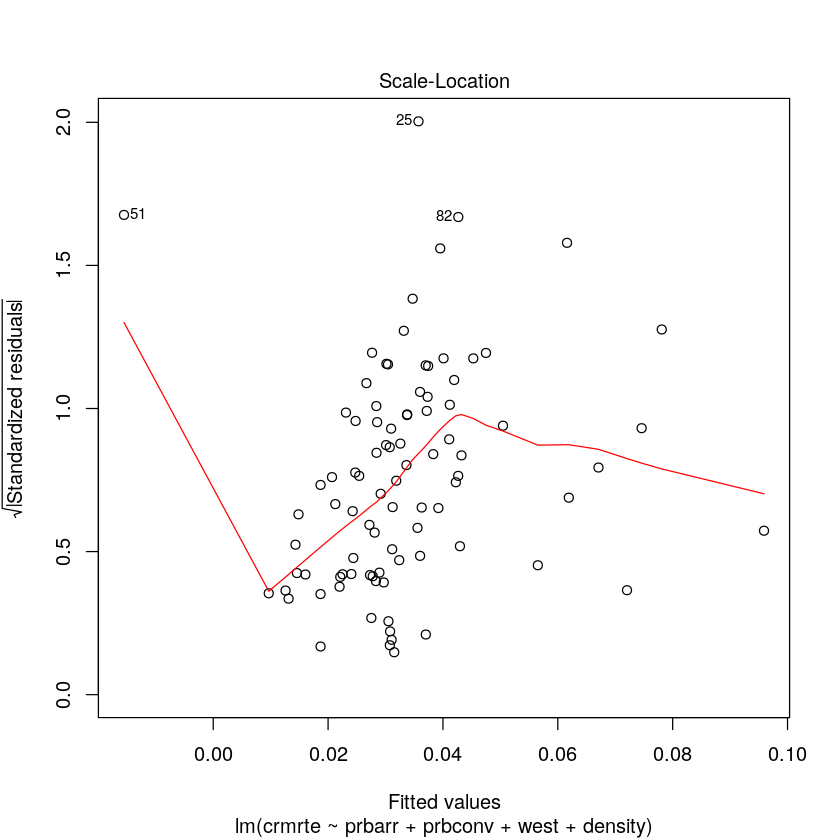

[1] "Covariance of prbarr with residuals: -1.11225419059822e-19"

[1] "Covariance of prbconv with residuals: 1.20126402924087e-19"

[1] "Covariance of west with residuals: -1.36655441925704e-20"

[1] "Covariance of density with residuals: 5.77650297661085e-19"

 lag Autocorrelation D-W Statistic p-value
   1      -0.2063416      2.406711   0.044
 Alternative hypothesis: rho != 0

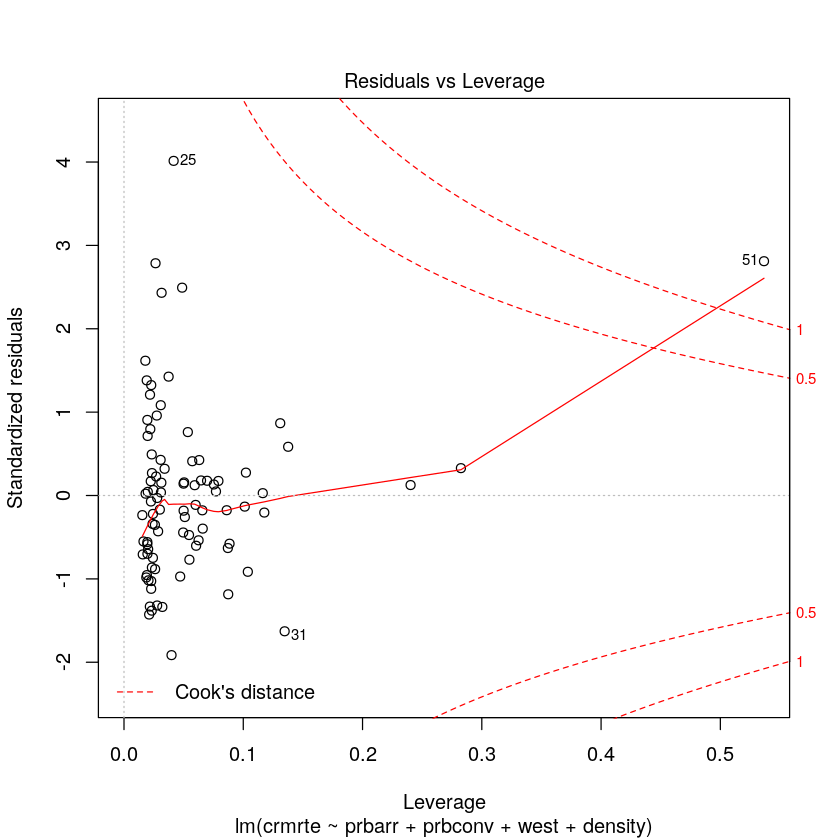

In [58]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', 'west', and 'density'
# This model doesn't hold for zero-conditional mean; however, prbarr, prbconv, west, and density are exogenous, so it's consistent
# The DWT
probs <- lm(crmrte ~ prbarr + prbconv + west + density, data=clean)
probs$coefficients
summary(probs)

plot(probs)

paste("Covariance of prbarr with residuals:", (cov(clean$prbarr, resid(probs))))
paste("Covariance of prbconv with residuals:", (cov(clean$prbconv, resid(probs))))
paste("Covariance of west with residuals:", (cov(clean$west, resid(probs))))
paste("Covariance of density with residuals:", (cov(clean$density, resid(probs))))


dwt(probs)


(Intercept)       prbarr      prbconv         west      density          mix 
 0.042677569 -0.023177259 -0.014691631 -0.009862279  0.007133185 -0.015978257


Call:
lm(formula = crmrte ~ prbarr + prbconv + west + density + mix, 
    data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.022055 -0.006962 -0.000480  0.004157  0.042298 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0426776  0.0046359   9.206 2.28e-14 ***
prbarr      -0.0231773  0.0098152  -2.361 0.020523 *  
prbconv     -0.0146916  0.0036107  -4.069 0.000106 ***
west        -0.0098623  0.0027665  -3.565 0.000603 ***
density      0.0071332  0.0008404   8.488 6.38e-13 ***
mix         -0.0159783  0.0166340  -0.961 0.339521    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01102 on 84 degrees of freedom
Multiple R-squared:  0.6788,	Adjusted R-squared:  0.6597 
F-statistic:  35.5 on 5 and 84 DF,  p-value: < 2.2e-16


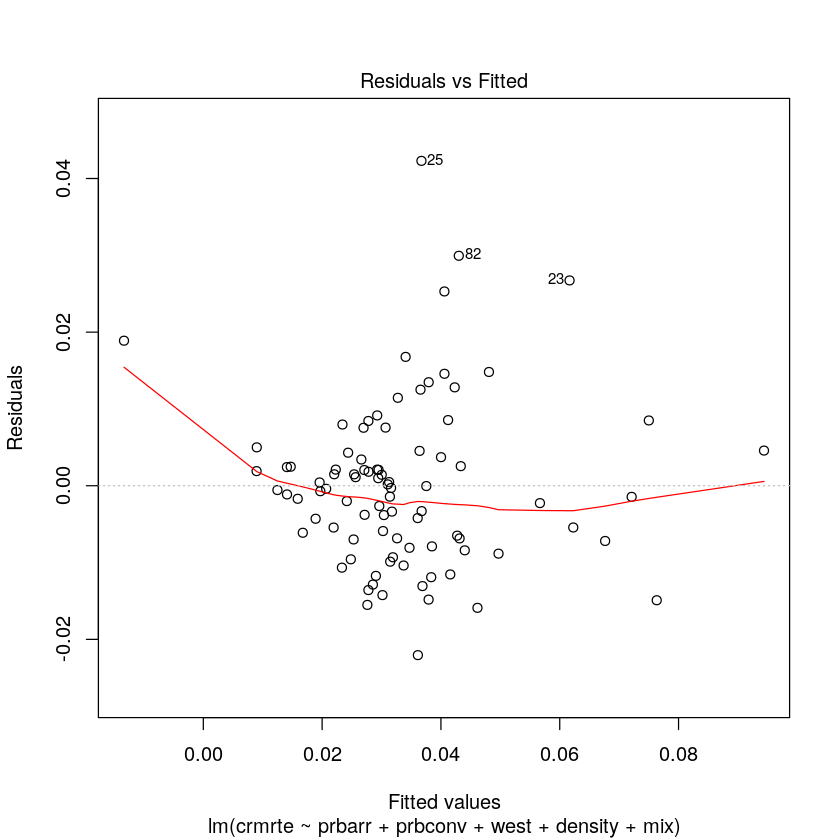

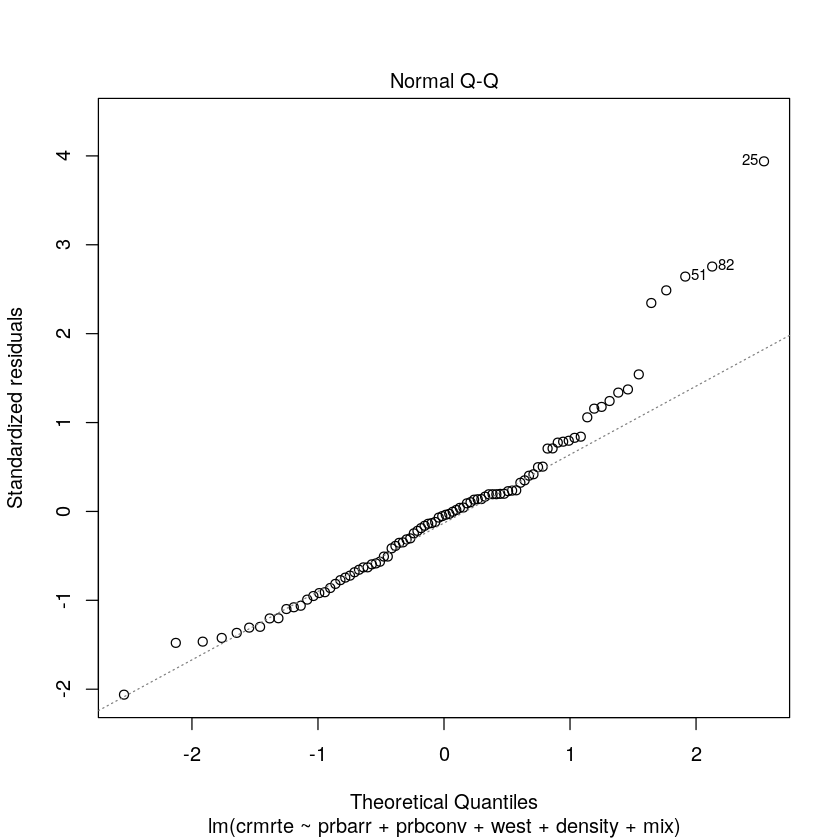

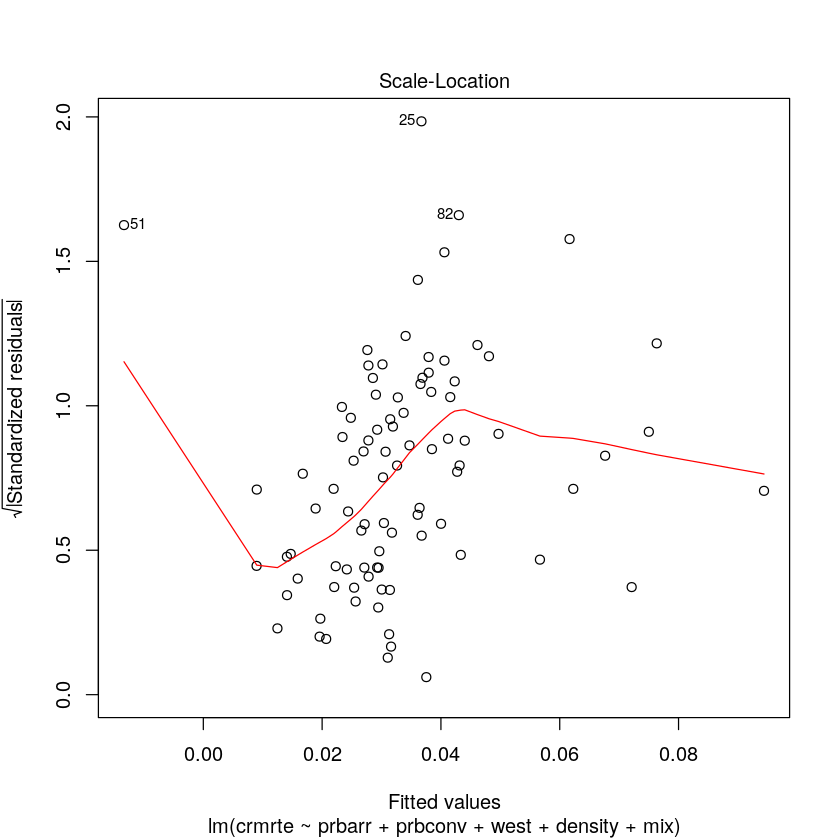

[1] "Covariance of prbarr with residuals: -2.0723606828724e-20"

[1] "Covariance of prbconv with residuals: 1.22905432369012e-19"

[1] "Covariance of west with residuals: 9.57504126302101e-20"

[1] "Covariance of density with residuals: 1.70391979043853e-18"

[1] "Covariance of mix with residuals: 1.94297104674074e-20"

 lag Autocorrelation D-W Statistic p-value
   1      -0.2263322      2.445446    0.04
 Alternative hypothesis: rho != 0

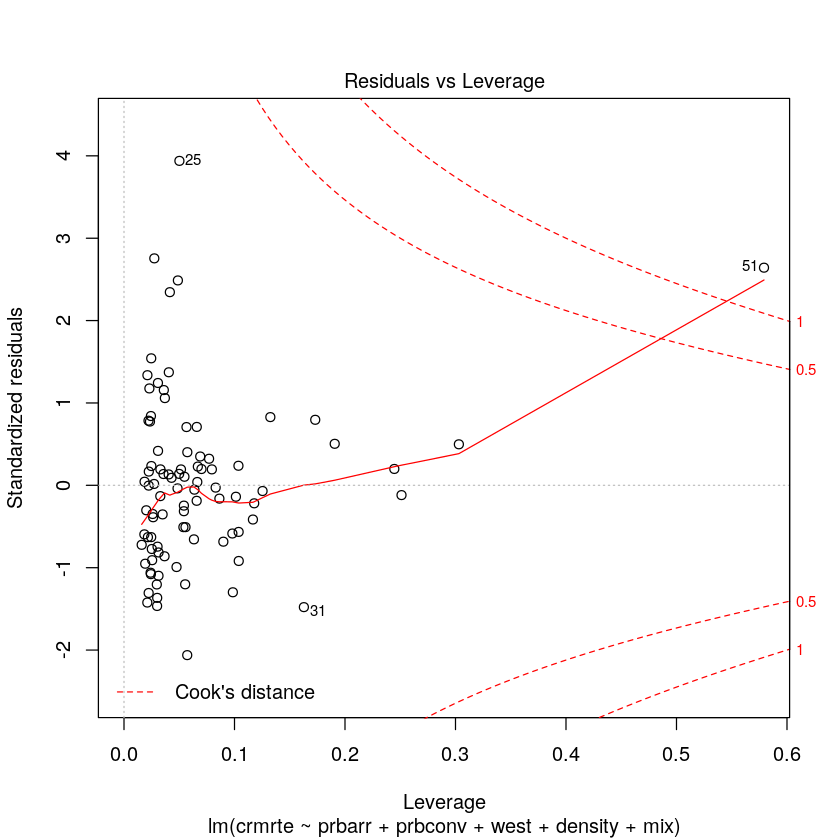

In [59]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', 'west', and 'mix'
# This model doesn't hold for zero-conditional mean; however, prbarr, prbconv, west, and density are exogenous, so it's consistent
# The DWT
probs <- lm(crmrte ~ prbarr + prbconv + west + density + mix, data=clean)
probs$coefficients
summary(probs)

plot(probs)

paste("Covariance of prbarr with residuals:", (cov(clean$prbarr, resid(probs))))
paste("Covariance of prbconv with residuals:", (cov(clean$prbconv, resid(probs))))
paste("Covariance of west with residuals:", (cov(clean$west, resid(probs))))
paste("Covariance of density with residuals:", (cov(clean$density, resid(probs))))
paste("Covariance of mix with residuals:", (cov(clean$mix, resid(probs))))


dwt(probs)


(Intercept)      prbarr   prbarr_sq     prbconv 
 0.09202015 -0.19304542  0.14362140 -0.03036463


Call:
lm(formula = clean$crmrte ~ prbarr + prbarr_sq + prbconv, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.041045 -0.009019 -0.001811  0.007561  0.043096 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.092020   0.008339  11.035  < 2e-16 ***
prbarr      -0.193045   0.034296  -5.629 2.23e-07 ***
prbarr_sq    0.143621   0.034344   4.182 6.94e-05 ***
prbconv     -0.030365   0.004777  -6.356 9.54e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01441 on 86 degrees of freedom
Multiple R-squared:  0.4376,	Adjusted R-squared:  0.418 
F-statistic: 22.31 on 3 and 86 DF,  p-value: 8.939e-11


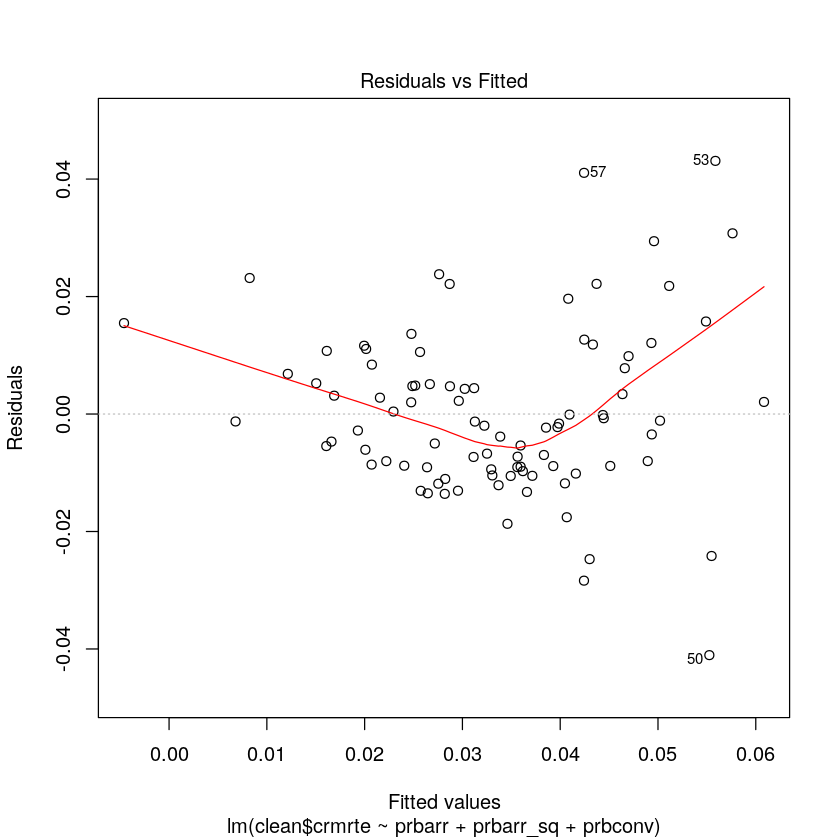

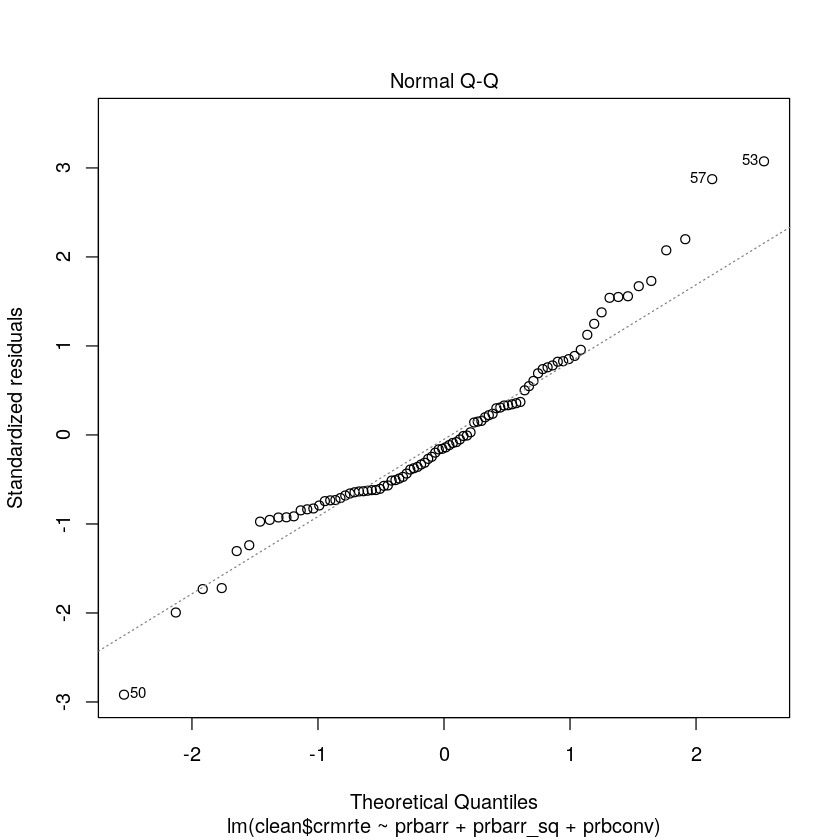

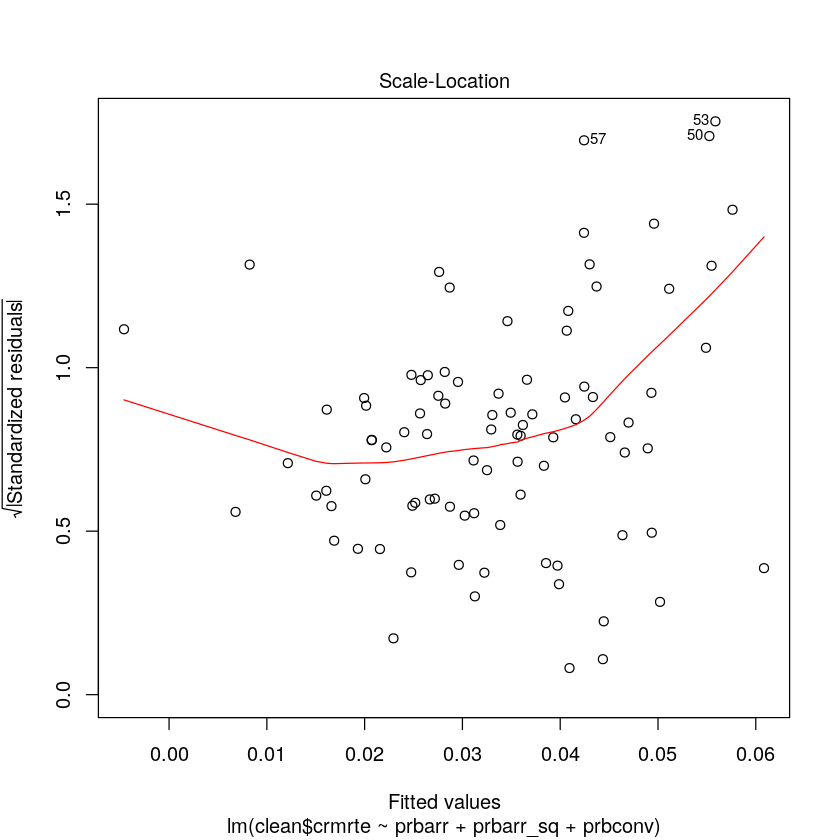

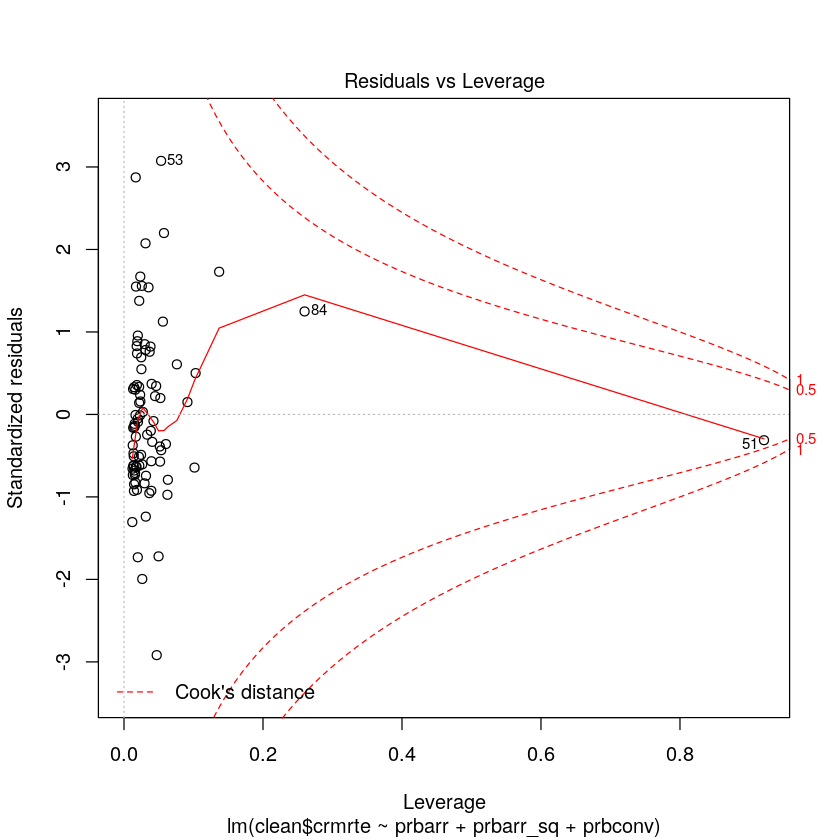

In [60]:
# Regression of 'crmrte' on 'prbarr', 'prbarr'^2, and 'prbconv'

prbarr_sq <- (clean$prbarr)^2
probs <- lm(clean$crmrte ~ prbarr + prbarr_sq + prbconv, data=clean)
probs$coefficients
summary(probs)

plot(probs)

(Intercept)      prbarr     prbconv  prbconv_sq 
 0.07119969 -0.05870400 -0.04818360  0.01446602


Call:
lm(formula = clean$crmrte ~ prbarr + prbconv + prbconv_sq, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.036519 -0.009672 -0.002210  0.007110  0.051527 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.071200   0.006929  10.276  < 2e-16 ***
prbarr      -0.058704   0.012005  -4.890 4.64e-06 ***
prbconv     -0.048184   0.015859  -3.038  0.00315 ** 
prbconv_sq   0.014466   0.008320   1.739  0.08567 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01554 on 86 degrees of freedom
Multiple R-squared:  0.3462,	Adjusted R-squared:  0.3234 
F-statistic: 15.18 on 3 and 86 DF,  p-value: 5.187e-08


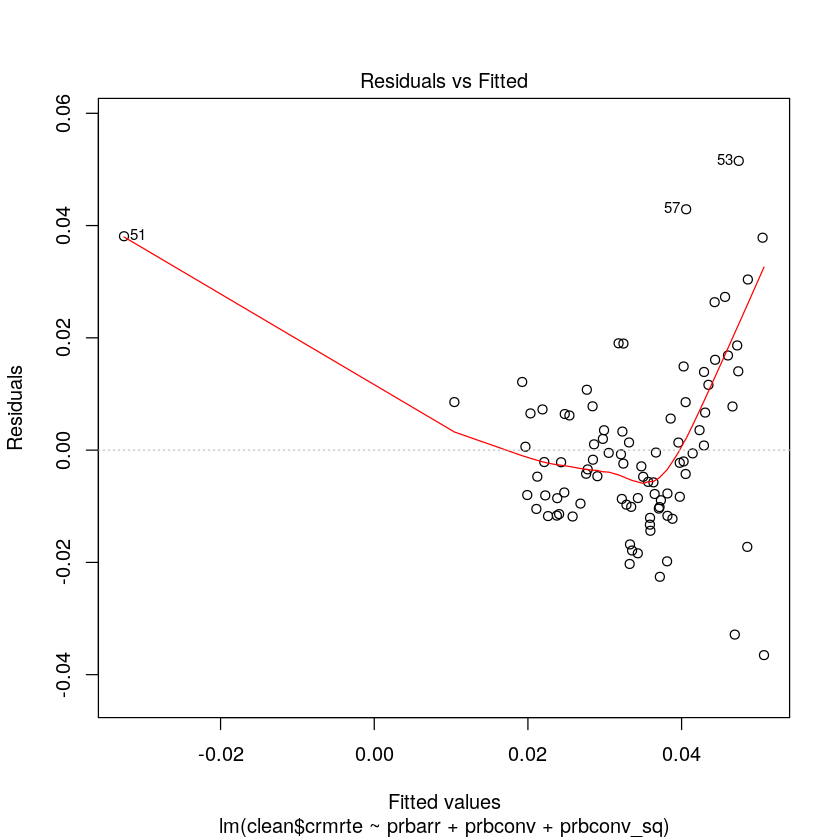

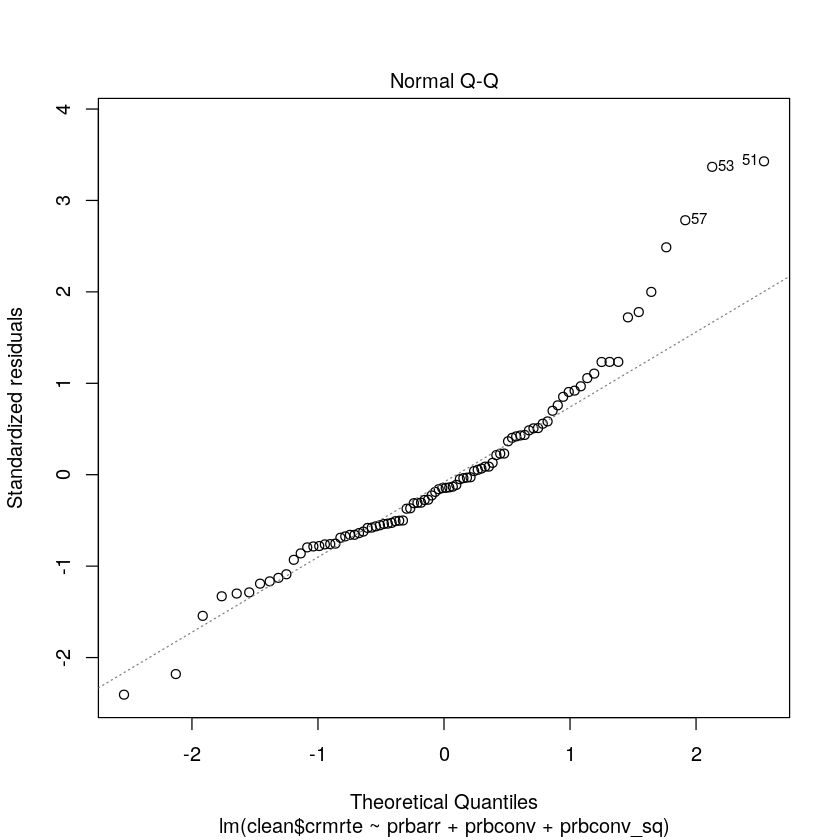

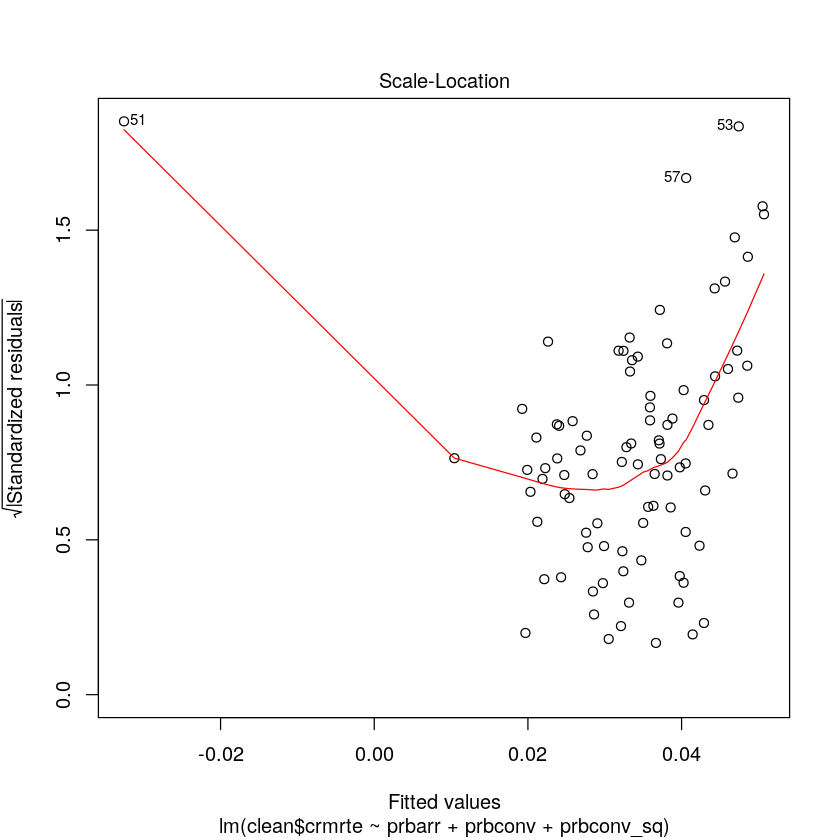

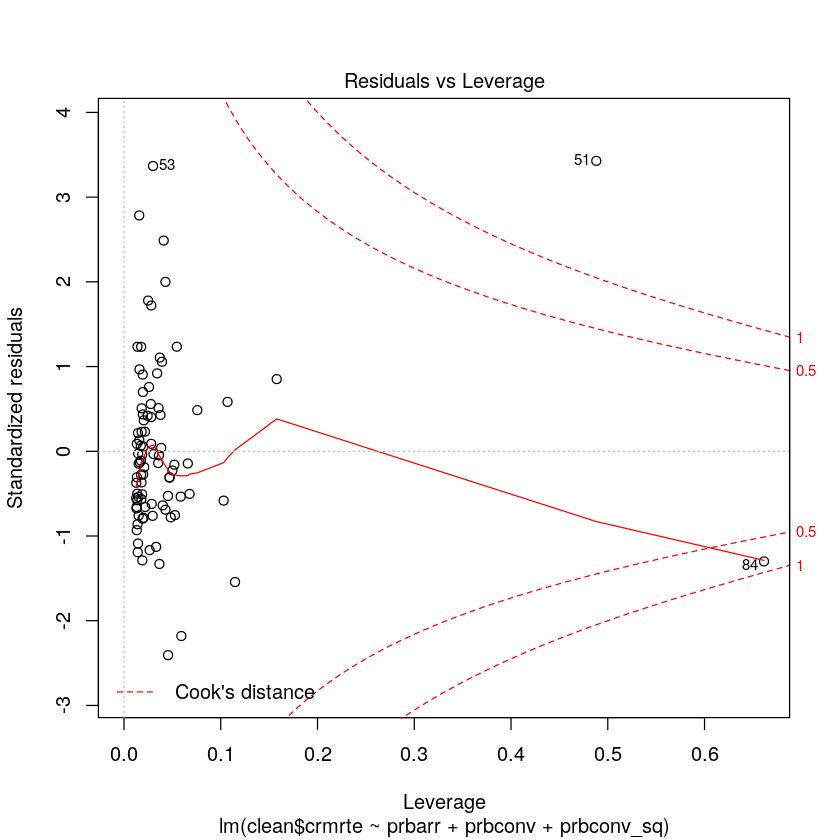

In [61]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', and 'prbconv'^2

prbconv_sq <- (clean$prbconv)^2
probs <- lm(clean$crmrte ~ prbarr + prbconv + prbconv_sq, data=clean)
probs$coefficients
summary(probs)

plot(probs)

(Intercept)      prbarr   prbarr_sq     prbconv  prbconv_sq 
 0.09990002 -0.19277184  0.14199427 -0.05506452  0.01360888


Call:
lm(formula = clean$crmrte ~ prbarr + prbarr_sq + prbconv + prbconv_sq, 
    data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.044140 -0.008523 -0.001345  0.008029  0.042156 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.099900   0.009343  10.692  < 2e-16 ***
prbarr      -0.192772   0.033868  -5.692 1.75e-07 ***
prbarr_sq    0.141994   0.033928   4.185 6.91e-05 ***
prbconv     -0.055065   0.014618  -3.767 0.000304 ***
prbconv_sq   0.013609   0.007623   1.785 0.077801 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01423 on 85 degrees of freedom
Multiple R-squared:  0.4579,	Adjusted R-squared:  0.4324 
F-statistic: 17.95 on 4 and 85 DF,  p-value: 1.019e-10


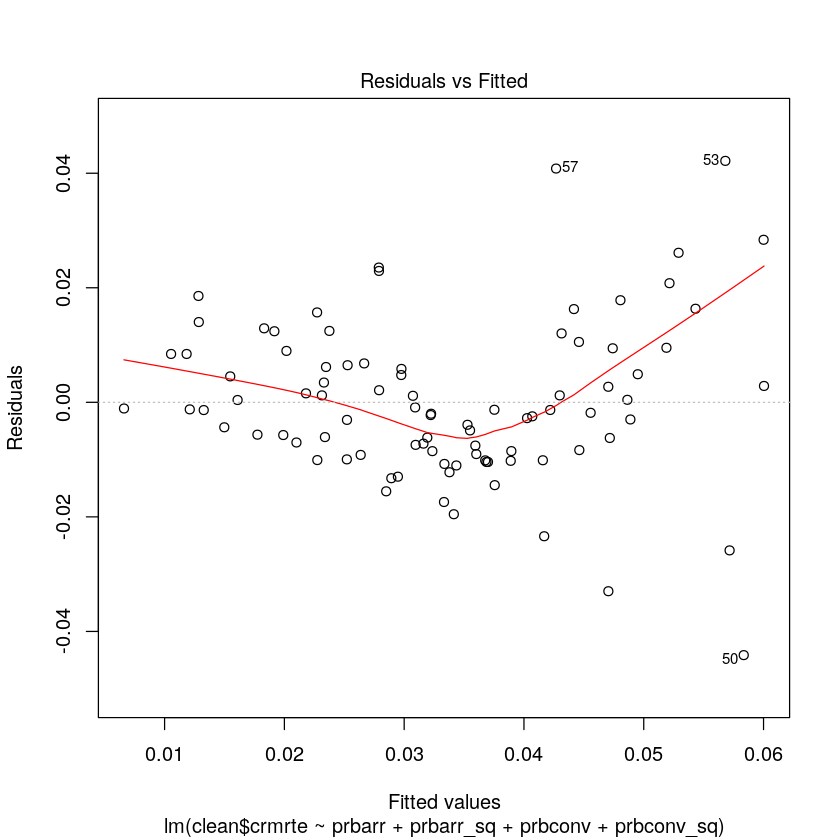

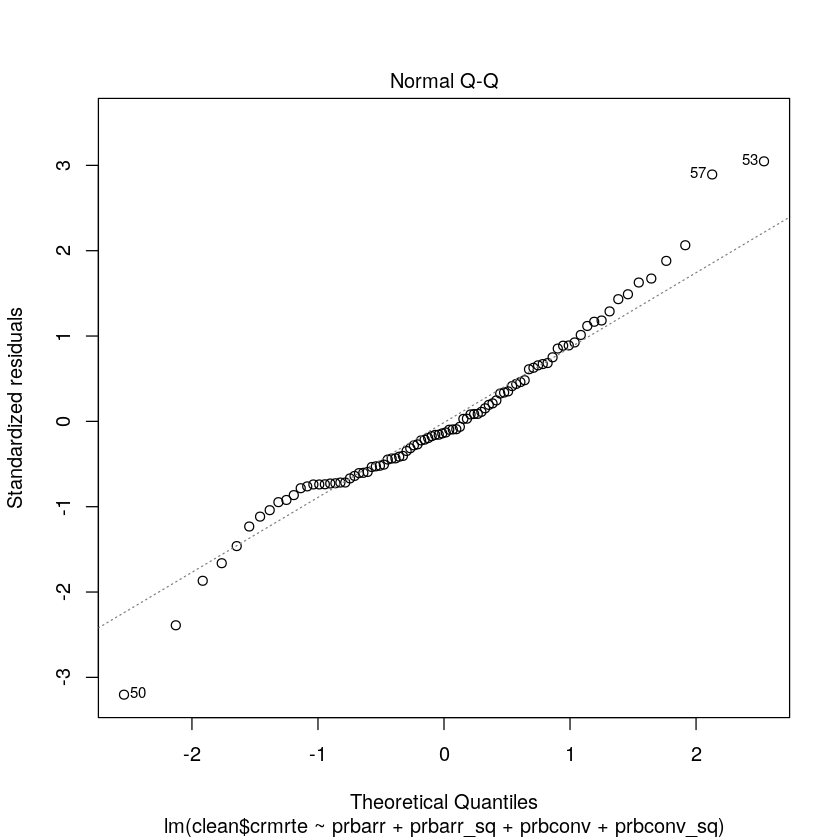

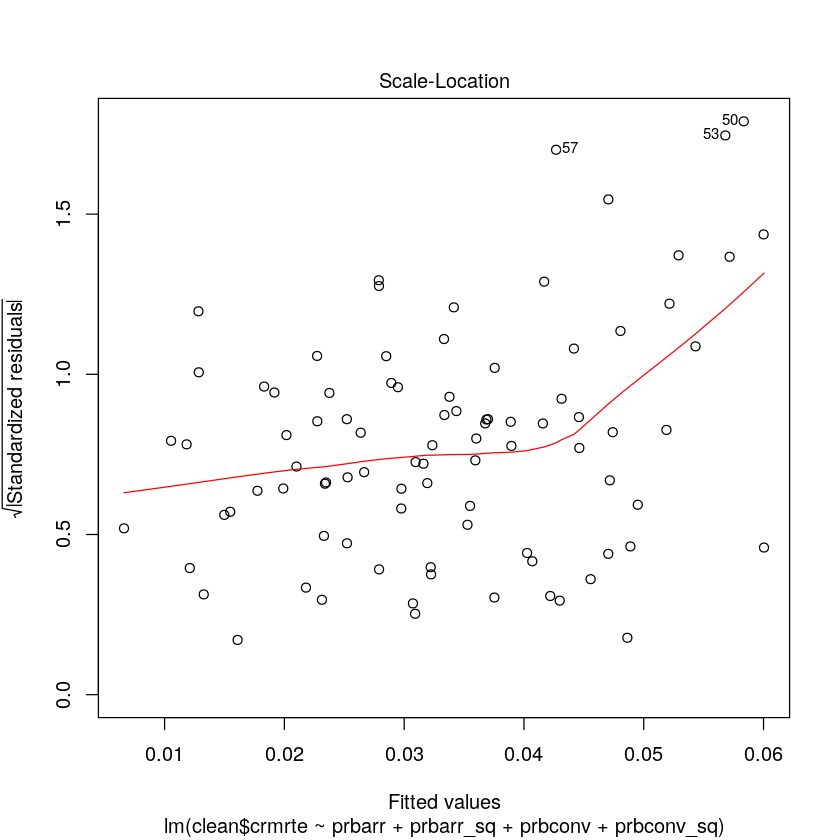

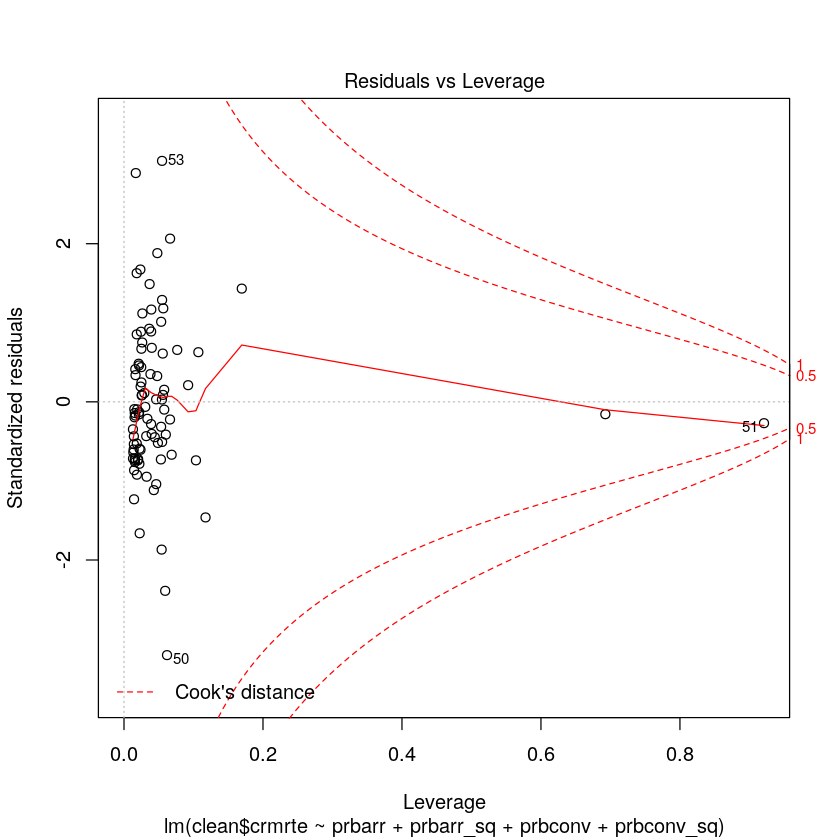

In [62]:
# Regression of 'crmrte' on 'prbarr', 'prbarr'^2, 'prbconv'^2, and 'prbconv'

prbarr_sq <- (clean$prbarr)^2
prbconv_sq <- (clean$prbconv)^2
probs <- lm(clean$crmrte ~ prbarr + prbarr_sq + prbconv + prbconv_sq, data=clean)
probs$coefficients
summary(probs)

plot(probs)

(Intercept)      prbarr     prbconv 
 -1.1070693  -0.8642215  -0.3193777


Call:
lm(formula = crmrte_log ~ prbarr + prbconv, data = clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51460 -0.11295  0.00854  0.13142  0.35887 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.10707    0.05502 -20.122  < 2e-16 ***
prbarr      -0.86422    0.13808  -6.259 1.42e-08 ***
prbconv     -0.31938    0.05367  -5.950 5.47e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1791 on 87 degrees of freedom
Multiple R-squared:  0.4481,	Adjusted R-squared:  0.4354 
F-statistic: 35.32 on 2 and 87 DF,  p-value: 5.892e-12


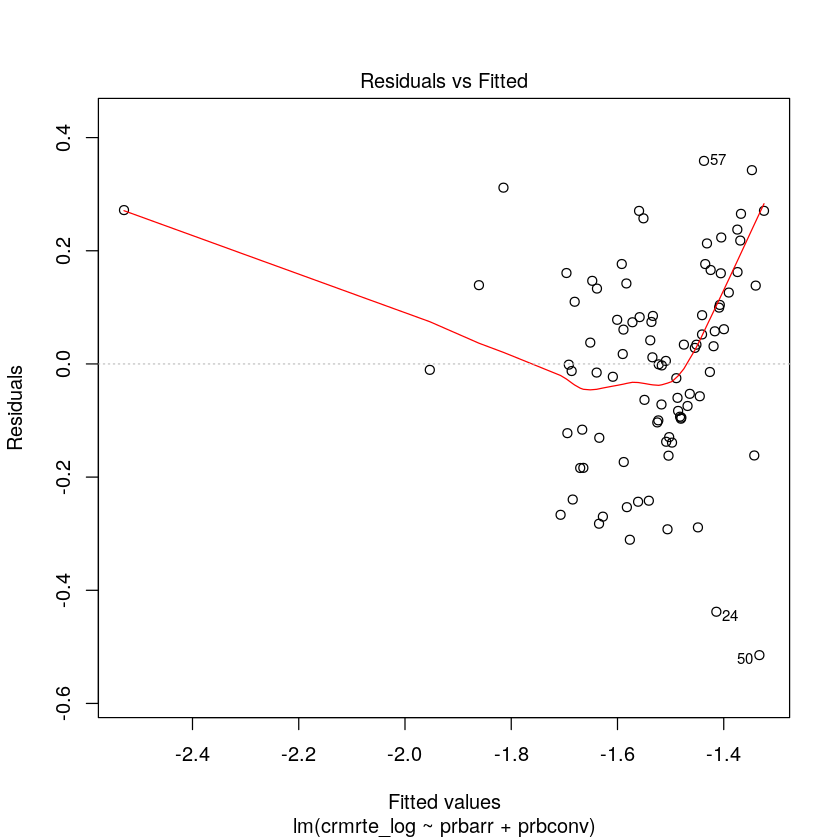

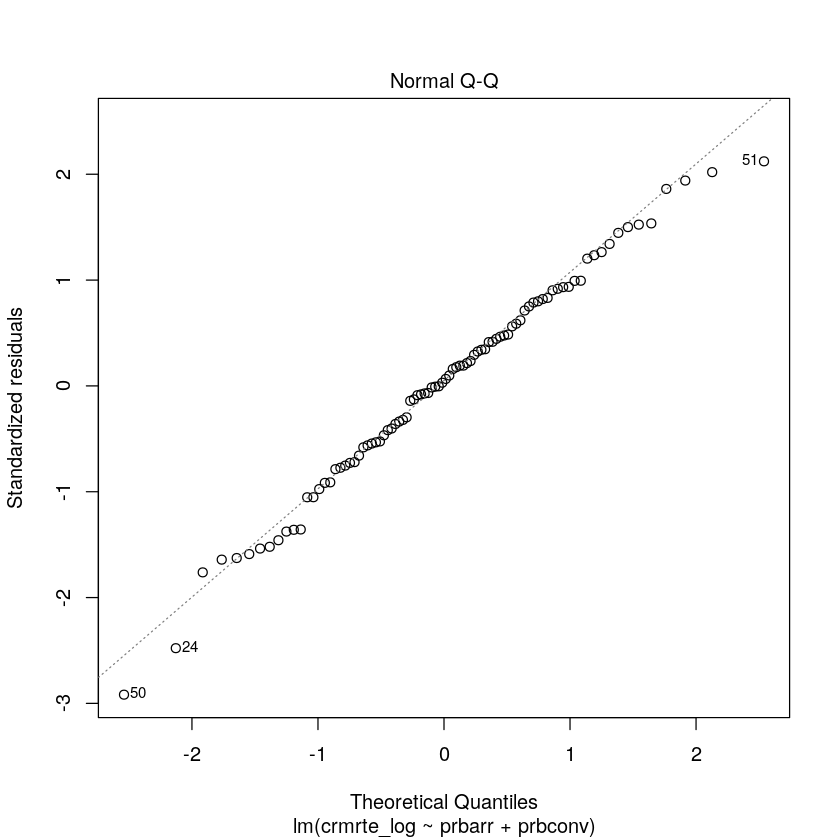

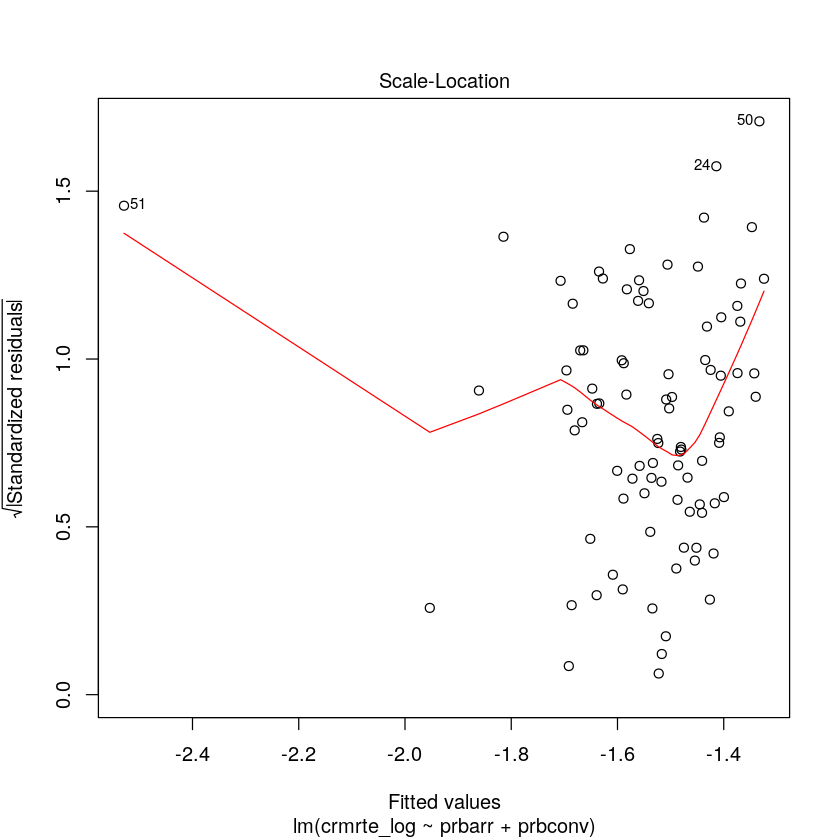

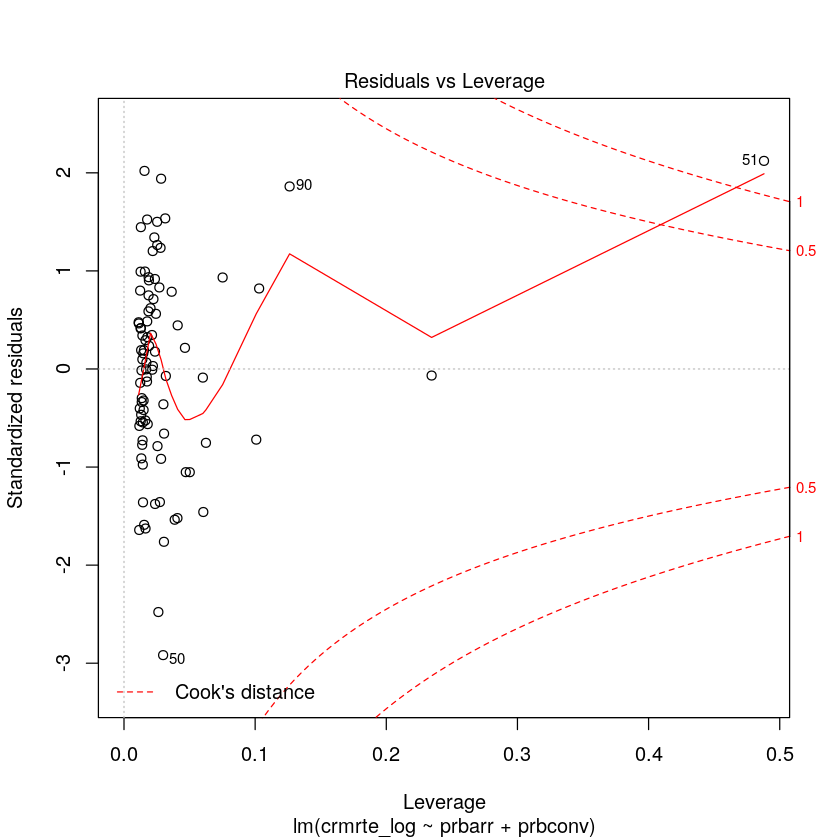

In [63]:
# Regression of log10'crmrte' on 'prbarr', and 'prbconv'

crmrte_log <- log10(clean$crmrte)

probs <- lm(crmrte_log ~ prbarr + prbconv, data=clean)
probs$coefficients
summary(probs)

plot(probs)

(Intercept)      prbarr prbconv_inv 
 0.04445081 -0.05921842  0.00262049


Call:
lm(formula = crmrte ~ prbarr + prbconv_inv, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.037099 -0.010650 -0.001733  0.007023  0.055810 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.044451   0.004693   9.471 4.88e-15 ***
prbarr      -0.059218   0.013188  -4.490 2.17e-05 ***
prbconv_inv  0.002620   0.001037   2.528   0.0133 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01694 on 87 degrees of freedom
Multiple R-squared:  0.214,	Adjusted R-squared:  0.1959 
F-statistic: 11.84 on 2 and 87 DF,  p-value: 2.825e-05


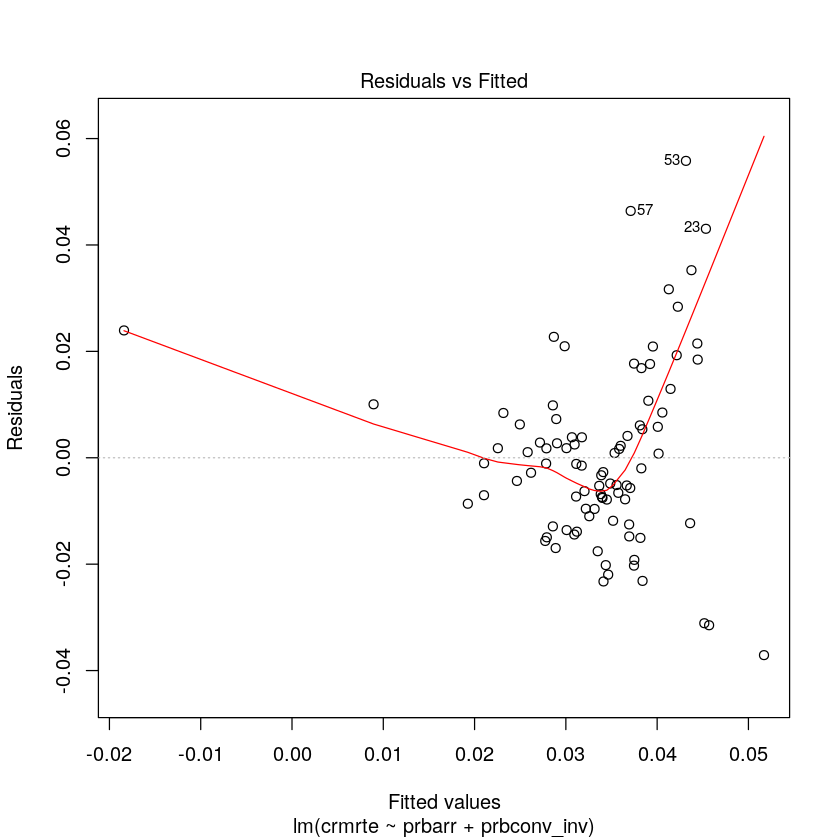

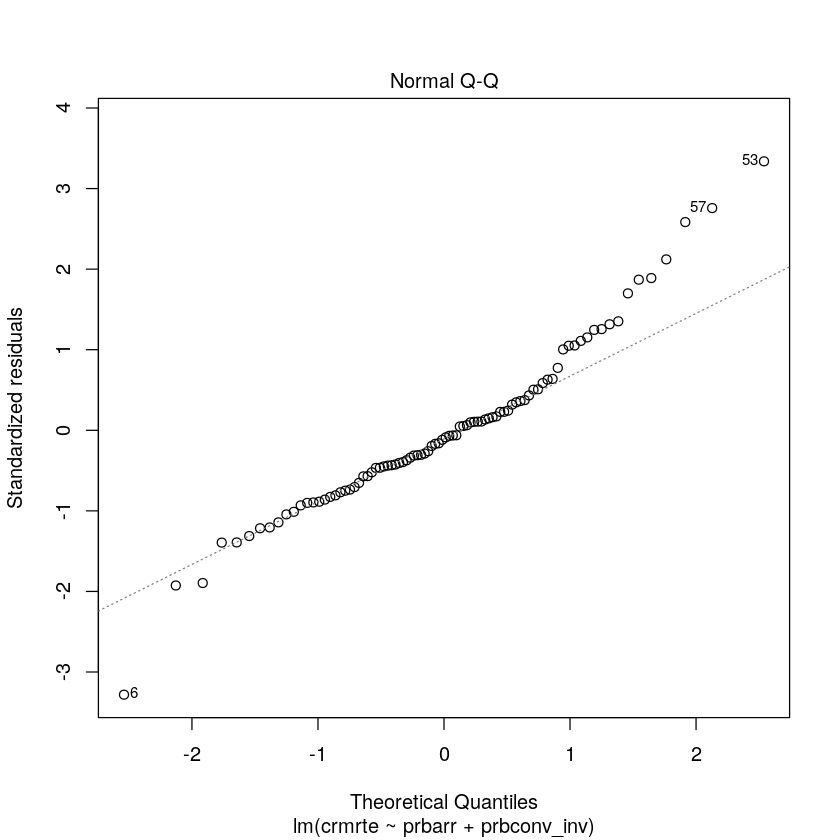

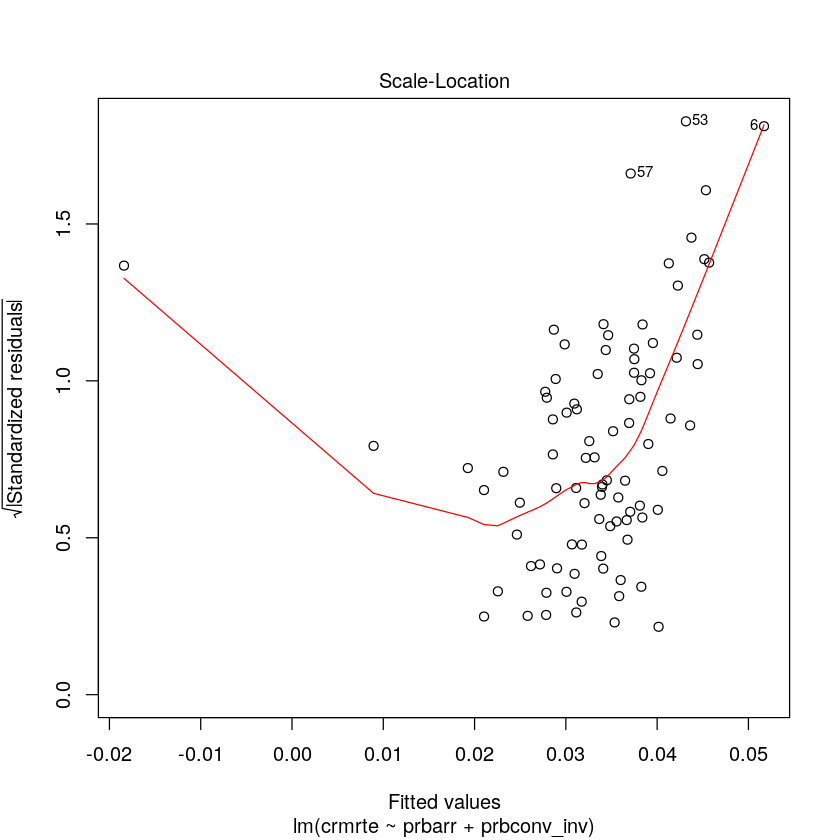

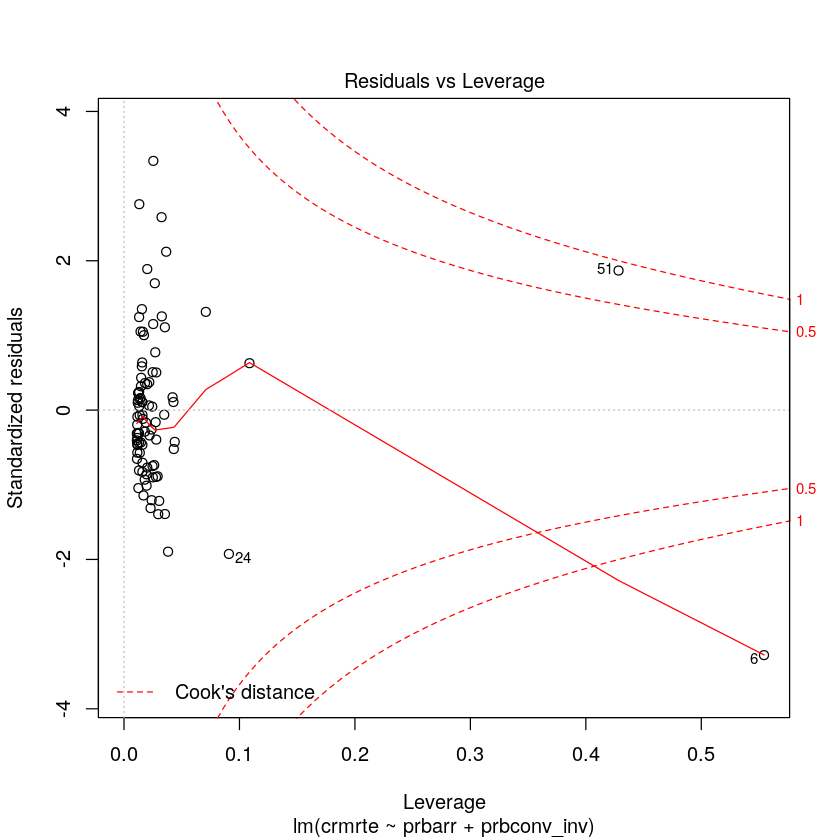

In [64]:
# Regression of log10'crmrte' on 'prbarr', and 'prbconv'

prbconv_inv <- 1/(clean$prbconv)

probs <- lm(crmrte ~ prbarr + prbconv_inv, data=clean)
probs$coefficients
summary(probs)

plot(probs)

In [65]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', and 'prbpris'
probs <- lm(clean$crmrte ~ clean$prbarr + clean$prbconv + clean$prbpris)
probs$coefficients
summary(probs)

(Intercept)  clean$prbarr clean$prbconv clean$prbpris 
   0.05572617   -0.05781994   -0.02187736    0.01681765


Call:
lm(formula = clean$crmrte ~ clean$prbarr + clean$prbconv + clean$prbpris)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034060 -0.009792 -0.002389  0.006432  0.051293 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.055726   0.009609   5.799 1.08e-07 ***
clean$prbarr  -0.057820   0.012155  -4.757 7.86e-06 ***
clean$prbconv -0.021877   0.004720  -4.635 1.26e-05 ***
clean$prbpris  0.016818   0.020713   0.812    0.419    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01575 on 86 degrees of freedom
Multiple R-squared:  0.3284,	Adjusted R-squared:  0.305 
F-statistic: 14.02 on 3 and 86 DF,  p-value: 1.61e-07


In [66]:
# Regression of 'crmrte' on 1/prbarr and 1/prbconv
inv_prbarr <- 1/clean$prbarr
inv_prbconv <- 1/clean$prbconv
inv_probs <- lm(clean$crmrte ~ inv_prbarr + inv_prbconv)
inv_probs$coefficients
summary(inv_probs)

(Intercept)  inv_prbarr inv_prbconv 
0.004471631 0.005440603 0.002950737


Call:
lm(formula = clean$crmrte ~ inv_prbarr + inv_prbconv)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.043389 -0.009759 -0.001723  0.006994  0.049519 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.004472   0.005882   0.760  0.44915    
inv_prbarr  0.005441   0.001126   4.833 5.73e-06 ***
inv_prbconv 0.002951   0.001032   2.859  0.00531 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01669 on 87 degrees of freedom
Multiple R-squared:  0.2368,	Adjusted R-squared:  0.2192 
F-statistic:  13.5 on 2 and 87 DF,  p-value: 7.859e-06


In [67]:
# Regression of 'crmrte' on 'prbarr' and 1/prbconv
probs <- lm(clean$crmrte ~ clean$prbarr + inv_prbconv)
probs$coefficients
summary(probs)

(Intercept) clean$prbarr  inv_prbconv 
  0.04445081  -0.05921842   0.00262049


Call:
lm(formula = clean$crmrte ~ clean$prbarr + inv_prbconv)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.037099 -0.010650 -0.001733  0.007023  0.055810 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.044451   0.004693   9.471 4.88e-15 ***
clean$prbarr -0.059218   0.013188  -4.490 2.17e-05 ***
inv_prbconv   0.002620   0.001037   2.528   0.0133 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01694 on 87 degrees of freedom
Multiple R-squared:  0.214,	Adjusted R-squared:  0.1959 
F-statistic: 11.84 on 2 and 87 DF,  p-value: 2.825e-05


## _polpc_ and Its Effects on _crmrte_ in Conjunction with _prbarr_ and _prbconv_

In [68]:
# Regression of 'crmrte' on 'prbconv' + 'polpc'
probs <- lm(clean$crmrte ~ prbconv + polpc, data=clean)
probs$coefficients
summary(probs)

(Intercept)     prbconv       polpc 
 0.03822595 -0.02278729  4.58824722


Call:
lm(formula = clean$crmrte ~ prbconv + polpc, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040055 -0.009631 -0.002395  0.008824  0.058427 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.038226   0.004269   8.954 5.59e-14 ***
prbconv     -0.022787   0.005174  -4.404 3.01e-05 ***
polpc        4.588247   1.849276   2.481    0.015 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01703 on 87 degrees of freedom
Multiple R-squared:  0.2052,	Adjusted R-squared:  0.1869 
F-statistic: 11.23 on 2 and 87 DF,  p-value: 4.582e-05


In [69]:
# Regression of 'crmrte' on 'prbarr' + 'polpc'
probs <- lm(clean$crmrte ~ prbarr + polpc, data=clean)
probs$coefficients
summary(probs)

(Intercept)      prbarr       polpc 
 0.04324555 -0.07819062  7.81580282


Call:
lm(formula = clean$crmrte ~ prbarr + polpc, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030953 -0.011414 -0.000508  0.008453  0.049938 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.043246   0.004301  10.055 3.13e-16 ***
prbarr      -0.078191   0.013661  -5.724 1.45e-07 ***
polpc        7.815803   1.897914   4.118 8.67e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01605 on 87 degrees of freedom
Multiple R-squared:  0.2939,	Adjusted R-squared:  0.2777 
F-statistic: 18.11 on 2 and 87 DF,  p-value: 2.667e-07


(Intercept)      prbarr     prbconv       polpc 
 0.05762202 -0.08930088 -0.02740142 10.15662726


Call:
lm(formula = clean$crmrte ~ prbarr + prbconv + polpc, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.036712 -0.007655 -0.001637  0.006641  0.041525 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.057622   0.004053  14.218  < 2e-16 ***
prbarr      -0.089301   0.011149  -8.010 5.06e-12 ***
prbconv     -0.027401   0.003980  -6.885 8.94e-10 ***
polpc       10.156627   1.569971   6.469 5.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01296 on 86 degrees of freedom
Multiple R-squared:  0.5448,	Adjusted R-squared:  0.5289 
F-statistic: 34.31 on 3 and 86 DF,  p-value: 1.118e-14


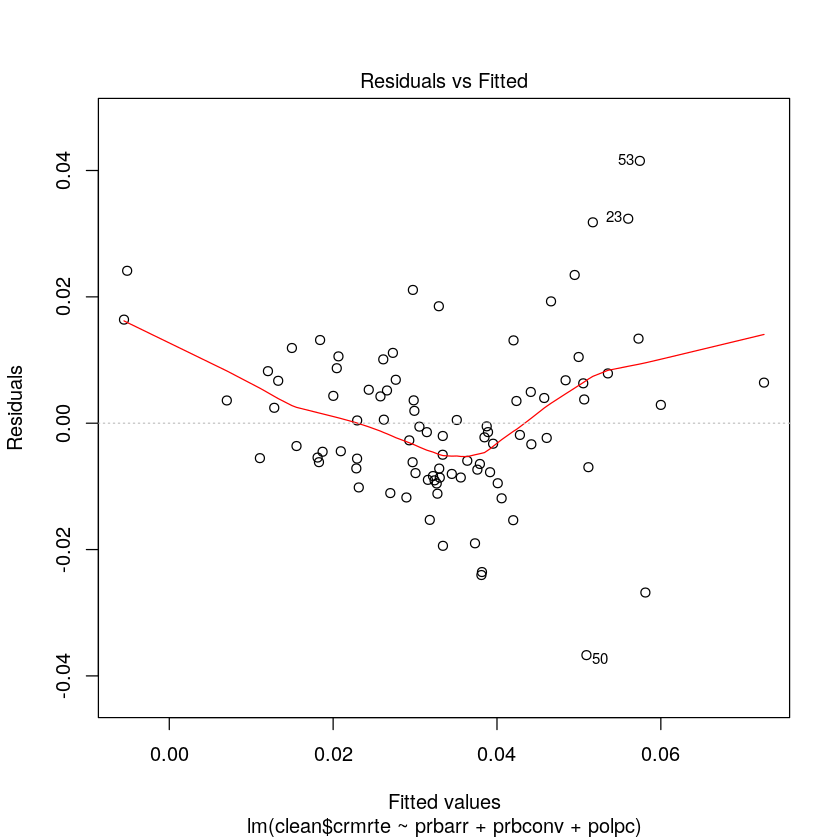

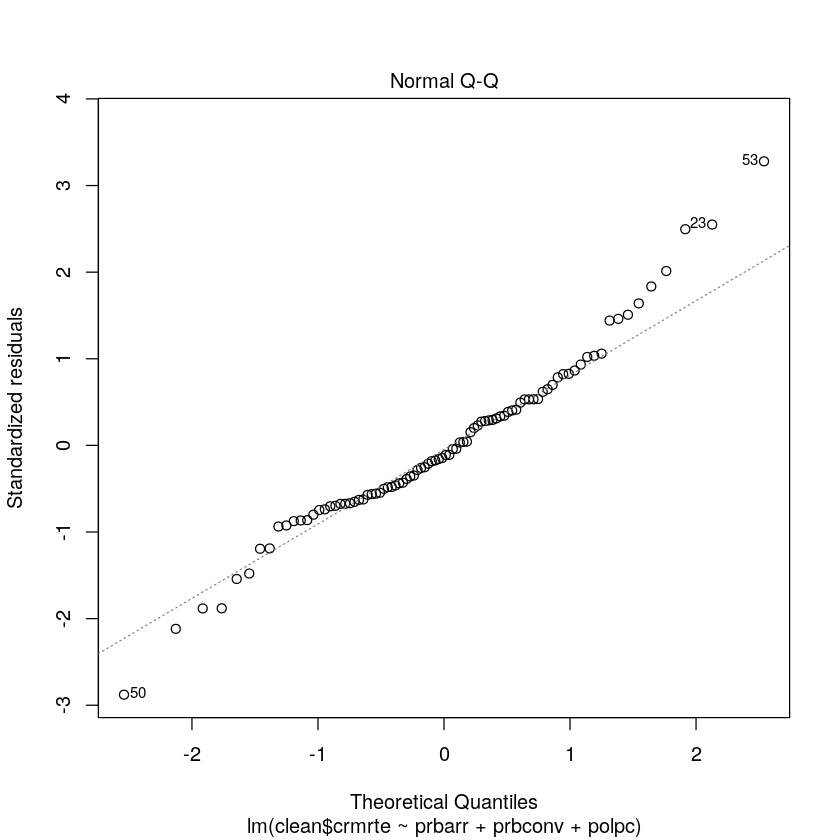

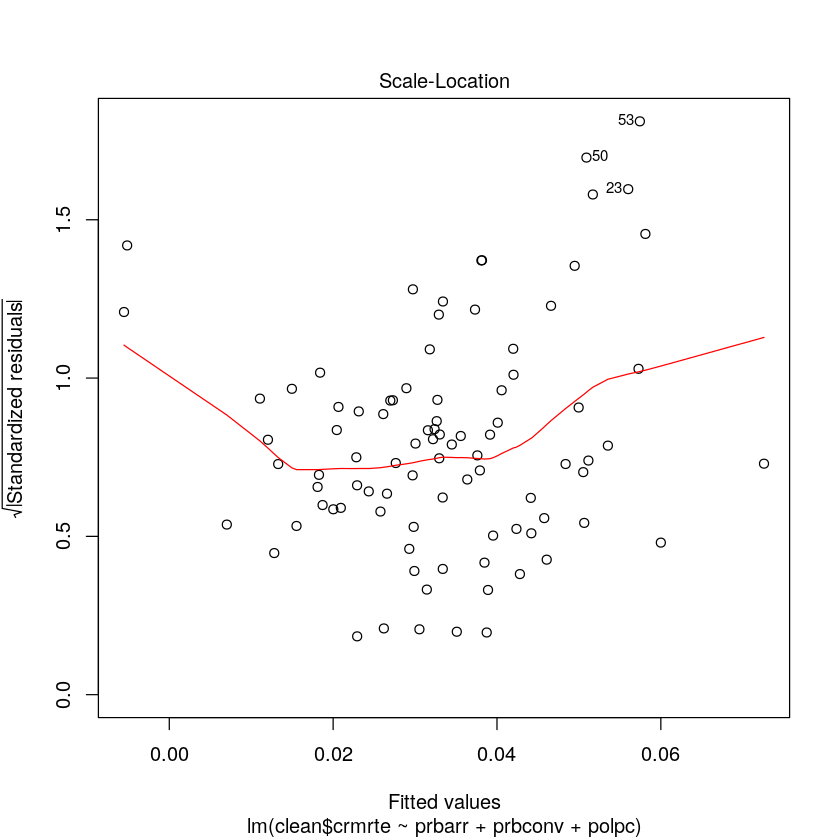

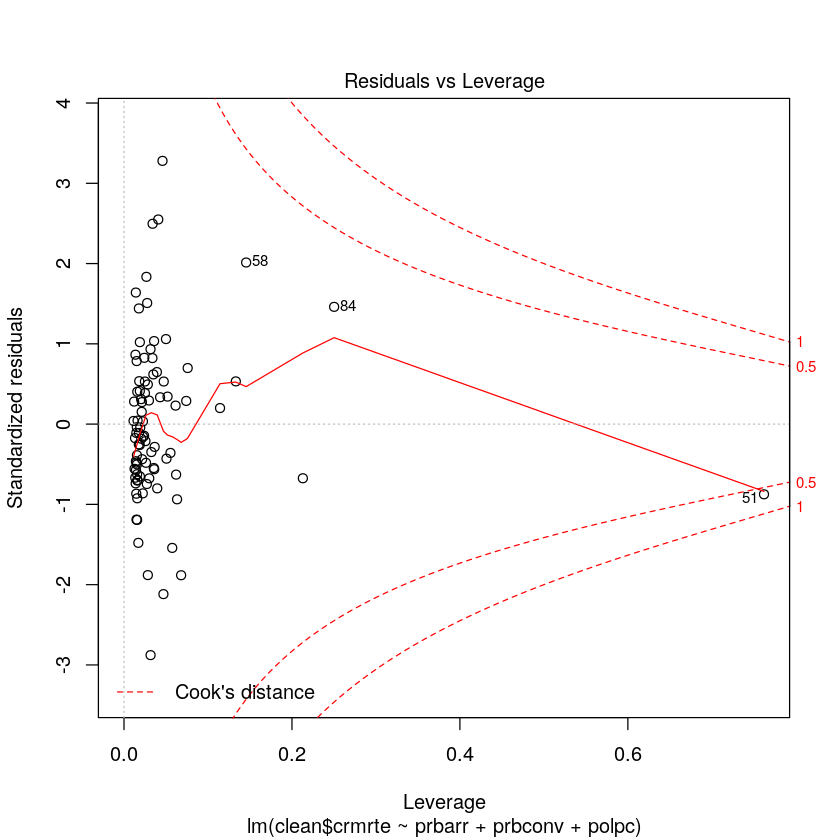

In [70]:
# Regression of 'crmrte' on 'prbarr' + 'prbconv' + 'polpc'
probs <- lm(clean$crmrte ~ prbarr + prbconv + polpc, data=clean)
probs$coefficients
summary(probs)

plot(probs)

## _density_,  _urban_, and _wfed_

In [71]:
# Regression of 'crmrte' on 'density'
probs <- lm(clean$crmrte ~ clean$density)
probs$coefficients
summary(probs)

(Intercept) clean$density 
  0.020529697   0.009041231


Call:
lm(formula = clean$crmrte ~ clean$density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.018485 -0.009495 -0.002767  0.004877  0.053862 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0205297  0.0018911  10.856  < 2e-16 ***
clean$density 0.0090412  0.0009067   9.972  4.1e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01301 on 88 degrees of freedom
Multiple R-squared:  0.5305,	Adjusted R-squared:  0.5252 
F-statistic: 99.44 on 1 and 88 DF,  p-value: 4.101e-16


In [72]:
# Regression of 'crmrte' on 'urban'
probs <- lm(clean$crmrte ~ clean$urban)
probs$coefficients
summary(probs)

(Intercept) clean$urban 
 0.02990170  0.04059258


Call:
lm(formula = clean$crmrte ~ clean$urban)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026759 -0.010699 -0.001371  0.006329  0.049115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.029902   0.001654  18.080  < 2e-16 ***
clean$urban 0.040593   0.005547   7.318 1.12e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01498 on 88 degrees of freedom
Multiple R-squared:  0.3783,	Adjusted R-squared:  0.3712 
F-statistic: 53.55 on 1 and 88 DF,  p-value: 1.121e-10


In [73]:
# Regression of 'crmrte' on 'density' and 'urban'
probs <- lm(clean$crmrte ~ clean$density + clean$urban)
probs$coefficients
summary(probs)

(Intercept) clean$density   clean$urban 
  0.021003848   0.008489488   0.003577173


Call:
lm(formula = clean$crmrte ~ clean$density + clean$urban)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.018746 -0.009265 -0.003080  0.004746  0.053670 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.021004   0.002206   9.519 3.88e-15 ***
clean$density 0.008489   0.001592   5.333 7.53e-07 ***
clean$urban   0.003577   0.008463   0.423    0.674    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01308 on 87 degrees of freedom
Multiple R-squared:  0.5315,	Adjusted R-squared:  0.5207 
F-statistic: 49.35 on 2 and 87 DF,  p-value: 4.747e-15


In [74]:
# Regression of 'crmrte' on 'density' and 'wfed'
probs <- lm(crmrte ~ density + wfed, data=clean)
probs$coefficients
summary(probs)

(Intercept)      density         wfed 
8.487959e-03 8.358629e-03 2.941973e-05


Call:
lm(formula = crmrte ~ density + wfed, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.019189 -0.008558 -0.003298  0.005116  0.056282 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.488e-03  1.180e-02   0.719    0.474    
density     8.359e-03  1.121e-03   7.454 6.28e-11 ***
wfed        2.942e-05  2.846e-05   1.034    0.304    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01301 on 87 degrees of freedom
Multiple R-squared:  0.5362,	Adjusted R-squared:  0.5256 
F-statistic: 50.29 on 2 and 87 DF,  p-value: 3.052e-15


In [75]:
# Regression of 'crmrte' on 'urban' and 'wfed'
probs <- lm(crmrte ~ urban + wfed, data=clean)
probs$coefficients
summary(probs)

(Intercept)         urban          wfed 
-8.225341e-03  3.276448e-02  8.771173e-05


Call:
lm(formula = crmrte ~ urban + wfed, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025028 -0.008353 -0.003754  0.004398  0.057515 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.225e-03  1.223e-02  -0.673  0.50291    
urban        3.276e-02  5.843e-03   5.607 2.39e-07 ***
wfed         8.771e-05  2.789e-05   3.144  0.00228 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01427 on 87 degrees of freedom
Multiple R-squared:  0.4417,	Adjusted R-squared:  0.4289 
F-statistic: 34.42 on 2 and 87 DF,  p-value: 9.707e-12


In [76]:
# Regression of 'crmrte' on 'density', 'urban', and 'wfed'
probs <- lm(crmrte ~ density + urban + wfed, data=clean)
probs$coefficients
summary(probs)

(Intercept)      density        urban         wfed 
8.310538e-03 7.585239e-03 4.719099e-03 3.138142e-05


Call:
lm(formula = crmrte ~ density + urban + wfed, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.019581 -0.008411 -0.003718  0.005150  0.056190 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.311e-03  1.185e-02   0.701    0.485    
density     7.585e-03  1.793e-03   4.229 5.83e-05 ***
urban       4.719e-03  8.519e-03   0.554    0.581    
wfed        3.138e-05  2.879e-05   1.090    0.279    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01306 on 86 degrees of freedom
Multiple R-squared:  0.5379,	Adjusted R-squared:  0.5217 
F-statistic: 33.36 on 3 and 86 DF,  p-value: 2.125e-14


## _density_, _prbarr_, and _prbconv_

In [77]:
# Regression of 'crmrte' on 'density' and 'prbarr'
probs <- lm(clean$crmrte ~ clean$density + clean$prbarr)
probs$coefficients
summary(probs)

(Intercept) clean$density  clean$prbarr 
  0.029361981   0.008318166  -0.026399758


Call:
lm(formula = clean$crmrte ~ clean$density + clean$prbarr)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.019327 -0.008212 -0.002420  0.005399  0.051330 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0293620  0.0038699   7.587 3.39e-11 ***
clean$density  0.0083182  0.0009218   9.024 4.02e-14 ***
clean$prbarr  -0.0263998  0.0101879  -2.591   0.0112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01261 on 87 degrees of freedom
Multiple R-squared:  0.5642,	Adjusted R-squared:  0.5541 
F-statistic: 56.31 on 2 and 87 DF,  p-value: < 2.2e-16


In [78]:
# Regression of 'crmrte' on 'density' and 'prbconv'
probs <- lm(clean$crmrte ~ clean$density + clean$prbconv)
probs$coefficients
summary(probs)

(Intercept) clean$density clean$prbconv 
   0.02830938    0.00838614   -0.01241544


Call:
lm(formula = clean$crmrte ~ clean$density + clean$prbconv)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.017981 -0.008054 -0.002397  0.005377  0.048998 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0283094  0.0029793   9.502 4.21e-15 ***
clean$density  0.0083861  0.0008835   9.492 4.40e-15 ***
clean$prbconv -0.0124154  0.0037952  -3.271  0.00154 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01235 on 87 degrees of freedom
Multiple R-squared:  0.5819,	Adjusted R-squared:  0.5723 
F-statistic: 60.55 on 2 and 87 DF,  p-value: < 2.2e-16


In [79]:
# Regression of 'crmrte' on 'density', 'prbarr' 'prbconv'
probs <- lm(clean$crmrte ~ density + prbarr + prbconv, data=clean)
probs$coefficients
summary(probs)

(Intercept)      density       prbarr      prbconv 
 0.039794527  0.007443552 -0.031337262 -0.014012886


Call:
lm(formula = clean$crmrte ~ density + prbarr + prbconv, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020203 -0.008022 -0.003255  0.004713  0.045366 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0397945  0.0044969   8.849 9.97e-14 ***
density      0.0074436  0.0008855   8.406 7.95e-13 ***
prbarr      -0.0313373  0.0095466  -3.283 0.001488 ** 
prbconv     -0.0140129  0.0036311  -3.859 0.000219 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01171 on 86 degrees of freedom
Multiple R-squared:  0.6285,	Adjusted R-squared:  0.6155 
F-statistic:  48.5 on 3 and 86 DF,  p-value: < 2.2e-16


## _density_, _prbarr_, _prbconv_, and _wfed_

In [80]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', and 'wfed'
probs <- lm(clean$crmrte ~ prbarr + prbconv + wfed, data=clean)
probs$coefficients
summary(probs)

(Intercept)        prbarr       prbconv          wfed 
 0.0028017728 -0.0458056457 -0.0202851067  0.0001251776


Call:
lm(formula = clean$crmrte ~ prbarr + prbconv + wfed, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.022099 -0.008978 -0.003124  0.003626  0.048296 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.802e-03  1.278e-02   0.219    0.827    
prbarr      -4.581e-02  1.100e-02  -4.164 7.41e-05 ***
prbconv     -2.029e-02  4.190e-03  -4.841 5.64e-06 ***
wfed         1.252e-04  2.527e-05   4.953 3.61e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01394 on 86 degrees of freedom
Multiple R-squared:  0.4735,	Adjusted R-squared:  0.4551 
F-statistic: 25.78 on 3 and 86 DF,  p-value: 5.459e-12


In [81]:
# Regression of 'crmrte' on 'density', 'prbarr', 'prbconv', and 'wfed'
probs <- lm(clean$crmrte ~ density + prbarr + prbconv + wfed, data=clean)
probs$coefficients
summary(probs)

(Intercept)       density        prbarr       prbconv          wfed 
 2.535047e-02  6.601804e-03 -3.098627e-02 -1.445733e-02  3.568246e-05


Call:
lm(formula = clean$crmrte ~ density + prbarr + prbconv + wfed, 
    data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.017375 -0.007415 -0.003250  0.005424  0.048161 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.535e-02  1.129e-02   2.246 0.027283 *  
density      6.602e-03  1.068e-03   6.183 2.12e-08 ***
prbarr      -3.099e-02  9.498e-03  -3.262 0.001592 ** 
prbconv     -1.446e-02  3.625e-03  -3.988 0.000141 ***
wfed         3.568e-05  2.560e-05   1.394 0.166962    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01165 on 85 degrees of freedom
Multiple R-squared:  0.6368,	Adjusted R-squared:  0.6197 
F-statistic: 37.26 on 4 and 85 DF,  p-value: < 2.2e-16


## Model 1

In [82]:
# Regression of 'crmrte' on 'prbarr' and 'prbconv'
probs00 <- lm(crmrte ~ prbarr + prbconv, data=clean)
probs00$coefficients
summary(probs00)
AIC(probs00)

(Intercept)      prbarr     prbconv 
 0.06246762 -0.05736077 -0.02182518


Call:
lm(formula = crmrte ~ prbarr + prbconv, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033134 -0.010811 -0.003115  0.006445  0.052641 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.062468   0.004828  12.938  < 2e-16 ***
prbarr      -0.057361   0.012118  -4.733 8.49e-06 ***
prbconv     -0.021825   0.004710  -4.633 1.25e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01571 on 87 degrees of freedom
Multiple R-squared:  0.3232,	Adjusted R-squared:  0.3077 
F-statistic: 20.78 on 2 and 87 DF,  p-value: 4.204e-08


[1] -487.2082

In [83]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', and 'polpc'
probs10 <- lm(crmrte ~ prbarr + prbconv + polpc, data=clean)
probs10$coefficients
summary(probs10)
AIC(probs10)

(Intercept)      prbarr     prbconv       polpc 
 0.05762202 -0.08930088 -0.02740142 10.15662726


Call:
lm(formula = crmrte ~ prbarr + prbconv + polpc, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.036712 -0.007655 -0.001637  0.006641  0.041525 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.057622   0.004053  14.218  < 2e-16 ***
prbarr      -0.089301   0.011149  -8.010 5.06e-12 ***
prbconv     -0.027401   0.003980  -6.885 8.94e-10 ***
polpc       10.156627   1.569971   6.469 5.77e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01296 on 86 degrees of freedom
Multiple R-squared:  0.5448,	Adjusted R-squared:  0.5289 
F-statistic: 34.31 on 3 and 86 DF,  p-value: 1.118e-14


[1] -520.8955

## Model 2.1

In [84]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', 'polpc', 'west', 'taxpc', and 'density'
probs21 <- lm(crmrte ~ prbarr + prbconv + polpc + west + taxpc + density, data=clean)
probs21$coefficients
summary(probs21)
AIC(probs21)

(Intercept)        prbarr       prbconv         polpc          west 
 0.0386964186 -0.0514567715 -0.0184690215  6.3563657705 -0.0105866949 
        taxpc       density 
 0.0001135914  0.0052769297


Call:
lm(formula = crmrte ~ prbarr + prbconv + polpc + west + taxpc + 
    density, data = clean)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0221178 -0.0068795 -0.0003677  0.0049948  0.0275686 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.870e-02  5.076e-03   7.623 3.64e-11 ***
prbarr      -5.146e-02  9.527e-03  -5.401 6.19e-07 ***
prbconv     -1.847e-02  3.166e-03  -5.834 1.01e-07 ***
polpc        6.356e+00  1.366e+00   4.652 1.23e-05 ***
west        -1.059e-02  2.431e-03  -4.356 3.77e-05 ***
taxpc        1.136e-04  8.825e-05   1.287    0.202    
density      5.277e-03  7.939e-04   6.647 2.94e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009451 on 83 degrees of freedom
Multiple R-squared:  0.7665,	Adjusted R-squared:  0.7496 
F-statistic:  45.4 on 6 and 83 DF,  p-value: < 2.2e-16


[1] -574.9657

## Model 2.2

In [85]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', 'polpc', 'west', and 'taxpc'
probs22 <- lm(crmrte ~ prbarr + prbconv + polpc + west + taxpc, data=clean)
probs22$coefficients
summary(probs22)
AIC(probs22)

(Intercept)        prbarr       prbconv         polpc          west 
 0.0507783063 -0.0783146449 -0.0253713129  9.5535053026 -0.0121520945 
        taxpc 
 0.0001698719


Call:
lm(formula = crmrte ~ prbarr + prbconv + polpc + west + taxpc, 
    data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028687 -0.008547 -0.000576  0.006104  0.034516 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0507783  0.0058319   8.707 2.31e-13 ***
prbarr      -0.0783146  0.0106168  -7.376 1.06e-10 ***
prbconv     -0.0253713  0.0036801  -6.894 9.37e-10 ***
polpc        9.5535053  1.5735471   6.071 3.54e-08 ***
west        -0.0121521  0.0029767  -4.082 0.000101 ***
taxpc        0.0001699  0.0001081   1.572 0.119824    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01163 on 84 degrees of freedom
Multiple R-squared:  0.6421,	Adjusted R-squared:  0.6208 
F-statistic: 30.15 on 5 and 84 DF,  p-value: < 2.2e-16


[1] -538.5526

In [86]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', 'polpc', 'taxpc', and 'density'
probs23 <- lm(crmrte ~ prbarr + prbconv + polpc + taxpc + density, data=clean)
probs23$coefficients
summary(probs23)
AIC(probs23)

(Intercept)        prbarr       prbconv         polpc         taxpc 
 0.0343006216 -0.0516840069 -0.0178733400  5.2677959959  0.0001902444 
      density 
 0.0056119503


Call:
lm(formula = crmrte ~ prbarr + prbconv + polpc + taxpc + density, 
    data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025125 -0.006830 -0.001476  0.006261  0.031043 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.430e-02  5.481e-03   6.258 1.57e-08 ***
prbarr      -5.168e-02  1.050e-02  -4.924 4.19e-06 ***
prbconv     -1.787e-02  3.485e-03  -5.129 1.84e-06 ***
polpc        5.268e+00  1.480e+00   3.559 0.000614 ***
taxpc        1.902e-04  9.528e-05   1.997 0.049108 *  
density      5.612e-03  8.705e-04   6.446 6.88e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01041 on 84 degrees of freedom
Multiple R-squared:  0.7131,	Adjusted R-squared:  0.696 
F-statistic: 41.75 on 5 and 84 DF,  p-value: < 2.2e-16


[1] -558.4386

In [87]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', 'polpc', 'west', and 'density'
probs24 <- lm(crmrte ~ prbarr + prbconv + polpc + west + density, data=clean)
probs24$coefficients
summary(probs24)
AIC(probs24)

(Intercept)       prbarr      prbconv        polpc         west      density 
 0.043218939 -0.054416867 -0.019255994  7.018815548 -0.011210514  0.005374954


Call:
lm(formula = crmrte ~ prbarr + prbconv + polpc + west + density, 
    data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020705 -0.006927 -0.000528  0.005140  0.025691 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0432189  0.0036776  11.752  < 2e-16 ***
prbarr      -0.0544169  0.0092816  -5.863 8.68e-08 ***
prbconv     -0.0192560  0.0031183  -6.175 2.26e-08 ***
polpc        7.0188155  1.2705350   5.524 3.63e-07 ***
west        -0.0112105  0.0023910  -4.689 1.05e-05 ***
density      0.0053750  0.0007933   6.776 1.59e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009488 on 84 degrees of freedom
Multiple R-squared:  0.7618,	Adjusted R-squared:  0.7476 
F-statistic: 53.73 on 5 and 84 DF,  p-value: < 2.2e-16


[1] -575.1871

In [88]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', 'polpc', 'and 'density'
probs25 <- lm(crmrte ~ prbarr + prbconv + polpc + density, data=clean)
probs25$coefficients
summary(probs25)
AIC(probs25)

(Intercept)       prbarr      prbconv        polpc      density 
 0.041736878 -0.056870263 -0.019184731  6.311341762  0.005817353


Call:
lm(formula = crmrte ~ prbarr + prbconv + polpc + density, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.025251 -0.006977 -0.002817  0.006798  0.028126 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0417369  0.0040913  10.201  < 2e-16 ***
prbarr      -0.0568703  0.0103476  -5.496 3.99e-07 ***
prbconv     -0.0191847  0.0034820  -5.510 3.77e-07 ***
polpc        6.3113418  1.4086732   4.480 2.31e-05 ***
density      0.0058174  0.0008795   6.614 3.14e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01059 on 85 degrees of freedom
Multiple R-squared:  0.6995,	Adjusted R-squared:  0.6853 
F-statistic: 49.46 on 4 and 85 DF,  p-value: < 2.2e-16


[1] -556.2657

In [89]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', 'polpc', 'west', 'taxpc', 
# 'density'
probs30 <- lm(crmrte ~ prbarr + prbconv + polpc + west + taxpc + density +
              central + urban + pctmin80 + wcon + wtuc + wtrd + wfir + wser +
              wmfg + wfed + wsta + wloc + mix + pctymle, data=clean)
probs30$coefficients
summary(probs30)
AIC(probs30)

(Intercept)        prbarr       prbconv         polpc          west 
 1.342908e-02 -5.251279e-02 -1.925651e-02  6.534741e+00 -1.902775e-03 
        taxpc       density       central         urban      pctmin80 
 1.601802e-04  5.507511e-03 -3.660616e-03 -1.107194e-03  3.444393e-04 
         wcon          wtuc          wtrd          wfir          wser 
 2.372105e-05  2.938055e-06  2.620981e-05 -3.800637e-05 -8.730428e-07 
         wmfg          wfed          wsta          wloc           mix 
-6.427471e-06  2.686078e-05 -2.667795e-05  2.178783e-05 -1.659389e-02 
      pctymle 
 9.774419e-02


Call:
lm(formula = crmrte ~ prbarr + prbconv + polpc + west + taxpc + 
    density + central + urban + pctmin80 + wcon + wtuc + wtrd + 
    wfir + wser + wmfg + wfed + wsta + wloc + mix + pctymle, 
    data = clean)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0176650 -0.0043866 -0.0005687  0.0039411  0.0237420 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.343e-02  1.902e-02   0.706 0.482564    
prbarr      -5.251e-02  9.728e-03  -5.398 8.97e-07 ***
prbconv     -1.926e-02  3.682e-03  -5.230 1.73e-06 ***
polpc        6.535e+00  1.450e+00   4.508 2.61e-05 ***
west        -1.903e-03  3.748e-03  -0.508 0.613267    
taxpc        1.602e-04  9.488e-05   1.688 0.095868 .  
density      5.508e-03  1.341e-03   4.107 0.000109 ***
central     -3.661e-03  2.687e-03  -1.363 0.177443    
urban       -1.107e-03  6.009e-03  -0.184 0.854350    
pctmin80     3.444e-04  8.993e-05   3.830 0.000279 ***
wcon         2.372e-05  2.708e-05   0.8

[1] -588.1744

In [90]:
stargazer(probs00, probs10, probs21, probs22, probs23, probs24, probs25, probs30,
          type="text", report = "vc", keep.stat = c("rsq", "n"), 
          omit.table.layout = "n")


                                Dependent variable:                   
             ---------------------------------------------------------
                                      crmrte                          
              (1)    (2)    (3)    (4)    (5)    (6)    (7)     (8)   
----------------------------------------------------------------------
prbarr       -0.057 -0.089 -0.051 -0.078 -0.052 -0.054 -0.057  -0.053 
                                                                      
prbconv      -0.022 -0.027 -0.018 -0.025 -0.018 -0.019 -0.019  -0.019 
                                                                      
polpc               10.157 6.356  9.554  5.268  7.019  6.311   6.535  
                                                                      
west                       -0.011 -0.012        -0.011         -0.002 
                                                                      
taxpc                      0.0001 0.0002 0.0002                0.0002 
     

In [91]:
model <- lm(crmrte ~ 1/prbarr, data=clean)
model$coefficients
summary(model)
AIC(model)

(Intercept) 
 0.03350992


Call:
lm(formula = crmrte ~ 1/prbarr, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027977 -0.012906 -0.003508  0.006739  0.065456 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.033510   0.001991   16.83   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01889 on 89 degrees of freedom


[1] -456.0674

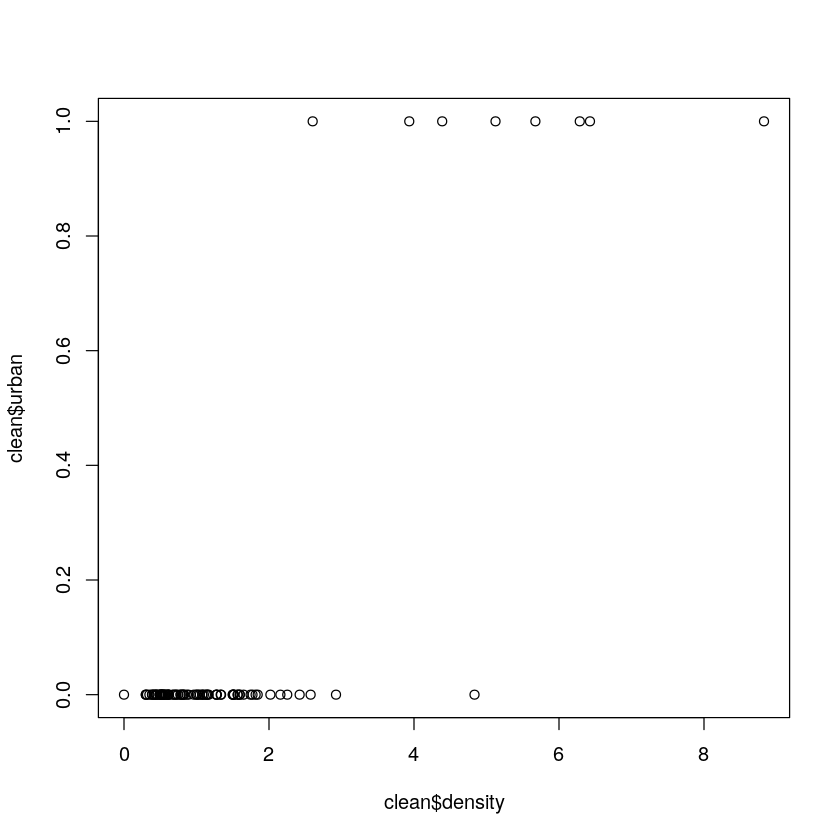

In [92]:
plot(clean$density, clean$urban)

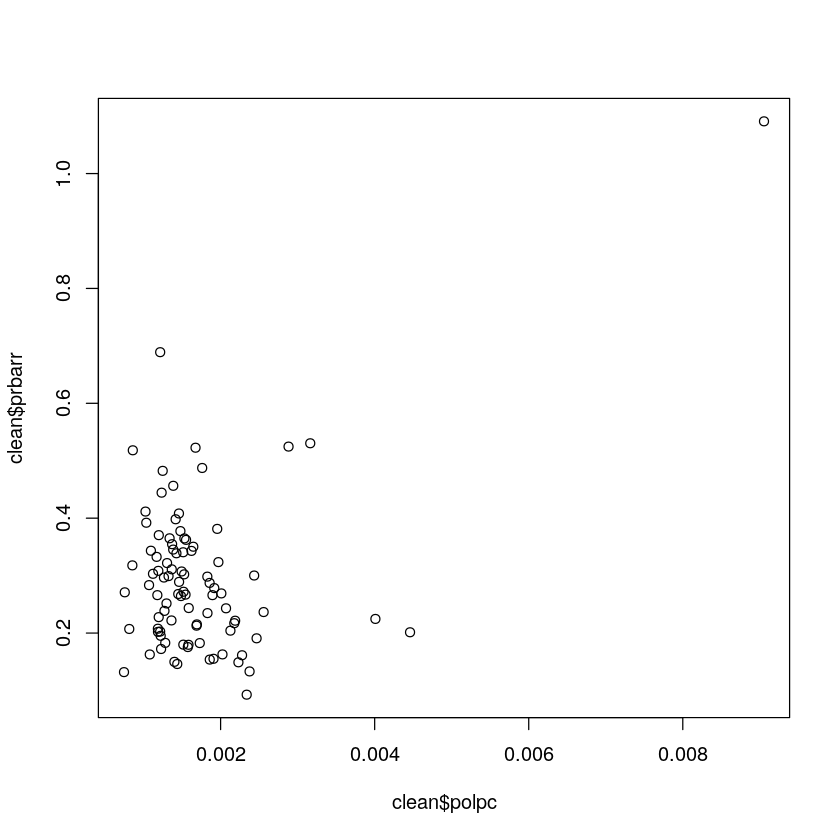

In [93]:
plot(clean$polpc, clean$prbarr)

In [94]:
# What about urban/density oddity? Shouldn't there be a sharp divide? (Anticorrelation?)

clean[clean$prbarr > 1, c("county", "prbarr", "polpc", "wser", "pctymle")]
clean[clean$wser > 2000, c("county", "prbarr", "polpc", "wser", "pctymle")]
clean[clean$pctymle > 0.15, c("county", "prbarr", "polpc", "wser", "pctymle")]

county prbarr  polpc      wser     pctymle   
51 115    1.09091 0.00905433 245.2061 0.07253495

county prbarr   polpc     wser     pctymle   
84 185    0.195266 0.0012221 2177.068 0.07008217

county prbarr   polpc      wser     pctymle  
59 133    0.266960 0.00154457 230.6581 0.2487116
86 189    0.161381 0.00227837 253.2281 0.1509264